In [17]:
import pandas as pd
import numpy as np
from datetime import datetime

import pandas as pd
import numpy as np

from datetime import datetime
#to plot within notebook
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
##%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50,40

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import TheilSenRegressor, LinearRegression, RANSACRegressor


from sklearn.metrics import recall_score, precision_score


df = pd.read_csv('C:/Users/prati/Downloads/nse_data.csv')

df.head()

SYMBOL SERIES      OPEN      HIGH       LOW     CLOSE      LAST  \
0   20MICRONS     EQ     37.80     37.80     36.15     36.85     37.40   
1  3IINFOTECH     EQ      4.10      4.85      4.00      4.55      4.65   
2     3MINDIA     EQ  13425.15  13469.55  12920.00  13266.70  13300.00   
3     63MOONS     EQ     61.00     61.90     60.35     61.00     61.10   
4     8KMILES     EQ    546.10    548.00    535.00    537.45    535.20   

   PREVCLOSE  TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
0      37.05      27130    994657.90  2017-06-28          202  INE144J01027  
1       4.05   20157058  92148517.65  2017-06-28         7353  INE748C01020  
2   13460.55       2290  30304923.35  2017-06-28          748  INE470A01017  
3      60.65      27701   1689421.00  2017-06-28          437  INE111B01023  
4     547.45      79722  43208620.05  2017-06-28         1866  INE650K01021

In [18]:
#Taking User Input
df2=df.groupby(["SYMBOL"])
df2
for SYMBOL, SYMBOL_df1 in df2:
    print(SYMBOL)
    print(SYMBOL_df1)

20MICRONS
           SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
0       20MICRONS     EQ  37.80  37.80  36.15  36.85  37.40      37.05   
1738    20MICRONS     EQ  52.90  61.70  52.90  59.40  59.65      52.80   
3565    20MICRONS     EQ  36.15  36.30  35.60  36.05  36.00      35.65   
5292    20MICRONS     EQ  44.35  44.80  43.55  43.90  43.60      44.80   
7042    20MICRONS     EQ  36.00  36.75  34.20  34.90  34.90      35.40   
...           ...    ...    ...    ...    ...    ...    ...        ...   
837984  20MICRONS     EQ  28.45  28.45  27.70  28.30  28.20      28.05   
839618  20MICRONS     EQ  28.45  28.45  26.90  27.60  27.65      27.60   
841242  20MICRONS     EQ  32.40  33.50  31.60  32.40  32.15      32.75   
842860  20MICRONS     EQ  38.10  39.60  37.85  38.30  38.50      38.95   
844554  20MICRONS     EQ  60.10  60.80  57.90  58.30  58.30      59.60   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
0           27130  9.946579e

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE   LAST  PREVCLOSE  \
6       AARTIDRUGS     EQ  539.90  539.90  520.00  521.85  522.2     536.55   
1745    AARTIDRUGS     EQ  536.00  599.00  534.05  551.60  545.0     535.00   
3571    AARTIDRUGS     EQ  609.05  611.00  595.00  600.35  596.0     609.00   
5298    AARTIDRUGS     EQ  598.95  598.95  551.40  568.15  585.0     585.40   
7048    AARTIDRUGS     EQ  581.70  585.00  575.00  578.15  576.4     580.70   
...            ...    ...     ...     ...     ...     ...    ...        ...   
837989  AARTIDRUGS     EQ  454.15  460.70  454.15  458.60  459.5     456.70   
839623  AARTIDRUGS     EQ  495.00  495.75  486.10  488.95  488.0     490.75   
841247  AARTIDRUGS     EQ  453.00  460.00  450.00  453.15  452.0     453.25   
842865  AARTIDRUGS     EQ  575.00  647.90  573.35  614.85  617.3     569.90   
844561  AARTIDRUGS     EQ  629.35  646.60  622.30  641.30  642.0     628.15   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALT

           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
15      ABMINTLTD     BE  100.00  100.00   96.30   96.35   96.35     101.35   
1755    ABMINTLTD     BE   37.10   37.10   37.10   37.10   37.10      37.10   
3580    ABMINTLTD     BE  152.50  153.35  152.45  152.65  153.35     146.10   
5307    ABMINTLTD     BE  145.20  145.20  145.20  145.20  145.20     138.30   
10540   ABMINTLTD     BE  166.85  166.85  166.85  166.85  166.85     175.60   
...           ...    ...     ...     ...     ...     ...     ...        ...   
579768  ABMINTLTD     BE  111.00  111.00  111.00  111.00  111.00     107.00   
594640  ABMINTLTD     BE  102.50  102.50  102.50  102.50  102.50      97.65   
788115  ABMINTLTD     BE  105.45  105.45  105.45  105.45  105.45     111.00   
803009  ABMINTLTD     BE  100.00  100.00  100.00  100.00  100.00     105.45   
844571  ABMINTLTD     BE   43.65   43.65   41.60   41.80   42.60      41.60   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRAD

[495 rows x 13 columns]
ADHUNIKIND
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
25      ADHUNIKIND     EQ  102.30  104.80   95.10  100.45   97.05     100.50   
1767    ADHUNIKIND     BE   60.00   62.90   60.00   62.75   60.25      61.70   
3590    ADHUNIKIND     EQ  107.85  123.20  104.00  121.90  123.20     102.70   
5317    ADHUNIKIND     EQ  111.75  116.05  107.60  107.85  107.60     112.80   
7066    ADHUNIKIND     EQ  100.05  107.05  100.00  103.45  103.25     102.85   
...            ...    ...     ...     ...     ...     ...     ...        ...   
831301  ADHUNIKIND     EQ  109.00  111.35  106.50  106.85  106.50     107.60   
834641  ADHUNIKIND     EQ   93.00   97.00   91.15   92.00   92.00      91.70   
836315  ADHUNIKIND     EQ  112.00  122.00  112.00  117.75  120.00     117.30   
842884  ADHUNIKIND     EQ  104.60  107.00  102.10  104.55  102.10     104.60   
844583  ADHUNIKIND     BE   97.50   97.50   92.50   94.00   94.00      95.45   

    

           SYMBOL SERIES    OPEN   HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
31      AEGISCHEM     EQ  184.80  185.7  180.00  185.15  185.10     182.70   
1773    AEGISCHEM     EQ  230.75  235.6  230.25  233.80  233.40     232.20   
3596    AEGISCHEM     EQ  206.00  207.5  198.80  202.10  200.95     205.60   
5323    AEGISCHEM     EQ  194.50  196.0  192.10  194.40  193.25     194.40   
7072    AEGISCHEM     EQ  205.00  208.5  204.00  205.85  206.00     204.30   
...           ...    ...     ...    ...     ...     ...     ...        ...   
838014  AEGISCHEM     EQ  122.00  126.9  121.10  123.85  123.65     121.50   
839648  AEGISCHEM     EQ  103.90  109.0  102.75  105.60  106.00     104.50   
841271  AEGISCHEM     EQ  103.65  108.5  101.50  107.15  106.55     103.00   
842891  AEGISCHEM     EQ  172.70  172.7  162.80  165.40  165.95     171.15   
844589  AEGISCHEM     EQ  285.95  289.5  280.00  286.80  285.00     286.80   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES       

[495 rows x 13 columns]
AIL
       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE   LAST  PREVCLOSE  \
435432    AIL     EQ  619.05  634.05  616.05  623.95  625.0     617.60   
437075    AIL     EQ  618.05  619.90  595.00  600.20  602.5     617.85   
438703    AIL     EQ  615.05  626.95  606.95  610.45  609.9     609.10   
440326    AIL     EQ  584.20  590.00  576.10  582.65  583.0     577.60   
441962    AIL     EQ  628.00  628.00  603.00  615.70  615.0     615.10   
...       ...    ...     ...     ...     ...     ...    ...        ...   
833046    AIL     EQ  622.55  632.05  615.10  630.30  631.9     632.10   
834659    AIL     EQ  639.05  649.00  629.00  638.70  640.0     634.95   
838025    AIL     EQ  639.00  643.00  621.00  624.15  621.5     633.15   
839659    AIL     EQ  604.15  612.00  588.10  590.00  593.0     602.45   
841282    AIL     EQ  636.05  645.00  624.35  642.50  641.0     637.10   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
435432    

         SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
49      ALANKIT     BE   33.35   33.85   33.05   33.30   33.30      33.45   
1794    ALANKIT     EQ   47.75   48.80   44.70   45.40   45.50      46.90   
3611    ALANKIT     EQ   28.25   28.30   27.85   27.90   27.90      28.00   
5342    ALANKIT     EQ   22.25   22.65   22.25   22.50   22.60      22.50   
7087    ALANKIT     EQ   22.65   24.80   21.45   22.40   22.40      22.60   
...         ...    ...     ...     ...     ...     ...     ...        ...   
838030  ALANKIT     EQ  131.60  132.90  126.20  127.40  129.00     130.45   
839664  ALANKIT     EQ  102.90  102.90   99.80  100.30   99.90     102.35   
841287  ALANKIT     EQ  101.85  102.00  100.25  101.40  101.05     100.25   
842906  ALANKIT     EQ  143.95  145.85  140.95  141.80  141.95     144.40   
844610  ALANKIT     EQ   69.90   69.90   64.60   69.65   69.60      66.60   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
49

[494 rows x 13 columns]
ALOKTEXT
          SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
61      ALOKTEXT     EQ  2.65  2.70  2.50   2.60  2.65       2.70    4575834   
1806    ALOKTEXT     BE  3.85  3.90  3.75   3.80  3.85       3.85    1394584   
3623    ALOKTEXT     EQ  3.35  3.40  3.30   3.35  3.35       3.30    2768361   
5354    ALOKTEXT     EQ  3.05  3.10  3.00   3.05  3.05       3.05    2085416   
7099    ALOKTEXT     EQ  3.10  3.15  3.05   3.10  3.10       3.10    1326304   
...          ...    ...   ...   ...   ...    ...   ...        ...        ...   
838041  ALOKTEXT     EQ  3.25  3.35  3.10   3.20  3.20       3.15    6561875   
839675  ALOKTEXT     EQ  4.20  4.20  3.95   4.00  4.05       4.20    3444175   
841298  ALOKTEXT     EQ  4.95  5.30  4.85   5.00  5.05       4.85    6226469   
842918  ALOKTEXT     EQ  3.55  3.55  3.50   3.50  3.50       3.50    1951764   
844622  ALOKTEXT     BE  3.80  3.90  3.70   3.90  3.90       3.75    4727459   

      

[495 rows x 13 columns]
AMRUTANJAN
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
69      AMRUTANJAN     EQ  680.00  683.75  670.35  678.35  675.00     683.75   
1814    AMRUTANJAN     EQ  634.10  640.00  625.00  626.80  627.45     634.05   
3631    AMRUTANJAN     EQ  574.80  580.00  572.15  574.45  573.00     575.35   
5362    AMRUTANJAN     EQ  692.30  710.95  692.30  699.95  699.00     699.40   
7107    AMRUTANJAN     EQ  548.00  555.00  530.10  547.05  548.90     540.25   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838050  AMRUTANJAN     EQ  411.50  412.00  406.05  409.50  406.55     406.50   
839684  AMRUTANJAN     EQ  419.30  423.60  414.30  417.65  417.00     415.25   
841307  AMRUTANJAN     EQ  429.85  431.80  425.75  429.50  430.00     426.10   
842926  AMRUTANJAN     EQ  447.80  447.80  439.00  442.15  444.00     441.60   
844630  AMRUTANJAN     EQ  659.95  662.70  643.50  649.20  651.00     648.95   

    

          SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
78      ANSALAPI     EQ  28.70  28.70  27.40  27.60  27.80      28.60   
1822    ANSALAPI     EQ  22.50  22.70  22.25  22.40  22.40      22.50   
3641    ANSALAPI     EQ  15.00  15.25  14.85  15.00  15.00      15.00   
5371    ANSALAPI     EQ  25.20  25.50  24.45  25.25  25.30      25.00   
7118    ANSALAPI     EQ  15.55  15.60  15.05  15.20  15.25      15.45   
...          ...    ...    ...    ...    ...    ...    ...        ...   
838061  ANSALAPI     EQ  23.40  23.40  21.80  21.95  22.00      22.65   
839695  ANSALAPI     EQ  18.70  18.70  17.50  17.70  17.75      17.85   
841317  ANSALAPI     EQ  18.40  18.90  18.25  18.45  18.50      18.65   
842937  ANSALAPI     EQ  19.90  19.90  19.40  19.45  19.45      19.55   
844638  ANSALAPI     EQ  26.20  27.20  25.30  26.50  26.20      25.95   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
78         513789  14338258.40  2017-06-28         

[495 rows x 13 columns]
ARCHIDPLY
           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
90      ARCHIDPLY     EQ   85.90   88.45   83.85   86.00   85.60      86.75   
1835    ARCHIDPLY     EQ   99.80  110.00   97.90  102.85  102.80     100.30   
3652    ARCHIDPLY     EQ   74.85   78.40   74.85   77.15   76.90      74.15   
5382    ARCHIDPLY     EQ   76.20   77.80   76.05   77.10   77.00      75.90   
7129    ARCHIDPLY     EQ   70.10   70.80   68.15   68.85   69.25      69.60   
...           ...    ...     ...     ...     ...     ...     ...        ...   
838072  ARCHIDPLY     EQ   47.00   49.70   46.30   48.25   48.35      46.20   
839705  ARCHIDPLY     EQ   44.95   45.80   44.10   44.35   44.30      45.00   
841327  ARCHIDPLY     EQ   47.95   49.00   47.50   48.25   47.75      47.60   
842948  ARCHIDPLY     EQ   54.35   57.35   53.50   54.40   54.35      53.50   
844651  ARCHIDPLY     EQ  113.35  116.80  112.75  113.75  113.15     113.00   

        TOTTRDQTY

[86 rows x 13 columns]
ARROWGREEN
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
97      ARROWGREEN     EQ  571.35  574.80  551.00  555.25  554.00     542.55   
1843    ARROWGREEN     EQ  517.95  538.00  507.00  514.90  514.00     512.20   
3659    ARROWGREEN     EQ  458.50  463.50  450.05  451.20  451.75     457.40   
5390    ARROWGREEN     EQ  422.25  444.00  418.45  437.75  439.40     421.60   
7136    ARROWGREEN     EQ  439.00  439.00  425.50  426.05  427.00     434.30   
...            ...    ...     ...     ...     ...     ...     ...        ...   
834713  ARROWGREEN     EQ  481.40  483.95  473.00  478.30  478.00     476.65   
836387  ARROWGREEN     EQ  427.30  427.30  419.00  424.00  425.00     424.55   
838078  ARROWGREEN     EQ  499.00  505.50  490.00  499.75  498.00     498.75   
842955  ARROWGREEN     EQ  482.00  505.00  481.00  483.40  482.00     494.25   
844659  ARROWGREEN     EQ  473.80  483.00  470.05  480.70  481.50     471.00   

     

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
103     ASAHIINDIA     EQ  243.00  245.40  240.10  243.70  242.30     243.10   
1849    ASAHIINDIA     EQ  373.65  373.65  366.70  369.55  367.40     369.30   
3665    ASAHIINDIA     EQ  210.70  212.40  210.00  210.70  211.25     210.85   
5397    ASAHIINDIA     EQ  217.45  217.50  213.00  215.85  214.75     216.95   
7142    ASAHIINDIA     EQ  210.10  213.80  209.00  210.95  209.00     212.20   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838084  ASAHIINDIA     EQ  153.75  161.35  151.45  159.50  158.20     152.95   
839717  ASAHIINDIA     EQ  148.70  149.85  142.40  142.80  142.65     147.40   
841339  ASAHIINDIA     EQ  156.95  159.50  154.55  158.30  159.50     157.55   
842961  ASAHIINDIA     EQ  201.00  206.90  200.40  204.60  205.25     200.25   
844666  ASAHIINDIA     EQ  377.00  377.00  363.05  368.55  370.00     376.80   

        TOTTRDQTY    TOTTRDVAL   TIMEST

       SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
114      ASIL     EQ  0.80  0.80  0.70   0.80  0.80       0.75       1525   
5408     ASIL     BE  1.00  1.00  1.00   1.00  1.00       1.00         21   
7153     ASIL     EQ  0.95  0.95  0.95   0.95  0.95       0.90        538   
14155    ASIL     BE  1.00  1.00  1.00   1.00  1.00       0.95        530   
19401    ASIL     BE  0.65  0.65  0.65   0.65  0.65       0.65        700   
...       ...    ...   ...   ...   ...    ...   ...        ...        ...   
769971   ASIL     EQ  0.55  0.55  0.55   0.55  0.55       0.60          1   
771667   ASIL     EQ  1.05  1.15  1.05   1.05  1.05       1.10      16182   
803108   ASIL     EQ  0.55  0.55  0.55   0.55  0.55       0.50       2000   
824734   ASIL     EQ  1.00  1.10  1.00   1.10  1.10       1.05        112   
834730   ASIL     EQ  1.15  1.15  1.15   1.15  1.15       1.20      16157   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
114       1170.0

          SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
5419    ATNINTER     BE  0.25  0.30  0.25   0.30  0.30       0.30       4041   
7163    ATNINTER     BE  0.25  0.25  0.20   0.20  0.20       0.25       1425   
8920    ATNINTER     EQ  0.25  0.25  0.25   0.25  0.25       0.25        200   
10651   ATNINTER     BE  0.20  0.20  0.20   0.20  0.20       0.20         20   
14166   ATNINTER     BE  0.25  0.30  0.25   0.30  0.30       0.25        113   
...          ...    ...   ...   ...   ...    ...   ...        ...        ...   
833125  ATNINTER     EQ  0.40  0.40  0.35   0.35  0.35       0.40        145   
836413  ATNINTER     EQ  0.30  0.40  0.30   0.30  0.30       0.35       2133   
838103  ATNINTER     EQ  0.40  0.40  0.40   0.40  0.40       0.40       3600   
839736  ATNINTER     EQ  0.40  0.40  0.40   0.40  0.40       0.40       6389   
841358  ATNINTER     EQ  0.55  0.55  0.55   0.55  0.55       0.60       2035   

        TOTTRDVAL   TIMESTAMP  TOTALTRA

         SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
131     AUTOIND     EQ   52.55   53.90   50.70   52.85   53.35      52.60   
1877    AUTOIND     EQ  110.10  110.10  110.10  110.10  110.10     104.90   
3693    AUTOIND     EQ   51.10   51.40   50.80   51.10   51.10      50.95   
5427    AUTOIND     EQ   58.95   60.75   57.80   58.50   58.00      58.95   
7172    AUTOIND     EQ   57.00   59.75   56.10   59.25   59.30      57.60   
...         ...    ...     ...     ...     ...     ...     ...        ...   
838110  AUTOIND     EQ   39.95   47.25   39.95   47.25   47.25      39.40   
839743  AUTOIND     EQ   37.70   38.00   36.05   36.30   36.45      37.45   
841366  AUTOIND     EQ   37.50   38.50   37.05   38.20   38.25      37.60   
842988  AUTOIND     EQ   57.05   58.70   55.90   56.45   56.45      57.95   
844694  AUTOIND     BE  102.25  103.85  100.50  101.00  102.00     104.30   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
131

[495 rows x 13 columns]
BAJAJ-AUTO
            SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
141     BAJAJ-AUTO     EQ  2789.00  2801.00  2770.20  2777.05  2784.50   
1890    BAJAJ-AUTO     EQ  3275.00  3307.80  3261.10  3289.15  3287.50   
3703    BAJAJ-AUTO     EQ  2788.00  2804.25  2751.00  2755.90  2751.10   
5438    BAJAJ-AUTO     EQ  2865.00  2902.00  2854.10  2864.00  2871.00   
7183    BAJAJ-AUTO     EQ  2916.15  2932.50  2905.15  2923.55  2920.00   
...            ...    ...      ...      ...      ...      ...      ...   
838120  BAJAJ-AUTO     EQ  2640.75  2655.75  2624.00  2632.35  2633.00   
839753  BAJAJ-AUTO     EQ  2308.00  2328.00  2268.10  2278.45  2281.00   
841376  BAJAJ-AUTO     EQ  2369.95  2404.85  2350.50  2389.45  2398.50   
842998  BAJAJ-AUTO     EQ  2926.00  2954.20  2912.60  2929.65  2928.00   
844707  BAJAJ-AUTO     EQ  3295.00  3341.00  3285.50  3333.60  3331.75   

        PREVCLOSE  TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
141  

           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
149     BALAMINES     EQ  332.10  338.35  325.00  328.80  327.00     332.50   
1898    BALAMINES     EQ  640.00  643.75  627.00  632.10  633.50     637.35   
3711    BALAMINES     EQ  330.70  335.00  330.20  331.20  331.30     332.20   
5446    BALAMINES     EQ  389.00  392.80  380.50  387.35  388.00     386.65   
7191    BALAMINES     EQ  340.20  352.00  336.60  341.65  350.00     345.00   
...           ...    ...     ...     ...     ...     ...     ...        ...   
838128  BALAMINES     EQ  246.45  247.90  237.45  240.20  239.50     246.35   
839761  BALAMINES     EQ  134.20  141.60  134.20  137.15  137.85     133.50   
841384  BALAMINES     EQ  182.05  191.00  182.00  187.05  186.80     184.95   
843006  BALAMINES     EQ  319.00  322.80  302.90  313.30  313.60     315.50   
844715  BALAMINES     EQ  640.00  649.90  632.85  637.35  637.10     635.25   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTR

[495 rows x 13 columns]
BANKINDIA
           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
162     BANKINDIA     EQ  132.00  137.65  131.35  136.75  136.55     133.55   
1911    BANKINDIA     EQ  200.35  200.45  198.15  199.15  198.80     200.40   
3724    BANKINDIA     EQ  125.35  129.30  125.15  128.80  128.55     125.15   
5459    BANKINDIA     EQ  174.00  189.55  171.70  186.80  185.40     178.50   
7204    BANKINDIA     EQ  127.30  129.90  126.35  128.90  128.45     126.95   
...           ...    ...     ...     ...     ...     ...     ...        ...   
838139  BANKINDIA     EQ   85.95   89.00   85.40   88.45   88.00      85.65   
839773  BANKINDIA     EQ   94.00   96.50   93.70   95.00   95.00      93.80   
841396  BANKINDIA     EQ   90.15   91.60   89.35   91.15   91.15      90.80   
843019  BANKINDIA     EQ  120.00  120.50  118.20  118.45  118.45     119.65   
844728  BANKINDIA     EQ  171.35  172.25  169.20  169.75  170.00     169.75   

        TOTTRDQTY

[496 rows x 13 columns]
BBL
       SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
169       BBL     EQ  1386.00  1440.45  1346.35  1413.45  1413.90    1385.10   
1919      BBL     EQ  1109.20  1159.70  1109.20  1131.10  1131.25    1125.75   
3731      BBL     EQ   848.00   861.00   848.00   853.45   858.90     853.15   
5466      BBL     EQ  1000.00  1015.95   994.80  1003.30  1002.10     982.70   
7211      BBL     EQ   853.00   875.00   851.60   863.95   865.00     859.50   
...       ...    ...      ...      ...      ...      ...      ...        ...   
838146    BBL     EQ   902.65   908.95   880.50   888.95   889.00     895.20   
839781    BBL     EQ   789.00   798.95   770.00   777.65   785.00     782.10   
841403    BBL     EQ   931.05   951.00   931.05   934.25   932.00     938.95   
843026    BBL     EQ   801.75   804.05   781.20   784.10   783.00     801.00   
844736    BBL     EQ  1305.00  1318.95  1279.95  1285.85  1286.00    1310.50   

        TOT

          SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
177     BFINVEST     EQ  180.00  185.30  178.00  182.95  183.30     180.80   
1928    BFINVEST     EQ  414.95  424.00  406.00  412.35  411.50     415.75   
3740    BFINVEST     EQ  160.55  162.55  158.10  158.80  158.25     159.60   
5474    BFINVEST     EQ  170.25  171.50  167.85  168.70  168.50     169.25   
7219    BFINVEST     EQ  163.15  171.50  163.15  167.60  167.50     163.70   
...          ...    ...     ...     ...     ...     ...     ...        ...   
838153  BFINVEST     EQ  111.80  114.40  111.80  113.80  113.25     111.30   
839790  BFINVEST     EQ  132.15  140.50  131.95  133.20  133.70     132.75   
841411  BFINVEST     EQ  118.45  123.70  118.45  121.35  121.30     118.40   
843034  BFINVEST     EQ  175.55  178.40  173.25  174.15  173.75     175.25   
844745  BFINVEST     EQ  381.90  407.70  379.10  396.70  396.45     378.80   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES       

            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
187     BHARATIDIL     EQ   8.40   9.20   8.40   8.65   8.80       8.90   
1939    BHARATIDIL     BZ   7.95   7.95   7.75   7.95   7.95       7.60   
3750    BHARATIDIL     EQ  14.45  14.65  14.45  14.50  14.50      14.45   
5483    BHARATIDIL     EQ  11.00  11.60  10.85  11.60  11.60      11.05   
7228    BHARATIDIL     EQ  10.00  10.00   9.80  10.00  10.00      10.30   
...            ...    ...    ...    ...    ...    ...    ...        ...   
838161  BHARATIDIL     EQ  27.10  29.45  27.00  28.40  28.40      26.40   
839798  BHARATIDIL     EQ  18.00  19.25  18.00  18.55  18.85      18.80   
841419  BHARATIDIL     EQ  19.10  19.50  19.05  19.50  19.50      19.25   
843043  BHARATIDIL     EQ  28.80  28.80  23.60  24.10  24.00      28.55   
844756  BHARATIDIL     BZ   6.80   6.80   6.60   6.80   6.80       6.50   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
187         28430    249167

[422 rows x 13 columns]
BILPOWER
          SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
196     BILPOWER     EQ  1.40  1.40  1.40   1.40  1.40       1.40        391   
1949    BILPOWER     EQ  1.10  1.10  1.05   1.10  1.10       1.05       2870   
5492    BILPOWER     EQ  1.30  1.30  1.30   1.30  1.30       1.25         92   
8992    BILPOWER     EQ  1.25  1.25  1.25   1.25  1.25       1.20       1000   
10724   BILPOWER     EQ  1.30  1.30  1.30   1.30  1.30       1.20        200   
...          ...    ...   ...   ...   ...    ...   ...        ...        ...   
831474  BILPOWER     EQ  1.20  1.20  1.20   1.20  1.20       1.20        200   
834809  BILPOWER     EQ  1.65  1.65  1.65   1.65  1.65       1.65         50   
838169  BILPOWER     EQ  1.25  1.25  1.25   1.25  1.25       1.15         20   
841427  BILPOWER     EQ  0.75  0.85  0.75   0.80  0.80       0.80       2247   
844766  BILPOWER     EQ  1.50  1.50  1.45   1.45  1.45       1.50      10301   

      

844774      27009    990932.40  2017-12-29          186  INE831Q01016  
BLBLIMITED
            SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  \
203     BLBLIMITED     BE  6.30  6.30  5.90   6.30  6.30       6.20   
1958    BLBLIMITED     EQ  6.70  7.05  6.70   7.05  7.05       6.75   
3765    BLBLIMITED     EQ  5.65  6.00  5.65   5.80  6.00       5.85   
5499    BLBLIMITED     BE  6.90  6.90  6.90   6.90  6.90       6.85   
7242    BLBLIMITED     EQ  7.50  7.90  6.65   7.10  7.20       6.95   
...            ...    ...   ...   ...   ...    ...   ...        ...   
838177  BLBLIMITED     EQ  3.80  4.15  3.75   4.10  4.10       4.00   
839812  BLBLIMITED     EQ  3.95  4.00  3.40   3.65  3.65       4.00   
841435  BLBLIMITED     EQ  3.10  3.30  3.10   3.10  3.10       3.10   
843059  BLBLIMITED     EQ  4.20  4.30  4.00   4.05  4.05       4.05   
844775  BLBLIMITED     BE  7.70  7.95  7.35   7.95  7.95       7.70   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          I

          SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
465285  BNPCPGII     MF   9.0   9.0   9.0    9.0   9.0       10.0      14990   
506986  BNPCPGII     MF   9.0   9.0   9.0    9.0   9.0        9.0        990   
536959  BNPCPGII     MF   9.0   9.0   9.0    9.0   9.0        9.0      14990   
667504  BNPCPGII     MF  10.0  10.0  10.0   10.0  10.0       10.5       9985   
773430  BNPCPGII     MF  11.0  11.0  10.5   10.5  10.5       10.0       5080   
776744  BNPCPGII     MF   9.0   9.0   9.0    9.0   9.0        9.0       9990   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
465285   134910.0  2016-02-26            4  INF251K01JT0  
506986     8910.0  2016-03-28            1  INF251K01JT0  
536959   134910.0  2016-06-22            2  INF251K01JT0  
667504    99850.0  2016-01-13            4  INF251K01JT0  
773430    55835.0  2016-01-05            2  INF251K01JT0  
776744    89910.0  2016-04-13            4  INF251K01JT0  
BODALCHEM
           SYMBO

[81 rows x 13 columns]
BROOKS
        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
220     BROOKS     EQ  105.85  105.85  101.10  102.50  103.50     104.00   
1978    BROOKS     EQ  106.60  109.80  106.05  106.35  106.40     106.40   
3784    BROOKS     EQ  140.70  143.00  140.50  141.00  140.60     140.80   
5516    BROOKS     EQ  138.75  138.75  135.00  135.20  135.40     137.75   
7261    BROOKS     EQ  139.80  141.40  138.00  138.35  138.15     138.85   
...        ...    ...     ...     ...     ...     ...     ...        ...   
838195  BROOKS     EQ   82.70   84.00   81.75   82.35   82.00      82.50   
839830  BROOKS     EQ   93.05   94.40   89.05   89.50   89.15      93.35   
841455  BROOKS     EQ   86.05   88.45   86.05   86.85   86.70      85.85   
843078  BROOKS     EQ  116.25  117.50  113.10  114.15  114.40     115.75   
844795  BROOKS     EQ  116.30  116.40  111.15  112.65  113.15     115.65   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES   

540308      214.5  2016-02-22            1  INF209K01F09  
BSLRIFS1DG
            SYMBOL SERIES  OPEN  HIGH  LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
116810  BSLRIFS1DG     MF   7.3   7.3  7.3    7.3   7.3        8.1       2388   
566735  BSLRIFS1DG     MF   8.1   8.1  8.1    8.1   8.1        9.0        101   
725404  BSLRIFS1DG     MF   9.0   9.0  9.0    9.0   9.0       10.0         11   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
116810    17432.4  2017-01-20           16  INF209KB1515  
566735      818.1  2016-12-20            1  INF209KB1515  
725404       99.0  2016-11-03            1  INF209KB1515  
BURNPUR
         SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
227     BURNPUR     EQ   8.80   9.10   8.50   8.65   8.70       8.85   
1985    BURNPUR     BE  11.05  11.20  10.70  10.85  10.80      10.85   
3791    BURNPUR     EQ  12.50  13.05  12.25  12.50  12.50      12.40   
5523    BURNPUR     EQ  10.60  10.65  10.40  10.45  10.45      10.40   
7

         SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1991    CALSOFT     BE  82.30  82.30  82.30  82.30  82.30      78.40   
7274    CALSOFT     EQ   7.65   7.65   7.65   7.65   7.65       7.30   
12531   CALSOFT     EQ   7.70   7.70   7.70   7.70   7.70       8.10   
16022   CALSOFT     EQ   5.85   5.85   5.40   5.85   5.85       5.60   
17781   CALSOFT     EQ   5.60   6.00   5.60   6.00   6.00       5.85   
...         ...    ...    ...    ...    ...    ...    ...        ...   
836521  CALSOFT     EQ   5.85   5.85   5.85   5.85   5.85       5.95   
838207  CALSOFT     EQ   7.15   7.15   6.55   6.65   6.70       6.85   
839842  CALSOFT     EQ   8.00   8.15   8.00   8.15   8.15       8.20   
843090  CALSOFT     EQ   8.25   8.25   8.25   8.25   8.25       7.90   
844808  CALSOFT     BE  91.20  95.55  91.15  91.15  91.15      95.90   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1991        28900  2378470.00  2017-11-28          108  INE526B0

[495 rows x 13 columns]
CASTEXTECH
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
243     CASTEXTECH     EQ   7.10   8.20   6.50   7.80   8.15       7.20   
2004    CASTEXTECH     EQ   5.35   5.40   5.10   5.10   5.20       5.25   
3808    CASTEXTECH     EQ   9.45   9.50   9.15   9.30   9.25       9.45   
5539    CASTEXTECH     EQ   7.80   9.10   7.75   8.85   8.80       7.80   
7287    CASTEXTECH     EQ   8.50   8.50   8.35   8.45   8.50       8.45   
...            ...    ...    ...    ...    ...    ...    ...        ...   
838218  CASTEXTECH     EQ   6.10   6.10   5.85   5.90   5.95       6.00   
839853  CASTEXTECH     EQ   6.45   6.60   6.00   6.00   6.00       6.30   
841477  CASTEXTECH     EQ   4.90   5.15   4.80   5.15   5.15       4.95   
843101  CASTEXTECH     EQ  10.30  10.95  10.30  10.60  10.70      10.25   
844821  CASTEXTECH     EQ   6.30   7.30   6.10   7.20   7.30       6.10   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES         

           SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
251     CELESTIAL     EQ  22.50  23.00  22.35  22.45  22.50      22.70   
2013    CELESTIAL     EQ  21.35  21.35  20.55  20.80  20.90      20.95   
3816    CELESTIAL     EQ  23.35  26.40  22.55  24.75  24.95      22.70   
5547    CELESTIAL     EQ  26.95  26.95  26.15  26.25  26.20      26.35   
7295    CELESTIAL     EQ  27.50  30.00  27.50  27.85  27.80      27.65   
...           ...    ...    ...    ...    ...    ...    ...        ...   
838226  CELESTIAL     EQ  22.25  22.45  21.65  21.90  21.85      22.00   
839861  CELESTIAL     EQ  27.00  28.90  25.50  27.00  27.35      27.35   
841485  CELESTIAL     EQ  23.65  24.35  23.40  23.50  23.70      23.50   
843109  CELESTIAL     EQ  22.85  24.90  22.60  24.15  24.40      22.70   
844830  CELESTIAL     EQ  19.80  21.50  19.80  21.10  21.45      20.10   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
251         34752    783783.75  2017-06

[495 rows x 13 columns]
CHEMFALKAL
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
3828    CHEMFALKAL     EQ  277.00  282.95  277.00  280.15  278.50     276.80   
5560    CHEMFALKAL     EQ  309.00  312.00  301.00  303.20  303.85     307.95   
7308    CHEMFALKAL     EQ  279.70  279.70  268.00  271.65  271.70     273.05   
9060    CHEMFALKAL     EQ  304.00  314.00  296.25  299.70  299.00     305.05   
10793   CHEMFALKAL     EQ  315.95  318.55  310.10  311.90  312.00     318.50   
...            ...    ...     ...     ...     ...     ...     ...        ...   
836552  CHEMFALKAL     EQ  310.00  311.95  296.05  300.45  301.10     306.85   
838238  CHEMFALKAL     EQ  108.00  108.00  102.00  102.40  102.05     103.20   
839873  CHEMFALKAL     EQ   74.20   75.70   73.25   73.65   73.65      76.00   
841497  CHEMFALKAL     EQ   82.15   82.20   78.20   80.10   80.00      79.10   
843121  CHEMFALKAL     EQ  317.00  331.00  315.00  317.80  318.05     317.70   

    

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
271     CIPLA     EQ  535.40  538.65  531.00  536.85  536.65     534.65   
2033    CIPLA     EQ  616.00  621.70  609.80  611.80  613.20     614.80   
3836    CIPLA     EQ  587.70  592.80  582.60  583.70  583.80     585.25   
5568    CIPLA     EQ  561.95  561.95  555.00  557.45  556.10     561.70   
7316    CIPLA     EQ  597.50  601.50  593.45  596.30  596.15     597.30   
...       ...    ...     ...     ...     ...     ...     ...        ...   
838246  CIPLA     EQ  471.85  474.00  468.00  472.15  473.00     468.35   
839881  CIPLA     EQ  538.60  539.00  522.00  525.05  524.90     537.60   
841505  CIPLA     EQ  509.80  510.60  503.25  504.45  505.00     506.40   
843129  CIPLA     EQ  609.00  617.80  604.70  611.55  611.05     609.10   
844850  CIPLA     EQ  606.15  611.90  604.10  608.50  607.00     606.05   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
271        601643  3.21950

           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
277     COFFEEDAY     EQ  242.00  244.00  240.95  242.10  242.00     240.95   
2042    COFFEEDAY     EQ  239.00  250.00  234.65  241.00  241.05     235.90   
3841    COFFEEDAY     EQ  233.60  237.95  233.60  235.95  235.65     235.25   
5574    COFFEEDAY     EQ  248.10  251.90  246.05  250.15  250.00     248.35   
7321    COFFEEDAY     EQ  235.00  235.00  232.10  233.60  233.40     233.65   
...           ...    ...     ...     ...     ...     ...     ...        ...   
838249  COFFEEDAY     EQ  258.70  260.50  255.00  256.50  257.00     258.55   
839884  COFFEEDAY     EQ  225.05  227.40  222.00  224.85  225.00     225.10   
841509  COFFEEDAY     EQ  228.00  236.00  226.40  234.65  233.50     227.95   
843133  COFFEEDAY     EQ  233.50  233.50  228.20  228.95  229.00     231.50   
844858  COFFEEDAY     EQ  277.70  280.70  272.55  274.70  276.00     277.70   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALT

[495 rows x 13 columns]
CORPBANK
          SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
287     CORPBANK     EQ  50.45  51.90  49.40  50.65  50.60      50.45   
2052    CORPBANK     EQ  43.55  44.00  43.50  43.55  43.50      43.95   
3850    CORPBANK     EQ  46.60  47.45  46.05  46.95  47.00      46.30   
5583    CORPBANK     EQ  56.40  59.25  56.30  58.70  58.60      56.30   
7330    CORPBANK     EQ  47.50  48.15  47.35  47.80  47.65      47.40   
...          ...    ...    ...    ...    ...    ...    ...        ...   
838256  CORPBANK     EQ  35.00  36.00  34.60  35.60  35.50      34.90   
839891  CORPBANK     EQ  42.10  42.75  41.15  41.50  41.40      42.10   
841516  CORPBANK     EQ  39.20  39.40  38.00  38.55  38.70      38.80   
843142  CORPBANK     EQ  44.05  44.95  43.50  43.85  43.55      44.00   
844868  CORPBANK     EQ  40.15  40.15  39.05  39.20  39.25      39.65   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
287        292134

[485 rows x 13 columns]
CRISIL
        SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
295     CRISIL     EQ  1918.00  1934.95  1916.55  1926.20  1927.00    1920.75   
2060    CRISIL     EQ  1869.95  1869.95  1859.00  1864.85  1865.00    1857.35   
3856    CRISIL     EQ  2040.00  2040.00  2010.50  2013.40  2015.00    2029.10   
5591    CRISIL     EQ  1940.00  1980.00  1939.00  1967.05  1961.10    1951.05   
7336    CRISIL     EQ  1895.00  1914.95  1877.00  1897.95  1887.65    1877.45   
...        ...    ...      ...      ...      ...      ...      ...        ...   
838263  CRISIL     EQ  2280.00  2284.40  2226.35  2240.90  2240.00    2256.90   
839897  CRISIL     EQ  1797.00  1797.95  1770.05  1774.20  1773.50    1797.20   
841523  CRISIL     EQ  1910.00  1969.00  1910.00  1941.20  1944.00    1905.70   
843149  CRISIL     EQ  2195.75  2218.70  2186.05  2200.90  2202.85    2194.70   
844876  CRISIL     EQ  1855.20  1880.00  1855.20  1874.55  1872.00    1864.95 

[238 rows x 13 columns]
CYBERMEDIA
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
2068    CYBERMEDIA     BE  15.35  15.35  15.35  15.35  15.35      16.15   
7346    CYBERMEDIA     EQ   8.20   8.20   8.20   8.20   8.20       8.60   
9096    CYBERMEDIA     EQ  10.00  10.05  10.00  10.00  10.00      10.50   
12603   CYBERMEDIA     EQ   7.30   7.95   7.30   7.60   7.60       7.60   
14351   CYBERMEDIA     EQ   9.35   9.35   9.35   9.35   9.35       8.95   
...            ...    ...    ...    ...    ...    ...    ...        ...   
836587  CYBERMEDIA     BE  11.20  11.20  11.20  11.20  11.20      11.60   
838269  CYBERMEDIA     EQ   7.50   7.50   7.50   7.50   7.50       7.15   
841529  CYBERMEDIA     EQ   6.80   6.80   6.80   6.80   6.80       6.80   
843158  CYBERMEDIA     EQ   7.95   7.95   7.95   7.95   7.95       8.35   
844886  CYBERMEDIA     BE  12.60  13.20  12.40  12.65  12.65      12.60   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          I

[495 rows x 13 columns]
DBCORP
        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
311     DBCORP     EQ  376.00  377.95  367.55  376.10  373.35     377.60   
2077    DBCORP     EQ  365.20  369.90  360.55  361.80  361.20     368.50   
3874    DBCORP     EQ  382.85  382.85  376.00  379.05  379.00     381.95   
5609    DBCORP     EQ  381.00  381.80  377.00  380.60  380.00     379.95   
7355    DBCORP     EQ  384.00  387.25  383.00  385.00  385.00     382.15   
...        ...    ...     ...     ...     ...     ...     ...        ...   
838277  DBCORP     EQ  379.95  379.95  365.55  373.00  376.10     375.80   
839911  DBCORP     EQ  311.05  318.75  310.00  315.85  317.00     315.50   
841537  DBCORP     EQ  303.50  311.80  303.50  307.00  307.00     307.05   
843167  DBCORP     EQ  403.95  403.95  397.05  399.85  400.00     399.90   
844895  DBCORP     EQ  358.00  360.70  345.85  349.25  348.40     353.70   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES 

          SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
319     DECCANCE     EQ  1079.00  1090.95  1063.10  1081.40  1080.00   
2085    DECCANCE     EQ   585.00   598.00   564.95   569.75   568.00   
3882    DECCANCE     EQ  1060.05  1067.95  1042.05  1058.65  1061.80   
5616    DECCANCE     EQ  1257.05  1274.00  1250.00  1268.85  1270.00   
7363    DECCANCE     EQ  1010.15  1018.00  1002.20  1009.00  1008.00   
...          ...    ...      ...      ...      ...      ...      ...   
838284  DECCANCE     EQ   807.95   840.00   807.95   823.10   821.00   
839918  DECCANCE     EQ   553.05   567.95   539.50   557.75   559.75   
841544  DECCANCE     EQ   620.25   714.00   620.25   693.75   685.50   
843175  DECCANCE     EQ  1009.00  1015.00   983.00   996.80   986.10   
844904  DECCANCE     EQ   564.00   564.00   552.00   557.70   552.00   

        PREVCLOSE  TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
319       1073.35       3277  3.538594e+06  2017-06-28          

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
330     DHAMPURSUG     EQ  181.00  189.70  180.00  188.05  188.00     180.75   
2096    DHAMPURSUG     EQ  297.00  299.80  291.60  294.10  293.50     298.35   
3892    DHAMPURSUG     EQ  190.80  194.70  187.00  188.05  187.05     190.90   
5627    DHAMPURSUG     EQ  241.50  242.95  234.65  236.00  235.50     239.65   
7373    DHAMPURSUG     EQ  237.95  239.30  233.00  236.30  237.00     236.50   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838292  DHAMPURSUG     EQ  101.60  103.00   99.30  102.75  102.90     101.00   
839927  DHAMPURSUG     EQ   75.15   85.80   75.15   84.70   83.80      74.55   
841553  DHAMPURSUG     EQ   95.10   96.50   93.05   93.90   93.75      95.75   
843183  DHAMPURSUG     EQ  123.65  123.65  119.10  119.70  119.70     122.55   
844914  DHAMPURSUG     EQ  211.00  222.90  211.00  215.30  215.05     211.20   

        TOTTRDQTY     TOTTRDVAL   TIMES

         SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
3906    DISHMAN     EQ  226.85  235.50  226.85  230.60  230.10     226.35   
5640    DISHMAN     EQ  315.45  317.50  309.00  310.45  310.00     314.90   
7391    DISHMAN     EQ  243.45  244.45  238.50  240.70  239.85     242.00   
9135    DISHMAN     EQ  230.20  233.75  229.35  231.90  232.00     231.00   
10880   DISHMAN     EQ  309.45  309.45  298.60  301.20  299.00     307.85   
...         ...    ...     ...     ...     ...     ...     ...        ...   
836628  DISHMAN     EQ  241.25  241.90  232.80  236.70  236.05     237.55   
838300  DISHMAN     EQ  155.30  155.35  151.05  152.00  151.70     152.40   
839936  DISHMAN     EQ  368.00  368.05  346.00  348.20  348.85     367.75   
841561  DISHMAN     EQ  335.45  337.00  331.50  333.30  333.75     332.75   
843201  DISHMAN     EQ  220.20  228.00  208.10  209.90  209.00     218.00   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
39

        SYMBOL SERIES   OPEN  HIGH    LOW  CLOSE   LAST  PREVCLOSE  TOTTRDQTY  \
352     DONEAR     EQ  69.00  70.0  67.10  68.25  67.60      69.75     146314   
2120    DONEAR     EQ  87.75  87.8  81.60  82.15  82.30      86.45     804153   
3912    DONEAR     EQ  75.00  76.8  74.35  76.25  75.50      74.50     218412   
5648    DONEAR     EQ  76.40  76.4  74.00  74.55  74.10      75.50      83088   
7397    DONEAR     EQ  77.00  82.3  76.40  79.75  80.00      76.80     344730   
...        ...    ...    ...   ...    ...    ...    ...        ...        ...   
838306  DONEAR     EQ  26.00  26.8  25.80  25.85  26.00      25.95      32609   
839942  DONEAR     EQ  27.65  29.3  27.15  28.05  28.10      27.55     191805   
841567  DONEAR     EQ  27.25  31.1  27.00  29.00  29.00      27.35     196144   
843207  DONEAR     EQ  56.85  58.3  54.20  57.15  57.00      55.55     961085   
844940  DONEAR     BE  73.10  73.5  71.70  73.05  73.25      72.70      35651   

          TOTTRDVAL   TIMES

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
361      DTIL     EQ  299.25  302.30  293.00  301.80  302.05     296.50   
2131     DTIL     EQ  337.90  349.65  333.00  340.25  338.50     329.65   
3920     DTIL     EQ  310.05  311.00  307.10  308.05  308.05     308.50   
5656     DTIL     EQ  325.50  330.50  324.00  329.50  328.50     324.20   
7406     DTIL     EQ  310.00  314.95  307.25  307.85  307.50     309.60   
...       ...    ...     ...     ...     ...     ...     ...        ...   
838314   DTIL     EQ  269.75  279.90  265.00  273.10  279.60     267.45   
839950   DTIL     EQ  252.05  252.05  243.30  244.20  245.00     242.60   
841575   DTIL     EQ  251.85  259.80  249.00  249.50  249.00     249.00   
843215   DTIL     EQ  269.00  278.00  269.00  275.15  270.15     270.10   
844950   DTIL     BE  400.20  412.50  392.35  396.50  395.00     412.95   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
361          1873    562508

[2367 rows x 13 columns]
EDELWEISS
           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
370     EDELWEISS     EQ  185.95  192.00  181.10  188.85  189.15     185.95   
2145    EDELWEISS     EQ  285.50  290.70  285.15  287.75  287.55     285.40   
3933    EDELWEISS     EQ  145.00  148.40  135.80  137.20  136.30     142.45   
5669    EDELWEISS     EQ  171.00  171.50  163.15  167.65  168.25     169.00   
7418    EDELWEISS     EQ  137.40  139.80  135.60  138.00  137.90     137.30   
...           ...    ...     ...     ...     ...     ...     ...        ...   
838327  EDELWEISS     EQ   77.05   80.40   76.05   79.00   78.80      76.80   
839966  EDELWEISS     EQ   58.40   58.70   56.95   57.15   57.80      59.20   
841589  EDELWEISS     EQ   54.10   55.50   53.80   55.15   55.30      54.25   
843230  EDELWEISS     EQ  119.70  124.15  111.00  120.50  120.50     119.10   
844964  EDELWEISS     EQ  294.45  303.40  292.80  297.00  296.75     292.50   

        TOTTRDQT

[495 rows x 13 columns]
EIMCOELECO
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
381     EIMCOELECO     EQ  596.10  614.95  580.65  587.25  581.00     599.70   
2153    EIMCOELECO     EQ  550.00  550.00  526.25  530.55  533.00     542.60   
3942    EIMCOELECO     BE  493.20  518.00  493.20  510.00  510.00     504.55   
5678    EIMCOELECO     BE  502.00  535.00  502.00  533.40  534.00     522.00   
7427    EIMCOELECO     BE  472.10  484.50  472.10  475.00  475.00     476.50   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838334  EIMCOELECO     BE  358.00  358.00  358.00  358.00  358.00     358.00   
839973  EIMCOELECO     BE  315.00  320.00  305.00  314.75  312.00     320.00   
841596  EIMCOELECO     BE  348.00  348.00  348.00  348.00  348.00     340.35   
843240  EIMCOELECO     BE  389.00  400.00  385.00  385.00  385.00     390.10   
844975  EIMCOELECO     EQ  540.05  544.00  530.25  530.30  531.25     543.20   

    

[497 rows x 13 columns]
EMCO
       SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  TOTTRDQTY  \
391      EMCO     EQ  23.55  23.70  23.05  23.20  23.30      23.65      85543   
2163     EMCO     EQ  17.40  17.60  17.00  17.20  17.25      17.40     123406   
3952     EMCO     EQ  28.00  28.55  27.85  27.95  28.00      28.05      77120   
5688     EMCO     EQ  29.90  30.00  29.25  29.40  29.55      29.55     103299   
7437     EMCO     EQ  26.45  26.50  26.15  26.20  26.15      26.20      64132   
...       ...    ...    ...    ...    ...    ...    ...        ...        ...   
838344   EMCO     EQ  24.85  25.50  24.60  25.25  25.50      24.50      75919   
839983   EMCO     EQ  26.00  26.00  24.70  24.90  25.05      25.35      46369   
841606   EMCO     EQ  26.10  27.25  26.10  26.60  26.55      26.05      58443   
843250   EMCO     EQ  35.30  36.50  34.45  36.10  36.10      35.10    1143320   
844985   EMCO     EQ  20.45  20.50  19.85  20.10  20.00      19.90     225641   

       SYMBOL SERIES    OPEN   HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
398       EON     BE   77.70   77.7   74.05   75.30   76.25      75.50   
2170      EON     BE  120.00  123.1  120.00  122.05  123.10     121.80   
3959      EON     EQ   63.35   68.7   62.20   67.75   68.50      63.60   
5695      EON     EQ   74.10   76.0   72.15   72.60   72.60      74.90   
7444      EON     EQ   65.90   65.9   60.40   65.00   65.00      66.35   
...       ...    ...     ...    ...     ...     ...     ...        ...   
838352    EON     EQ   72.20   73.7   71.50   73.10   72.65      71.65   
839990    EON     EQ   57.00   57.0   53.35   54.70   54.10      55.10   
841613    EON     EQ   63.00   66.6   61.75   63.35   63.15      64.50   
843256    EON     EQ   58.30   59.5   55.05   56.15   55.95      58.35   
844993    EON     BE  115.35  117.6  114.20  115.60  116.00     115.35   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
398          9228   696096.30  2017-06-2

        SYMBOL SERIES    OPEN    HIGH    LOW   CLOSE    LAST  PREVCLOSE  \
405     ESSDEE     EQ   41.00   42.50   41.0   41.55   41.90      41.85   
2179    ESSDEE     EQ   46.90   47.45   43.8   44.20   44.00      45.50   
3967    ESSDEE     BE   49.00   49.70   48.0   49.00   49.30      49.00   
5703    ESSDEE     BE   51.10   52.80   50.8   51.50   52.50      51.90   
7451    ESSDEE     EQ   44.05   45.50   44.0   44.30   44.45      44.40   
...        ...    ...     ...     ...    ...     ...     ...        ...   
838360  ESSDEE     EQ   71.05   73.80   70.6   71.85   71.65      70.70   
839996  ESSDEE     EQ  139.80  139.80  134.2  135.10  135.20     137.95   
841619  ESSDEE     EQ   98.90  100.45   97.0   97.95   98.00      97.45   
843264  ESSDEE     BE   56.30   56.85   54.2   56.10   56.20      56.55   
845002  ESSDEE     BE   60.00   61.50   58.0   60.20   60.80      60.55   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
405         10673    446844

EXCELCROP
           SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
414     EXCELCROP     EQ  1752.40  1810.00  1735.00  1773.40  1782.00   
2188    EXCELCROP     EQ  2009.95  2025.00  1990.25  2007.90  2009.95   
3976    EXCELCROP     EQ  1740.00  1749.00  1720.00  1732.50  1730.00   
5711    EXCELCROP     EQ  1730.10  1735.00  1715.05  1718.95  1720.00   
7459    EXCELCROP     EQ  1799.00  1799.00  1770.15  1774.55  1772.00   
...           ...    ...      ...      ...      ...      ...      ...   
838369  EXCELCROP     EQ  1225.10  1229.75  1225.00  1227.10  1227.00   
840005  EXCELCROP     EQ  1114.00  1124.95  1073.00  1089.60  1076.15   
841627  EXCELCROP     EQ  1140.60  1148.95  1133.00  1140.75  1137.00   
843273  EXCELCROP     EQ  1381.50  1397.00  1341.80  1358.10  1368.00   
845011  EXCELCROP     EQ  2019.95  2035.00  2000.00  2010.25  2000.00   

        PREVCLOSE  TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
414       1728.75        886   1579201.20  

         SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
422     FCSSOFT     EQ  0.25  0.25  0.20   0.25  0.25       0.20     259393   
3985    FCSSOFT     BE  0.30  0.30  0.25   0.25  0.25       0.25     121240   
5719    FCSSOFT     BE  0.25  0.30  0.25   0.25  0.30       0.25     101649   
7468    FCSSOFT     BE  0.25  0.30  0.25   0.25  0.25       0.25     166127   
9214    FCSSOFT     EQ  0.30  0.35  0.25   0.30  0.30       0.30     480736   
...         ...    ...   ...   ...   ...    ...   ...        ...        ...   
836707  FCSSOFT     EQ  0.35  0.35  0.30   0.30  0.35       0.35    1159385   
838377  FCSSOFT     EQ  0.35  0.35  0.25   0.30  0.35       0.30     953662   
840013  FCSSOFT     EQ  0.30  0.35  0.30   0.35  0.35       0.30     323749   
841635  FCSSOFT     EQ  0.30  0.40  0.30   0.40  0.40       0.35     380798   
843281  FCSSOFT     EQ  0.30  0.35  0.30   0.30  0.30       0.30     651768   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES         

         SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
429     FILATEX     EQ  140.50  143.45  138.10  139.10  138.25     141.95   
2201    FILATEX     EQ  221.65  232.10  220.25  227.20  225.65     218.95   
3992    FILATEX     EQ   71.45   71.45   70.00   70.15   70.15      70.15   
5726    FILATEX     EQ  136.05  138.40  134.75  135.50  135.00     137.40   
7475    FILATEX     EQ  116.50  117.50  110.00  110.80  110.65     116.80   
...         ...    ...     ...     ...     ...     ...     ...        ...   
838384  FILATEX     EQ   66.50   67.40   65.00   65.35   65.45      66.25   
840018  FILATEX     EQ   36.00   38.30   35.65   36.10   36.00      37.50   
841640  FILATEX     EQ   38.05   39.25   38.05   38.60   39.00      37.90   
843288  FILATEX     EQ   69.00   69.90   67.50   68.30   68.00      68.00   
845025  FILATEX     EQ  210.50  220.80  210.45  219.55  219.05     212.55   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
429

[496 rows x 13 columns]
FORTUNEFIN
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE   LAST  PREVCLOSE  \
2210    FORTUNEFIN     EQ  282.95  284.00  267.55  270.10  270.0     281.55   
16231   FORTUNEFIN     EQ  270.00  310.00  270.00  290.60  287.0     286.45   
17995   FORTUNEFIN     EQ  300.00  326.00  285.35  324.50  325.0     311.00   
23242   FORTUNEFIN     EQ  274.95  276.10  270.20  272.00  272.0     270.95   
25066   FORTUNEFIN     EQ  265.05  267.65  262.30  264.00  265.0     266.60   
...            ...    ...     ...     ...     ...     ...    ...        ...   
428646  FORTUNEFIN     EQ  266.50  285.00  266.05  272.50  276.5     269.30   
430438  FORTUNEFIN     EQ  286.05  290.00  280.00  283.35  283.0     286.85   
432202  FORTUNEFIN     EQ  276.00  280.95  271.55  274.50  272.0     276.60   
434029  FORTUNEFIN     EQ  283.00  284.30  272.15  273.40  273.0     280.30   
845034  FORTUNEFIN     EQ  288.80  295.00  280.50  283.80  281.9     284.50   

        TOTTRDQT

       SYMBOL SERIES   OPEN    HIGH    LOW   CLOSE    LAST  PREVCLOSE  \
445       GAL     EQ   6.75    7.40   6.65    6.85    6.85       6.80   
2218      GAL     BE   6.90    7.00   6.75    6.90    6.90       6.90   
4007      GAL     EQ  13.35   13.40  13.05   13.10   13.05      13.20   
5741      GAL     EQ  12.55   12.65  10.05   10.05   10.05      12.55   
7490      GAL     EQ  11.15   11.75  11.15   11.35   11.60      11.15   
...       ...    ...    ...     ...    ...     ...     ...        ...   
838399    GAL     EQ  49.50   56.00  46.60   47.65   47.00      49.40   
840035    GAL     EQ  35.25   37.50  34.00   34.70   34.00      34.75   
841657    GAL     EQ  35.80   35.90  33.70   34.05   35.00      34.40   
843304    GAL     EQ  99.30  103.80  95.20  100.05  100.20      98.40   
845043    GAL     BE   7.70    7.95   7.60    7.65    7.65       7.85   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
445        204185   1440817.95  2017-06-28         

[495 rows x 13 columns]
GATI
       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
455      GATI     EQ  126.30  128.95  125.20  127.90  128.00     125.85   
2228     GATI     EQ  133.20  140.20  132.05  138.90  140.10     131.50   
4018     GATI     EQ  123.40  133.90  123.10  129.30  129.70     123.35   
5751     GATI     EQ  137.50  138.20  134.75  135.70  135.25     137.00   
7501     GATI     EQ  140.00  145.90  139.50  143.10  143.40     138.50   
...       ...    ...     ...     ...     ...     ...     ...        ...   
838410   GATI     EQ  135.65  149.85  135.20  147.45  147.00     134.20   
840046   GATI     EQ  112.10  112.60  109.50  110.10  109.95     111.70   
841668   GATI     EQ  114.75  118.75  114.00  117.45  118.60     114.25   
843314   GATI     EQ  140.40  141.90  139.00  139.40  139.10     139.90   
845052   GATI     EQ  137.00  138.00  135.10  135.75  135.50     136.50   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN

GENUSPAPER
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
461     GENUSPAPER     EQ   5.10   5.15   5.05   5.10   5.10       5.05   
2234    GENUSPAPER     BE   9.70  10.15   9.60  10.15  10.15       9.70   
4024    GENUSPAPER     EQ   4.85   4.95   4.75   4.95   4.95       4.75   
5757    GENUSPAPER     EQ   4.90   5.00   4.80   4.90   4.95       4.90   
7507    GENUSPAPER     EQ   4.95   5.00   4.75   4.90   4.90       4.95   
...            ...    ...    ...    ...    ...    ...    ...        ...   
838416  GENUSPAPER     EQ   3.80   3.95   3.75   3.90   3.90       3.80   
840053  GENUSPAPER     EQ   3.95   4.10   3.95   4.00   3.95       4.00   
841675  GENUSPAPER     EQ   4.80   5.00   4.55   4.70   4.80       4.65   
843321  GENUSPAPER     EQ   4.15   4.15   4.00   4.10   4.15       4.15   
845058  GENUSPAPER     BE  12.50  12.90  11.75  12.10  12.20      12.35   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
461         54136

       SYMBOL SERIES   OPEN   HIGH   LOW  CLOSE   LAST  PREVCLOSE  TOTTRDQTY  \
4033     GICL     SM  24.00  24.95  24.0  24.95  24.95      24.80      12000   
9262     GICL     SM  23.00  23.00  23.0  23.00  23.00      22.50       6000   
12772    GICL     SM  25.50  26.00  25.5  26.00  26.00      25.50      18000   
19756    GICL     SM  24.50  25.00  24.5  24.80  25.00      25.00      30000   
21490    GICL     SM  25.00  25.00  25.0  25.00  25.00      25.50       6000   
...       ...    ...    ...    ...   ...    ...    ...        ...        ...   
765352   GICL     SM  25.25  25.25  25.0  25.00  25.00      25.55      24000   
785195   GICL     SM  24.50  25.20  24.3  24.95  24.85      24.00     300000   
808440   GICL     SM  24.70  24.70  24.7  24.70  24.70      24.60       6000   
821744   GICL     SM  24.20  24.20  24.2  24.20  24.20      24.75       6000   
836757   GICL     SM  25.00  25.90  25.0  25.90  25.90      24.70      18000   

        TOTTRDVAL   TIMESTAMP  TOTALTRA

[151 rows x 13 columns]
GLOBALVECT
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
477     GLOBALVECT     EQ  147.15  166.40  146.55  161.70  162.00     149.05   
2253    GLOBALVECT     EQ  180.65  184.00  175.30  176.20  176.50     178.75   
4044    GLOBALVECT     EQ  111.00  111.50  107.55  108.15  107.85     110.55   
5774    GLOBALVECT     EQ  108.50  109.75  108.00  108.10  108.50     108.55   
7525    GLOBALVECT     EQ  110.00  110.00  106.05  107.10  106.50     110.05   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838432  GLOBALVECT     EQ   80.20   83.50   79.10   82.05   82.00      81.85   
840069  GLOBALVECT     EQ   81.80   81.80   80.00   81.80   81.80      77.95   
841692  GLOBALVECT     EQ   85.00   88.00   85.00   86.55   85.05      85.80   
843339  GLOBALVECT     EQ   79.75   83.90   77.15   78.60   78.25      78.45   
845077  GLOBALVECT     EQ  178.50  181.80  175.10  175.75  176.00     176.60   

    

[497 rows x 13 columns]
GODFRYPHLP
            SYMBOL SERIES     OPEN     HIGH     LOW    CLOSE     LAST  \
488     GODFRYPHLP     EQ  1220.00  1257.95  1192.0  1222.95  1225.90   
2263    GODFRYPHLP     EQ  1018.90  1028.20  1010.0  1013.75  1012.15   
4054    GODFRYPHLP     EQ  1037.40  1065.00  1030.0  1036.50  1034.00   
5784    GODFRYPHLP     EQ  1230.85  1240.00  1171.0  1193.40  1185.80   
7535    GODFRYPHLP     EQ  1302.70  1309.00  1235.2  1247.95  1245.00   
...            ...    ...      ...      ...     ...      ...      ...   
838441  GODFRYPHLP     EQ   878.00   893.85   873.0   877.35   874.25   
840078  GODFRYPHLP     EQ  1202.70  1214.00  1172.0  1185.35  1184.50   
841701  GODFRYPHLP     EQ  1154.05  1165.00  1142.0  1146.95  1142.00   
843348  GODFRYPHLP     EQ  1300.00  1310.45  1291.0  1295.35  1291.05   
845088  GODFRYPHLP     EQ   987.00   999.90   985.1   987.00   986.10   

        PREVCLOSE  TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
488       1219.40

            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
497     GOLDENTOBC     BE  61.00  61.00  60.90  60.90  60.90      64.10   
2273    GOLDENTOBC     BE  50.50  50.50  48.05  48.05  48.05      48.10   
4063    GOLDENTOBC     EQ  67.45  70.00  65.50  68.20  68.75      67.85   
5793    GOLDENTOBC     BE  68.70  70.00  68.00  68.75  69.95      68.70   
7544    GOLDENTOBC     BE  74.30  80.80  74.25  77.15  77.10      78.10   
...            ...    ...    ...    ...    ...    ...    ...        ...   
836786  GOLDENTOBC     EQ  71.80  74.10  68.75  69.45  69.60      67.40   
838450  GOLDENTOBC     EQ  41.45  41.45  40.15  40.70  40.95      40.30   
840087  GOLDENTOBC     EQ  38.45  38.45  37.30  37.80  37.55      37.75   
841710  GOLDENTOBC     EQ  38.70  42.50  38.70  42.10  42.00      38.70   
843357  GOLDENTOBC     EQ  43.05  43.90  42.60  43.35  43.40      43.05   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
497           225     13719

GRAVITA
         SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
510     GRAVITA     EQ   82.00   82.15   77.55   80.00   78.00      82.10   
2287    GRAVITA     EQ  159.65  163.00  156.40  157.30  156.70     158.75   
4076    GRAVITA     EQ   45.15   46.30   45.15   45.90   45.90      45.80   
5806    GRAVITA     EQ   61.00   63.40   60.60   62.25   62.50      60.90   
7557    GRAVITA     EQ   58.55   60.65   56.75   57.05   56.95      58.25   
...         ...    ...     ...     ...     ...     ...     ...        ...   
838461  GRAVITA     EQ   18.20   19.30   17.75   17.95   18.00      17.70   
840098  GRAVITA     EQ   22.85   22.90   21.75   21.90   21.75      22.50   
841720  GRAVITA     EQ   24.30   24.30   24.00   24.05   24.20      24.35   
843370  GRAVITA     EQ   34.20   37.95   33.50   36.85   36.80      33.15   
845111  GRAVITA     EQ  154.05  163.00  153.50  159.20  159.50     154.80   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          I

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
518      GRUH     EQ  425.95  433.55  419.00  424.45  423.00     426.50   
2295     GRUH     EQ  504.10  510.00  498.70  507.50  504.50     507.20   
4085     GRUH     EQ  371.10  374.90  367.65  373.40  372.20     369.55   
5814     GRUH     EQ  401.00  403.45  394.20  397.95  399.00     399.45   
7566     GRUH     EQ  372.45  384.00  368.70  378.80  379.05     372.45   
...       ...    ...     ...     ...     ...     ...     ...        ...   
838469   GRUH     EQ  284.95  288.00  280.30  285.45  283.20     284.90   
840106   GRUH     EQ  241.90  242.65  233.00  233.95  233.25     239.05   
841728   GRUH     EQ  250.00  261.40  247.50  258.25  259.05     250.70   
843378   GRUH     EQ  320.50  323.00  318.60  321.00  320.00     319.70   
845119   GRUH     EQ  504.40  507.80  496.05  503.30  501.00     504.40   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
518         70263  2.99716

[124 rows x 13 columns]
GUFICBIO
          SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
529     GUFICBIO     EQ   68.30   70.90   68.30   70.10   70.10      69.50   
2306    GUFICBIO     EQ   98.45  100.50   96.60   97.40   97.60      98.05   
4096    GUFICBIO     EQ   57.35   57.95   56.50   56.60   56.50      57.40   
5825    GUFICBIO     EQ   67.70   68.25   66.60   67.00   67.10      67.70   
7577    GUFICBIO     EQ   55.40   58.90   55.15   58.65   58.50      55.40   
...          ...    ...     ...     ...     ...     ...     ...        ...   
838480  GUFICBIO     EQ   41.00   47.90   41.00   45.80   46.00      41.05   
840117  GUFICBIO     EQ   43.00   44.00   41.55   42.00   41.85      43.90   
841739  GUFICBIO     EQ   42.10   42.70   41.10   41.45   41.50      41.55   
843389  GUFICBIO     EQ   38.40   39.30   38.00   38.15   38.20      38.40   
845130  GUFICBIO     EQ  128.95  130.85  126.10  126.75  126.10     128.15   

        TOTTRDQTY    TOTTRDVAL

           SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
537     GULFPETRO     EQ  90.00  90.15  85.40  89.50  89.75      90.85   
2314    GULFPETRO     EQ  78.20  82.90  77.55  78.60  78.85      78.65   
4104    GULFPETRO     EQ  86.75  87.60  84.20  84.80  84.80      86.00   
5833    GULFPETRO     EQ  93.90  98.50  92.95  96.50  96.90      93.40   
7585    GULFPETRO     EQ  89.35  89.60  87.50  87.75  88.50      89.70   
...           ...    ...    ...    ...    ...    ...    ...        ...   
838488  GULFPETRO     EQ  60.95  62.65  59.65  60.85  61.40      59.85   
840125  GULFPETRO     EQ  63.00  63.50  60.35  61.70  61.85      62.75   
841747  GULFPETRO     EQ  57.80  59.55  57.40  58.75  58.50      57.85   
843397  GULFPETRO     EQ  81.00  83.15  80.10  80.40  80.20      82.30   
845139  GULFPETRO     EQ  86.00  86.50  83.00  84.60  84.20      86.00   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
537         39668   3533447.80  2017-06

          SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
546     HBLPOWER     EQ  40.35  40.80  39.30  39.70  40.00      40.35   
2323    HBLPOWER     EQ  64.60  66.10  63.70  64.40  64.00      64.05   
4114    HBLPOWER     EQ  42.60  42.60  41.60  41.95  41.90      42.65   
5842    HBLPOWER     EQ  48.35  50.20  47.20  49.95  49.85      47.35   
7594    HBLPOWER     EQ  43.30  43.65  42.60  42.80  42.80      43.30   
...          ...    ...    ...    ...    ...    ...    ...        ...   
840134  HBLPOWER     BL  35.00  35.00  35.00  35.00  35.00     246.10   
840135  HBLPOWER     EQ  35.25  36.70  34.30  36.05  36.70      35.00   
841756  HBLPOWER     EQ  37.05  38.20  36.40  37.80  37.65      37.00   
843406  HBLPOWER     EQ  32.50  32.80  32.05  32.15  32.10      32.20   
845148  HBLPOWER     EQ  71.80  73.20  70.00  71.95  71.95      71.20   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
546        179438  7.168105e+06  2017-06-28       

            SYMBOL SERIES    OPEN     HIGH      LOW    CLOSE     LAST  \
556     HDFCMFGETF     EQ  2662.5  2674.00  2645.30  2645.55  2645.55   
2333    HDFCMFGETF     EQ  2707.0  2718.00  2703.00  2707.50  2706.00   
4124    HDFCMFGETF     EQ  2753.0  2754.00  2743.35  2751.75  2746.00   
5851    HDFCMFGETF     EQ  2718.0  2718.00  2690.00  2697.20  2699.00   
7604    HDFCMFGETF     EQ  2643.0  2674.40  2643.00  2655.20  2654.00   
...            ...    ...     ...      ...      ...      ...      ...   
838506  HDFCMFGETF     EQ  2723.3  2744.95  2715.00  2737.90  2743.95   
840144  HDFCMFGETF     EQ  2700.0  2744.50  2700.00  2723.80  2718.00   
841765  HDFCMFGETF     EQ  2694.0  2700.00  2678.25  2683.00  2683.65   
843415  HDFCMFGETF     EQ  2930.0  2934.75  2919.00  2926.55  2925.00   
845157  HDFCMFGETF     EQ  2697.0  2722.30  2689.00  2690.50  2689.00   

        PREVCLOSE  TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
556       2663.15        537  1426155.10  2017-06-28  

[498 rows x 13 columns]
HESTERBIO
           SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
565     HESTERBIO     EQ   865.00   899.75   860.00   879.50   897.00   
2342    HESTERBIO     EQ  1114.40  1139.00  1095.05  1103.75  1118.00   
4133    HESTERBIO     EQ   767.00   770.00   760.00   769.75   769.90   
5860    HESTERBIO     EQ   830.00   845.00   810.00   836.05   845.00   
7613    HESTERBIO     EQ   734.05   739.85   722.25   735.75   737.90   
...           ...    ...      ...      ...      ...      ...      ...   
838515  HESTERBIO     EQ   620.00   633.00   620.00   629.25   633.00   
840152  HESTERBIO     EQ   458.00   460.00   423.70   441.70   438.05   
841773  HESTERBIO     EQ   517.00   539.00   505.00   532.40   531.00   
843424  HESTERBIO     EQ   768.95   780.95   762.00   772.20   777.00   
845167  HESTERBIO     EQ  1838.00  1884.75  1775.00  1856.40  1830.00   

        PREVCLOSE  TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
565        864.75  

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
571     HIKAL     EQ  206.70  208.00  202.10  202.75  202.80     204.25   
2348    HIKAL     EQ  244.75  249.70  242.00  243.10  243.05     243.95   
4139    HIKAL     EQ  213.85  216.30  211.00  214.00  214.00     213.55   
5866    HIKAL     EQ  210.25  216.10  209.50  211.75  212.00     210.85   
7619    HIKAL     EQ  197.00  199.80  195.05  197.20  197.30     196.75   
...       ...    ...     ...     ...     ...     ...     ...        ...   
838520  HIKAL     EQ  151.50  154.00  151.50  152.80  152.35     150.05   
840157  HIKAL     EQ  133.05  134.45  131.15  131.70  132.00     134.05   
841778  HIKAL     EQ  134.75  138.50  132.50  133.55  132.65     132.80   
843429  HIKAL     EQ  204.00  206.15  196.60  198.05  197.00     202.35   
845173  HIKAL     EQ  237.00  239.55  233.75  234.70  235.00     237.25   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
571         14046   2865226

HINDSYNTEX
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
2360    HINDSYNTEX     BE   7.00   7.10   7.00   7.10   7.10       7.00   
4151    HINDSYNTEX     EQ  11.95  11.95  11.00  11.10  11.00      11.10   
5878    HINDSYNTEX     BE  11.10  11.10  10.95  10.95  10.95      11.50   
7631    HINDSYNTEX     EQ  11.00  11.75  11.00  11.45  11.45      11.25   
9378    HINDSYNTEX     EQ  12.10  12.45  12.10  12.20  12.20      11.90   
...            ...    ...    ...    ...    ...    ...    ...        ...   
835189  HINDSYNTEX     EQ  16.85  17.20  16.85  17.00  17.00      17.75   
836870  HINDSYNTEX     EQ  13.10  14.15  13.00  13.60  13.90      13.95   
838532  HINDSYNTEX     EQ  15.30  15.30  15.15  15.15  15.15      15.35   
841790  HINDSYNTEX     EQ  16.30  17.80  16.30  17.00  17.00      17.00   
843441  HINDSYNTEX     EQ  14.30  14.95  14.25  14.95  14.95      15.25   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
2360         1060 

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
590     HITECHGEAR     EQ  340.10  350.00  336.05  343.20  349.95     342.85   
2368    HITECHGEAR     EQ  405.30  414.00  405.30  409.35  407.50     407.85   
4159    HITECHGEAR     EQ  301.85  302.00  296.05  297.75  298.50     298.30   
5886    HITECHGEAR     EQ  346.00  347.80  342.10  342.95  342.10     348.50   
7639    HITECHGEAR     EQ  304.95  304.95  298.00  299.35  298.05     301.60   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838540  HITECHGEAR     EQ  254.00  258.90  254.00  257.20  258.50     255.20   
840176  HITECHGEAR     EQ  248.00  251.00  243.00  245.45  243.60     248.95   
841797  HITECHGEAR     EQ  269.45  269.45  255.00  256.10  255.00     264.60   
843448  HITECHGEAR     EQ  369.00  399.00  343.00  371.45  371.95     360.30   
845192  HITECHGEAR     EQ  574.95  585.00  560.00  563.00  561.30     570.80   

        TOTTRDQTY     TOTTRDVAL   TIMES

[309 rows x 13 columns]
HRGESSRG1
           SYMBOL SERIES  OPEN  HIGH  LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
666250  HRGESSRG1     MF   8.8   8.8  8.8    8.8   8.8        8.8       1990   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
666250    17512.0  2016-01-06            6  INF179K01E63  
HRGESSRG2
           SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
217963  HRGESSRG2     MF   9.97   9.97   9.97   9.97   9.97       9.07   
302583  HRGESSRG2     MF  10.96  10.96  10.96  10.96  10.96       9.97   
420036  HRGESSRG2     MF   8.25   9.07   8.25   9.07   9.07       8.25   
540665  HRGESSRG2     MF   7.50   7.50   7.50   7.50   7.50       7.50   
578698  HRGESSRG2     MF   7.50   7.50   7.50   7.50   7.50       7.50   
677808  HRGESSRG2     MF   8.25   8.25   7.50   7.50   7.50       8.25   
717427  HRGESSRG2     MF   8.25   8.25   8.25   8.25   8.25       7.50   
737385  HRGESSRG2     MF   7.50   7.50   7.50   7.50   7.50       7.50   

        TO

[1309 rows x 13 columns]
IBVENTURES
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
615     IBVENTURES     EQ  175.50  181.30  173.30  175.05  175.40     175.00   
2391    IBVENTURES     EQ  263.10  277.70  261.00  266.90  265.50     263.40   
4182    IBVENTURES     EQ   38.70   39.35   36.55   37.05   37.25      38.70   
5910    IBVENTURES     EQ  113.70  113.70  103.60  110.60  110.20     108.30   
7663    IBVENTURES     EQ   47.90   47.90   45.90   45.90   45.90      48.30   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838560  IBVENTURES     EQ   18.50   18.80   18.20   18.45   18.45      18.25   
840196  IBVENTURES     EQ   18.40   18.40   17.90   18.00   18.00      18.30   
841814  IBVENTURES     EQ   15.85   15.85   15.25   15.30   15.45      15.70   
843467  IBVENTURES     EQ   26.95   27.45   26.70   26.85   26.70      26.85   
845221  IBVENTURES     EQ  263.85  266.90  261.55  265.45  266.35     262.90   

   

       SYMBOL SERIES     OPEN    HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
619      ICRA     EQ  3992.05  4036.0  3992.05  4028.60  4030.00    4032.25   
2396     ICRA     EQ  3955.10  3995.0  3925.00  3971.15  3966.05    3972.10   
4187     ICRA     EQ  4165.05  4200.0  4115.05  4193.65  4186.00    4164.40   
5914     ICRA     EQ  4194.05  4219.0  4163.50  4196.85  4200.00    4190.70   
7668     ICRA     EQ  4150.05  4200.2  4101.00  4171.10  4175.00    4170.95   
...       ...    ...      ...     ...      ...      ...      ...        ...   
838565   ICRA     EQ  4263.00  4289.9  4217.00  4262.20  4289.90    4263.75   
840201   ICRA     EQ  3612.20  3666.0  3565.25  3583.75  3589.00    3674.90   
841819   ICRA     EQ  3849.95  3850.0  3771.05  3836.35  3835.00    3790.75   
843471   ICRA     EQ  3871.00  3934.0  3851.00  3883.70  3907.00    3934.95   
845227   ICRA     EQ  3925.00  3957.5  3875.90  3953.05  3950.00    3914.25   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTR

       SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
640      IFCI     EQ    23.80    24.50    23.65    24.00    23.95      23.80   
641      IFCI     ND  1250.00  1250.00  1250.00  1250.00  1250.00    1250.00   
642      IFCI     NE  1025.00  1025.00  1025.00  1025.00  1025.00    1030.00   
643      IFCI     NJ  1010.50  1010.50  1010.50  1010.50  1010.50    1011.00   
644      IFCI     NK  1190.00  1190.00  1190.00  1190.00  1190.00    1189.50   
...       ...    ...      ...      ...      ...      ...      ...        ...   
845250   IFCI     EQ    29.90    33.80    29.60    30.80    30.65      28.80   
845251   IFCI     NE  1011.00  1011.00  1011.00  1011.00  1011.00    1011.00   
845252   IFCI     NH  1026.00  1028.00  1026.00  1028.00  1028.00    1019.36   
845253   IFCI     NJ  1062.05  1062.05  1062.00  1062.00  1062.00    1070.00   
845254   IFCI     NL  1069.00  1069.05  1065.00  1068.73  1065.00    1075.00   

        TOTTRDQTY     TOTTRDVAL   TIMES

[495 rows x 13 columns]
IL&FSTRANS
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
662     IL&FSTRANS     EQ   95.60   96.95   94.20   94.65   94.60      95.25   
2435    IL&FSTRANS     EQ   78.45   79.90   76.10   76.95   76.90      77.80   
4225    IL&FSTRANS     EQ  100.30  103.75  100.20  102.15  102.20      99.70   
5951    IL&FSTRANS     EQ  115.00  116.00  114.00  114.65  114.35     114.75   
7705    IL&FSTRANS     EQ  105.90  107.35  104.70  105.55  105.00     105.70   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838598  IL&FSTRANS     EQ   71.10   72.40   70.40   71.70   72.00      70.70   
840235  IL&FSTRANS     EQ   73.80   73.80   70.85   71.55   71.75      72.10   
841857  IL&FSTRANS     EQ   77.80   80.60   77.00   78.85   77.40      77.15   
843506  IL&FSTRANS     EQ  106.40  106.45  101.60  102.30  102.50     105.35   
845269  IL&FSTRANS     EQ   83.65   86.00   82.60   83.70   83.75      83.40   

    

[495 rows x 13 columns]
INDIGO
        SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
673     INDIGO     EQ  1218.00  1274.75  1207.55  1264.90  1271.05    1218.25   
2445    INDIGO     EQ  1170.00  1176.00  1158.00  1162.80  1162.45    1168.65   
4236    INDIGO     EQ   870.00   877.00   851.10   856.90   860.95     865.60   
5962    INDIGO     EQ  1121.50  1125.00  1098.20  1105.85  1105.00    1119.55   
7716    INDIGO     EQ   930.70   930.70   917.45   919.95   924.00     920.75   
...        ...    ...      ...      ...      ...      ...      ...        ...   
838609  INDIGO     EQ  1005.00  1008.00   990.10   992.50   991.50    1007.05   
840246  INDIGO     EQ   804.00   816.90   795.10   800.10   800.00     804.65   
841868  INDIGO     EQ   989.95  1007.50   951.00   954.30   954.05     990.75   
843517  INDIGO     EQ   896.60   936.75   896.60   921.35   920.50     893.05   
845279  INDIGO     EQ  1205.00  1222.00  1202.30  1205.50  1203.00    1207.30 

[495 rows x 13 columns]
INDRAMEDCO
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
683     INDRAMEDCO     EQ  52.95  52.95  52.20  52.30  52.40      52.70   
2455    INDRAMEDCO     EQ  51.10  53.50  50.60  52.65  52.80      50.80   
4245    INDRAMEDCO     EQ  55.10  55.60  55.00  55.05  55.15      55.20   
5971    INDRAMEDCO     EQ  58.90  58.90  55.80  56.00  55.95      57.70   
7725    INDRAMEDCO     EQ  56.00  56.15  55.35  55.60  55.60      55.90   
...            ...    ...    ...    ...    ...    ...    ...        ...   
838617  INDRAMEDCO     EQ  52.10  53.60  51.90  52.60  52.55      52.15   
840255  INDRAMEDCO     EQ  50.75  50.90  48.10  48.65  48.50      50.20   
841877  INDRAMEDCO     EQ  55.25  56.20  55.05  55.30  55.05      55.85   
843526  INDRAMEDCO     EQ  55.35  55.35  53.90  54.05  54.10      54.95   
845289  INDRAMEDCO     EQ  58.45  66.00  57.50  65.45  65.35      57.60   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES        

[360 rows x 13 columns]
INFRABEES
           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
692     INFRABEES     EQ  321.99  325.17  321.99  323.00  323.00     323.50   
2464    INFRABEES     EQ  361.68  361.71  356.88  356.88  356.88     360.83   
4254    INFRABEES     EQ  301.08  306.13  300.00  306.10  305.55     302.78   
5980    INFRABEES     EQ  332.80  332.80  329.49  331.91  331.91     332.80   
7734    INFRABEES     EQ  306.00  319.90  306.00  312.00  312.00     309.08   
...           ...    ...     ...     ...     ...     ...     ...        ...   
838626  INFRABEES     EQ  280.31  283.90  273.50  283.74  283.90     280.31   
840262  INFRABEES     EQ  246.80  249.64  246.50  246.74  246.50     249.72   
841886  INFRABEES     EQ  251.01  254.24  250.00  254.24  254.24     252.55   
843535  INFRABEES     EQ  295.54  297.54  295.20  296.71  296.71     294.24   
845298  INFRABEES     EQ  366.10  371.50  366.10  370.72  370.72     364.72   

        TOTTRDQTY

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
698     INSECTICID     EQ  652.00  656.90  626.50  629.65  627.75     651.85   
2471    INSECTICID     EQ  830.95  839.10  821.00  823.80  821.35     824.80   
4260    INSECTICID     EQ  568.85  574.95  565.80  568.00  567.00     569.30   
5986    INSECTICID     EQ  623.85  623.90  612.00  620.00  622.00     620.55   
7740    INSECTICID     EQ  559.70  559.70  550.00  554.10  551.10     551.80   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838633  INSECTICID     EQ  442.00  459.00  442.00  455.10  455.40     437.55   
840269  INSECTICID     EQ  317.00  324.75  313.85  315.60  319.80     321.30   
841893  INSECTICID     EQ  348.40  349.00  340.00  348.35  347.00     344.55   
843541  INSECTICID     EQ  525.85  532.25  508.95  512.00  514.70     524.80   
845306  INSECTICID     EQ  811.15  815.00  805.00  807.85  805.00     804.00   

        TOTTRDQTY    TOTTRDVAL   TIMEST

240856     1100.0  2017-07-31            1  INF109KB1IP2  
IPRU2691
          SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
527286  IPRU2691     MF  10.81  10.81  10.81  10.81  10.81       10.0   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
527286      50000   540500.0  2016-09-01            1  INF109KB1IX6  
IPRU2814
          SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
240857  IPRU2814     MF  11.0  11.0  11.0   11.0  11.0       10.0     600000   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
240857  6600000.0  2017-07-31            3  INF109KB1UZ6  
IRB
       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
707       IRB     EQ  207.40  208.00  203.50  206.65  207.00     207.55   
2480      IRB     EQ  231.50  239.20  230.15  234.85  234.90     232.30   
4268      IRB     EQ  228.25  233.90  228.00  231.75  231.65     228.85   
5996      IRB     EQ  256.00  262.80  254.00  260.85 

        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
722     ITDCEM     EQ  167.25  171.00  164.00  166.95  165.35     169.75   
2498    ITDCEM     EQ  205.95  209.35  202.65  204.55  205.00     205.95   
4283    ITDCEM     EQ  153.45  153.45  150.65  151.40  151.50     152.35   
6012    ITDCEM     EQ  188.00  193.00  186.00  190.60  190.15     187.40   
7765    ITDCEM     EQ  155.40  155.40  147.70  150.95  153.00     154.25   
...        ...    ...     ...     ...     ...     ...     ...        ...   
838655  ITDCEM     EQ  130.65  135.30  130.10  132.00  131.70     130.65   
840294  ITDCEM     EQ  106.60  106.90  101.60  102.15  101.70     106.55   
841917  ITDCEM     EQ  110.50  115.80  110.00  111.15  111.75     110.15   
843560  ITDCEM     EQ  143.30  146.00  142.25  144.60  143.20     145.15   
845329  ITDCEM     EQ  218.25  223.30  215.10  217.95  216.00     218.95   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
722        1356

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
734     JAICORPLTD     EQ   78.70   80.00   78.00   79.30   79.25      79.05   
2510    JAICORPLTD     EQ  197.55  201.95  190.05  191.75  191.80     198.20   
4295    JAICORPLTD     EQ   75.60   78.35   74.70   76.30   76.45      75.25   
6024    JAICORPLTD     EQ   85.10   92.45   84.35   90.35   90.35      84.95   
7777    JAICORPLTD     EQ   73.55   74.40   72.80   73.45   73.40      73.45   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838665  JAICORPLTD     EQ   70.30   72.35   69.75   71.10   71.00      70.00   
840304  JAICORPLTD     EQ   69.15   69.55   67.05   67.50   67.45      69.05   
841927  JAICORPLTD     EQ   68.80   69.15   67.70   68.60   69.15      68.70   
843571  JAICORPLTD     EQ   76.10   77.90   75.40   76.05   76.00      76.00   
845341  JAICORPLTD     EQ  177.50  181.00  173.50  174.40  174.25     177.45   

        TOTTRDQTY     TOTTRDVAL   TIMES

       SYMBOL SERIES    OPEN   HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
744      JBMA     EQ  262.70  269.2  262.70  264.40  266.00     262.45   
2521     JBMA     EQ  537.00  539.5  525.75  528.80  526.00     535.20   
4303     JBMA     EQ  279.75  284.0  275.00  279.70  279.95     277.75   
6034     JBMA     EQ  282.55  283.0  276.35  278.45  279.20     280.40   
7786     JBMA     EQ  269.05  294.0  269.05  281.45  281.15     271.45   
...       ...    ...     ...    ...     ...     ...     ...        ...   
838674   JBMA     EQ  140.00  149.0  139.95  142.90  142.70     140.10   
840313   JBMA     EQ  139.00  142.2  134.60  138.95  141.30     141.90   
841936   JBMA     EQ  141.00  142.8  140.70  141.35  142.35     140.05   
843581   JBMA     EQ  229.50  229.5  222.50  223.65  222.50     228.50   
845353   JBMA     EQ  548.50  562.0  547.00  549.40  549.00     553.50   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
744         25730   6825646.00  2017-06

[495 rows x 13 columns]
JINDALSTEL
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
753     JINDALSTEL     EQ  115.80  119.80  115.80  119.35  119.80     116.95   
2529    JINDALSTEL     EQ  173.00  178.65  171.65  172.80  172.50     172.75   
4314    JINDALSTEL     EQ  126.50  129.55  124.80  125.45  125.30     124.70   
6044    JINDALSTEL     EQ  114.35  119.90  112.80  114.00  113.90     113.75   
7797    JINDALSTEL     EQ  130.90  131.00  126.10  128.40  128.70     129.95   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838681  JINDALSTEL     EQ   62.35   66.30   62.20   64.45   64.40      62.15   
840322  JINDALSTEL     EQ   60.80   61.35   59.05   60.70   60.65      59.75   
841944  JINDALSTEL     EQ   59.70   67.90   59.70   66.65   66.45      60.25   
843590  JINDALSTEL     EQ   82.35   84.45   81.30   82.25   82.35      82.20   
845362  JINDALSTEL     EQ  203.70  206.75  201.10  205.05  205.00     202.45   

    

         SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
763     JKPAPER     EQ   91.50   93.00   89.85   90.55   90.00      92.85   
2539    JKPAPER     EQ  127.70  130.00  125.00  125.65  125.30     125.70   
4324    JKPAPER     EQ   90.40   91.55   89.60   90.70   90.70      90.35   
6054    JKPAPER     EQ  107.90  108.40  106.40  107.15  107.00     107.85   
7807    JKPAPER     EQ   92.00   92.50   90.15   90.90   90.80      91.35   
...         ...    ...     ...     ...     ...     ...     ...        ...   
838690  JKPAPER     EQ   51.95   53.00   51.60   52.90   53.00      51.65   
840331  JKPAPER     EQ   42.70   43.15   42.05   42.95   43.15      42.60   
841953  JKPAPER     EQ   44.30   47.50   44.30   46.60   46.60      44.70   
843599  JKPAPER     EQ   63.10   63.35   61.00   61.50   61.50      62.70   
845372  JKPAPER     EQ  137.60  141.25  136.00  136.95  137.05     137.30   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
76

       SYMBOL SERIES   OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
774       JSL     EQ   71.0   73.60   70.20   71.90   72.10      70.90   
2551      JSL     EQ  110.0  113.25  108.95  111.45  111.60     109.75   
4335      JSL     EQ   55.5   60.65   55.40   58.10   58.00      54.70   
6065      JSL     EQ   72.8   74.70   72.00   72.20   72.30      72.70   
7818      JSL     EQ   75.0   75.00   72.00   72.20   72.30      74.80   
...       ...    ...    ...     ...     ...     ...     ...        ...   
838701    JSL     EQ   14.8   15.75   14.45   15.05   15.00      14.80   
840342    JSL     EQ   18.5   18.60   18.00   18.10   18.05      18.50   
841964    JSL     EQ   17.1   17.50   17.05   17.40   17.50      17.15   
843610    JSL     EQ   22.7   22.75   22.25   22.35   22.25      22.30   
845383    JSL     EQ  105.8  107.10  103.50  104.30  104.00     105.50   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
774        252324  1.826250e+07  2017-

[495 rows x 13 columns]
JYOTISTRUC
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
787     JYOTISTRUC     EQ  10.05  10.70   9.40  10.30   9.90      10.10   
2564    JYOTISTRUC     EQ  11.05  11.10  10.10  10.25  10.40      10.60   
4348    JYOTISTRUC     EQ   9.60   9.80   9.50   9.65   9.65       9.60   
6078    JYOTISTRUC     EQ  10.25  10.35   9.85  10.10  10.10      10.20   
7831    JYOTISTRUC     EQ   8.95   9.00   8.65   8.75   8.80       9.05   
...            ...    ...    ...    ...    ...    ...    ...        ...   
838714  JYOTISTRUC     EQ   8.60   9.10   8.60   9.00   8.95       8.70   
840355  JYOTISTRUC     EQ  11.90  12.30  11.60  11.70  11.70      11.90   
841977  JYOTISTRUC     EQ  11.40  11.75  11.10  11.20  11.25      11.20   
843623  JYOTISTRUC     EQ  13.15  13.25  12.65  12.75  12.75      13.10   
845396  JYOTISTRUC     EQ  12.35  12.85  12.35  12.85  12.85      11.70   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES         

[495 rows x 13 columns]
KANORICHEM
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
796     KANORICHEM     EQ  79.00  80.45  75.55  76.40  76.50      79.70   
2573    KANORICHEM     EQ  94.20  96.80  92.30  93.15  92.70      93.50   
4357    KANORICHEM     EQ  70.30  71.80  69.60  69.95  69.65      69.50   
6087    KANORICHEM     EQ  78.50  78.50  76.10  76.50  76.25      77.85   
7840    KANORICHEM     EQ  68.35  71.40  68.15  69.85  69.45      68.50   
...            ...    ...    ...    ...    ...    ...    ...        ...   
838723  KANORICHEM     EQ  66.45  71.00  66.35  68.95  69.40      66.50   
840364  KANORICHEM     EQ  57.90  58.40  56.10  57.10  56.80      57.90   
841986  KANORICHEM     EQ  65.30  69.55  64.40  68.95  69.30      65.30   
843633  KANORICHEM     EQ  68.50  69.00  66.50  66.75  67.00      68.25   
845405  KANORICHEM     EQ  98.50  99.90  97.30  97.55  97.40      97.60   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES         

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
805      KDDL     EQ  189.85  191.75  186.05  189.80  191.50     186.60   
2581     KDDL     EQ  336.00  338.95  325.05  328.35  327.10     336.00   
4366     KDDL     EQ  187.00  187.00  183.35  184.65  186.80     187.05   
6096     KDDL     EQ  216.00  224.00  216.00  221.50  223.75     221.60   
7849     KDDL     EQ  184.05  193.00  182.50  184.85  184.10     186.35   
...       ...    ...     ...     ...     ...     ...     ...        ...   
837077   KDDL     EQ  269.00  286.00  262.90  278.10  273.10     259.10   
838732   KDDL     EQ  194.00  198.00  190.00  192.00  192.00     195.00   
841995   KDDL     EQ  192.95  196.00  186.55  189.80  189.95     189.10   
843642   KDDL     EQ  228.00  228.00  205.00  222.70  223.00     224.15   
845413   KDDL     BE  334.00  350.95  332.00  343.45  342.00     335.05   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
805          2041    386268

KHADIM
        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
2592    KHADIM     EQ  687.00  696.95  687.00  690.45  692.00     691.45   
23627   KHADIM     EQ  667.90  686.00  663.05  683.40  682.20     671.00   
48406   KHADIM     EQ  690.15  699.00  689.00  691.45  690.00     695.80   
57267   KHADIM     EQ  667.00  670.00  664.00  666.10  664.00     667.25   
85573   KHADIM     EQ  685.00  699.95  681.65  690.05  690.00     683.40   
97952   KHADIM     EQ  688.05  692.95  679.05  681.60  680.00     690.45   
101526  KHADIM     EQ  664.00  668.60  660.00  660.90  661.00     666.10   
105071  KHADIM     EQ  701.00  703.50  690.00  691.15  690.00     697.95   
126147  KHADIM     EQ  687.15  698.10  687.15  695.80  692.45     691.15   
127976  KHADIM     EQ  672.20  673.15  666.00  667.25  666.00     672.45   
161427  KHADIM     EQ  660.00  660.00  650.60  654.35  656.00     655.95   
163242  KHADIM     EQ  665.00  675.50  665.00  672.45  672.00     667.85   
16679

[495 rows x 13 columns]
KIRLOSENG
           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
822     KIRLOSENG     EQ  400.00  404.00  392.60  399.45  404.00     403.85   
2600    KIRLOSENG     EQ  353.00  355.40  349.35  355.00  355.00     352.35   
4382    KIRLOSENG     EQ  353.00  353.00  350.00  351.60  351.00     352.00   
6115    KIRLOSENG     EQ  395.25  405.00  390.25  395.05  390.25     397.00   
7866    KIRLOSENG     EQ  384.15  393.00  384.15  390.05  390.00     390.80   
...           ...    ...     ...     ...     ...     ...     ...        ...   
838748  KIRLOSENG     EQ  250.90  254.80  250.90  254.10  254.80     250.30   
840390  KIRLOSENG     EQ  213.05  214.85  210.55  211.40  211.10     212.80   
842011  KIRLOSENG     EQ  226.45  239.00  226.45  235.50  238.00     225.35   
843657  KIRLOSENG     EQ  357.50  359.75  340.55  345.95  343.50     351.95   
845432  KIRLOSENG     EQ  389.85  392.00  377.55  380.55  378.00     385.50   

        TOTTRDQTY

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
830     KOKUYOCMLN     EQ  103.45  105.65  101.95  103.55  103.30     102.60   
2607    KOKUYOCMLN     EQ  115.55  134.30  115.55  126.10  126.00     116.95   
4389    KOKUYOCMLN     EQ   85.80   85.80   83.50   84.30   84.25      84.45   
6122    KOKUYOCMLN     EQ   93.75  103.50   93.20   98.15   98.50      92.55   
7874    KOKUYOCMLN     EQ   81.45   82.80   80.10   81.35   81.80      81.90   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838755  KOKUYOCMLN     EQ   75.80   77.00   74.60   75.95   76.25      75.80   
840397  KOKUYOCMLN     EQ   83.05   87.70   81.10   85.95   86.00      83.55   
842018  KOKUYOCMLN     EQ   81.65   84.50   81.65   83.80   84.00      81.75   
843665  KOKUYOCMLN     EQ   83.20   85.00   83.20   83.70   83.30      83.75   
845439  KOKUYOCMLN     EQ  133.55  136.50  131.35  132.60  133.00     132.25   

        TOTTRDQTY     TOTTRDVAL   TIMES

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
842      KPIT     EQ  122.15  123.65  121.50  122.95  123.30     122.15   
2619     KPIT     EQ  177.00  181.70  176.20  178.25  178.40     176.90   
4400     KPIT     EQ  139.95  140.15  137.30  137.95  137.95     139.25   
6134     KPIT     EQ  129.80  130.00  128.05  128.40  128.35     128.50   
7885     KPIT     EQ  135.20  137.25  133.40  134.40  134.30     135.25   
...       ...    ...     ...     ...     ...     ...     ...        ...   
838767   KPIT     EQ  186.70  186.70  184.50  185.35  185.30     186.30   
840409   KPIT     EQ  142.65  143.80  140.10  140.60  141.00     142.20   
842030   KPIT     EQ  143.75  144.70  141.20  144.05  144.40     144.35   
843677   KPIT     EQ  131.90  132.40  130.30  130.75  130.50     131.05   
845451   KPIT     EQ  174.95  181.70  172.00  180.75  179.80     173.45   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
842        507466  6.21755

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
852       KSL     EQ  419.45  430.00  414.10  425.65  424.10     421.60   
2629      KSL     EQ  374.00  378.00  372.05  373.50  373.00     373.90   
4409      KSL     EQ  340.40  343.65  338.95  340.10  341.00     339.45   
6144      KSL     EQ  373.00  379.65  372.00  372.65  373.30     373.70   
7895      KSL     EQ  374.25  378.50  372.00  373.30  372.60     377.80   
...       ...    ...     ...     ...     ...     ...     ...        ...   
838775    KSL     EQ  187.00  196.10  187.00  192.90  192.90     186.80   
840417    KSL     EQ  155.90  155.90  151.95  152.80  152.40     154.50   
842038    KSL     EQ  168.85  169.35  166.55  168.00  167.15     167.30   
843685    KSL     EQ  342.80  346.30  337.00  338.30  337.05     338.95   
845461    KSL     EQ  409.90  414.00  397.25  400.35  399.30     408.40   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
852         87760  37226930

[495 rows x 13 columns]
LAMBODHARA
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
868     LAMBODHARA     EQ   71.30   73.00   71.10   71.60   71.60      72.05   
2645    LAMBODHARA     EQ   73.80   73.90   72.00   72.15   72.05      72.85   
4425    LAMBODHARA     EQ   80.00   80.50   79.05   79.35   79.50      79.05   
6160    LAMBODHARA     EQ   78.55   79.85   78.10   78.50   78.50      79.20   
7911    LAMBODHARA     EQ   79.00   79.70   76.50   77.30   77.15      78.90   
...            ...    ...     ...     ...     ...     ...     ...        ...   
838792  LAMBODHARA     EQ  114.00  114.00  108.80  111.05  111.00     113.50   
840433  LAMBODHARA     EQ  146.00  155.50  124.05  126.65  128.10     146.00   
842053  LAMBODHARA     EQ  132.00  134.90  126.50  127.65  127.70     130.80   
843702  LAMBODHARA     EQ  101.50  101.75   98.65   99.35   99.10     100.60   
845477  LAMBODHARA     EQ   72.65   75.35   72.60   73.25   73.90      72.50   

    

       SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  TOTTRDQTY  \
875      LFIC     BE  82.75  82.75  75.05  82.40  82.40      79.00        579   
2653     LFIC     BE  89.00  89.00  86.15  86.20  86.20      87.00        471   
4430     LFIC     BE  60.00  65.45  60.00  65.45  65.45      62.50        451   
7916     LFIC     BE  63.95  63.95  63.85  63.95  63.95      61.10         36   
9654     LFIC     BE  62.00  62.00  57.20  57.65  57.50      60.15        507   
...       ...    ...    ...    ...    ...    ...    ...        ...        ...   
827097   LFIC     BE  34.75  34.75  34.75  34.75  34.75      35.80         10   
828745   LFIC     BE  46.00  46.00  46.00  46.00  46.00      44.00         52   
837140   LFIC     BE  57.20  57.55  57.20  57.55  57.55      55.20        100   
838795   LFIC     BE  42.00  42.00  42.00  42.00  42.00      42.00        100   
845485   LFIC     BE  86.00  89.05  86.00  89.05  89.05      89.10        173   

        TOTTRDVAL   TIMESTA

         SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
882     LINCPEN     EQ  274.00  276.00  268.00  274.95  275.00     274.00   
2663    LINCPEN     EQ  285.00  294.00  276.00  282.35  282.55     278.55   
4438    LINCPEN     EQ  257.65  264.50  257.65  260.20  260.15     262.55   
6176    LINCPEN     EQ  304.00  304.00  289.00  291.25  290.75     302.95   
7926    LINCPEN     EQ  258.00  258.00  248.00  253.35  254.00     252.25   
...         ...    ...     ...     ...     ...     ...     ...        ...   
838802  LINCPEN     EQ  213.15  215.95  205.55  212.00  215.90     212.05   
840441  LINCPEN     EQ  200.30  200.30  181.00  181.35  182.50     186.55   
842064  LINCPEN     EQ  191.30  194.50  186.50  189.85  192.60     192.45   
843712  LINCPEN     EQ  270.00  277.65  270.00  271.25  270.10     271.05   
845495  LINCPEN     EQ  340.75  374.00  338.50  360.65  358.10     338.80   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
882

[495 rows x 13 columns]
LTEBFG
        SYMBOL SERIES  OPEN  HIGH  LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
437869  LTEBFG     MF   9.0   9.9  9.0    9.9   9.9        9.0      10040   
509267  LTEBFG     MF   9.0   9.0  9.0    9.0   9.0        9.0       1612   
547481  LTEBFG     MF   9.0   9.0  9.0    9.0   9.0       10.0         50   
569038  LTEBFG     MF   9.9   9.9  9.9    9.9   9.9        9.9       4477   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
437869    90405.0  2016-05-13            9  INF917K01QC7  
509267    14508.0  2016-05-12            2  INF917K01QC7  
547481      450.0  2016-05-05            1  INF917K01QC7  
569038    44322.3  2016-05-17            2  INF917K01QC7  
LTI
       SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
893       LTI     EQ   783.10   805.15   783.10   789.90   787.00     783.85   
2675      LTI     EQ   999.25  1007.00   996.00   999.10   998.00     997.85   
4450      LTI     EQ   712.00   713.95   710

          SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
900     LYKALABS     EQ  41.25  48.40  40.00  46.00  47.30      41.25   
2682    LYKALABS     EQ  63.50  63.50  61.80  62.15  62.10      62.70   
4457    LYKALABS     EQ  58.00  60.05  57.20  57.75  57.30      57.70   
6195    LYKALABS     EQ  51.40  52.00  51.00  51.10  51.00      51.65   
7946    LYKALABS     EQ  57.75  58.40  57.40  58.00  58.25      57.80   
...          ...    ...    ...    ...    ...    ...    ...        ...   
838819  LYKALABS     EQ  70.30  76.10  69.65  72.25  72.00      69.45   
840458  LYKALABS     EQ  77.95  79.90  76.75  77.35  77.25      77.60   
842081  LYKALABS     EQ  82.10  84.40  80.50  83.05  83.15      82.10   
843732  LYKALABS     EQ  68.75  69.00  67.10  67.50  67.65      68.30   
845513  LYKALABS     EQ  66.05  67.35  64.10  64.40  64.45      65.80   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
900        533487  23665208.90  2017-06-28         

[495 rows x 13 columns]
MAGADSUGAR
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
2694    MAGADSUGAR     EQ  215.20  227.35  215.20  225.30  221.60     222.10   
16696   MAGADSUGAR     BE  210.70  210.70  210.70  210.70  210.70     221.75   
18452   MAGADSUGAR     BE  272.95  282.65  269.00  281.80  282.65     269.20   
23729   MAGADSUGAR     BE  208.95  210.65  207.00  210.65  210.65     200.65   
25550   MAGADSUGAR     BE  219.95  220.00  212.00  214.40  215.50     215.40   
...            ...    ...     ...     ...     ...     ...     ...        ...   
429134  MAGADSUGAR     BE  195.00  195.00  185.05  193.55  193.90     188.30   
430903  MAGADSUGAR     BE  180.25  187.70  180.25  185.20  185.50     182.30   
432695  MAGADSUGAR     EQ  205.00  207.00  197.10  199.00  198.00     205.85   
434515  MAGADSUGAR     EQ  207.50  207.50  194.20  198.25  199.20     200.05   
845525  MAGADSUGAR     EQ  170.00  179.50  168.75  169.60  172.95     172.10   

    

[495 rows x 13 columns]
MAHSEAMLES
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE   LAST  PREVCLOSE  \
919     MAHSEAMLES     EQ  378.90  389.75  378.90  384.15  384.0     386.65   
2704    MAHSEAMLES     EQ  498.90  498.90  486.10  490.05  490.0     495.85   
4475    MAHSEAMLES     EQ  339.60  346.50  332.50  341.00  342.6     333.45   
6212    MAHSEAMLES     EQ  349.45  352.60  348.05  348.85  349.5     349.50   
7964    MAHSEAMLES     EQ  345.40  349.80  341.45  346.55  346.2     345.40   
...            ...    ...     ...     ...     ...     ...    ...        ...   
838835  MAHSEAMLES     EQ  240.00  249.00  236.00  238.10  238.0     239.45   
840474  MAHSEAMLES     EQ  142.30  144.40  137.15  137.90  137.3     140.10   
842097  MAHSEAMLES     EQ  189.40  194.05  183.60  186.95  186.5     187.55   
843749  MAHSEAMLES     EQ  224.00  224.20  220.90  221.50  221.5     223.45   
845535  MAHSEAMLES     EQ  505.00  518.40  496.65  511.95  512.1     506.25   

        TOTTRDQT

[496 rows x 13 columns]
MANALIPETC
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
928     MANALIPETC     EQ  36.45  37.10  36.00  36.30  36.60      36.50   
2712    MANALIPETC     EQ  39.00  39.40  37.25  37.85  37.85      38.95   
4485    MANALIPETC     EQ  37.05  42.40  37.00  41.70  41.45      35.50   
6221    MANALIPETC     EQ  44.05  44.40  43.60  44.05  44.20      44.00   
7974    MANALIPETC     EQ  38.30  38.30  37.20  37.80  37.70      37.60   
...            ...    ...    ...    ...    ...    ...    ...        ...   
838845  MANALIPETC     EQ  30.60  31.15  30.40  30.85  30.90      30.80   
840484  MANALIPETC     EQ  25.45  25.45  24.65  24.80  24.80      25.15   
842107  MANALIPETC     EQ  26.30  28.35  26.10  28.05  27.80      26.30   
843759  MANALIPETC     EQ  33.60  33.70  32.60  32.75  32.85      33.35   
845543  MANALIPETC     EQ  39.80  40.30  39.10  39.35  39.30      39.40   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES        

         SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
935     MANINDS     EQ   70.80   75.50   70.75   74.85   74.90      71.85   
2720    MANINDS     EQ  115.50  117.95  114.05  115.90  117.00     115.10   
4494    MANINDS     EQ   46.45   48.00   46.10   47.15   47.15      46.20   
6228    MANINDS     EQ   46.70   46.70   46.00   46.40   46.50      46.60   
7982    MANINDS     EQ   46.85   47.75   46.65   47.00   47.00      46.80   
...         ...    ...     ...     ...     ...     ...     ...        ...   
838854  MANINDS     EQ   56.05   59.25   56.05   58.45   58.35      56.45   
840492  MANINDS     EQ   63.90   64.05   62.30   63.25   63.75      64.10   
842116  MANINDS     EQ   66.60   74.35   65.75   73.30   73.85      66.90   
843767  MANINDS     EQ   50.50   51.10   50.15   50.45   50.40      50.65   
845551  MANINDS     EQ  130.80  132.75  129.60  131.00  130.70     130.80   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
935

           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
2731    MATRIMONY     EQ  880.60  892.00  878.00  885.55  878.00     887.10   
23767   MATRIMONY     EQ  867.50  879.00  855.05  873.60  874.00     867.50   
25586   MATRIMONY     EQ  850.00  866.00  847.20  865.05  865.50     854.05   
27400   MATRIMONY     EQ  864.25  872.00  860.00  870.15  870.45     869.50   
48546   MATRIMONY     EQ  875.10  890.00  875.10  887.10  888.00     882.30   
...           ...    ...     ...     ...     ...     ...     ...        ...   
427357  MATRIMONY     EQ  875.00  882.90  875.00  880.60  882.90     882.65   
429172  MATRIMONY     EQ  866.40  872.10  860.00  864.00  871.80     871.90   
432733  MATRIMONY     EQ  890.00  890.00  880.00  883.95  882.00     888.00   
434552  MATRIMONY     EQ  898.50  905.45  891.00  892.50  891.00     898.50   
845563  MATRIMONY     EQ  940.05  949.95  935.00  938.00  935.00     953.70   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTR

762448   550000.0  2016-02-01            1  INF903J01W75  
MCDHOLDING
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
953     MCDHOLDING     EQ  37.95  42.35  37.65  39.75  39.60      37.45   
2740    MCDHOLDING     EQ  48.85  50.00  47.10  48.30  48.55      48.05   
4512    MCDHOLDING     EQ  42.25  43.15  42.15  42.60  42.15      42.55   
6245    MCDHOLDING     EQ  36.50  36.95  36.05  36.30  36.70      36.20   
8000    MCDHOLDING     EQ  41.95  41.95  40.55  40.70  40.65      41.15   
...            ...    ...    ...    ...    ...    ...    ...        ...   
838868  MCDHOLDING     EQ  24.60  24.80  24.05  24.40  24.45      23.80   
840506  MCDHOLDING     EQ  23.50  24.60  23.20  23.55  23.40      23.70   
842130  MCDHOLDING     EQ  24.70  26.10  24.45  25.20  25.20      24.70   
843784  MCDHOLDING     EQ  35.80  37.50  34.80  35.45  35.50      35.80   
845571  MCDHOLDING     EQ  46.70  47.95  46.00  46.65  46.05      47.40   

        TOTTRDQTY    TOTTRDVA

       SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
963     MERCK     EQ  1073.55  1084.50  1060.00  1069.30  1069.75    1077.20   
2749    MERCK     EQ  1149.80  1169.95  1140.00  1143.50  1140.00    1141.70   
4522    MERCK     EQ  1059.00  1059.00  1012.75  1025.15  1021.00    1094.85   
6254    MERCK     EQ  1100.00  1117.95  1079.00  1092.00  1084.90    1090.35   
8010    MERCK     EQ  1007.05  1014.00   998.30  1010.40  1010.00    1013.50   
...       ...    ...      ...      ...      ...      ...      ...        ...   
838877  MERCK     EQ   730.05   747.00   729.40   733.75   733.20     729.10   
840515  MERCK     EQ   650.00   651.00   638.15   640.20   640.00     649.40   
842140  MERCK     EQ   655.00   655.00   643.50   645.90   645.15     645.90   
843794  MERCK     EQ   728.80   728.80   718.30   719.25   718.95     727.75   
845580  MERCK     EQ  1313.65  1324.75  1282.50  1289.75  1294.00    1303.55   

        TOTTRDQTY     TOTTRDVAL   TIMES

[496 rows x 13 columns]
MINDTECK
          SYMBOL SERIES   OPEN    HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
973     MINDTECK     EQ  77.25   78.50  76.20  77.05  76.50      77.50   
2760    MINDTECK     EQ  76.60   77.65  74.75  75.40  75.00      77.20   
4532    MINDTECK     EQ  85.45   88.00  83.10  86.80  85.20      84.45   
6264    MINDTECK     EQ  81.65   82.00  80.10  81.10  82.00      80.35   
8019    MINDTECK     EQ  81.00   81.90  80.20  80.60  80.25      81.00   
...          ...    ...    ...     ...    ...    ...    ...        ...   
830536  MINDTECK     EQ  77.30   79.50  76.10  78.45  78.35      78.85   
832238  MINDTECK     EQ  92.90  106.80  91.10  98.75  98.25      91.95   
837242  MINDTECK     EQ  89.00   89.00  84.00  85.70  86.00      87.05   
843805  MINDTECK     EQ  86.20   89.50  85.10  86.00  86.20      87.45   
845591  MINDTECK     EQ  77.80   79.00  76.10  78.15  78.20      77.70   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
973   

[495 rows x 13 columns]
MOHOTAIND
           SYMBOL SERIES    OPEN   HIGH     LOW   CLOSE   LAST  PREVCLOSE  \
101701  MOHOTAIND     EQ  422.70  428.4  418.85  424.70  425.0     416.75   
161603  MOHOTAIND     EQ  415.05  436.5  415.00  432.90  427.0     417.40   
191700  MOHOTAIND     EQ  416.00  428.0  415.00  417.40  418.0     424.70   
845600  MOHOTAIND     EQ  432.90  432.9  418.05  425.55  421.0     432.90   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
101701      19649   8332877.20  2017-12-26          502  INE313D01013  
161603      28602  12237887.35  2017-12-28          411  INE313D01013  
191700      17472   7325004.45  2017-12-27          281  INE313D01013  
845600      21928   9351515.90  2017-12-29          267  INE313D01013  
MOHOTAMILL
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
2768    MOHOTAMILL     EQ  417.70  430.50  405.25  407.95  407.65     412.35   
16767   MOHOTAMILL     EQ  152.00  154.90  148.15

            SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
992     MOTILALOFS     EQ  1110.00  1164.00  1085.55  1155.15  1163.00   
2780    MOTILALOFS     EQ  1308.90  1330.00  1290.00  1297.40  1295.00   
4550    MOTILALOFS     EQ   664.15   669.75   660.00   660.60   660.00   
6284    MOTILALOFS     EQ   874.00   875.35   814.80   843.95   843.00   
8038    MOTILALOFS     EQ   724.80   737.95   715.65   723.70   726.50   
...            ...    ...      ...      ...      ...      ...      ...   
838902  MOTILALOFS     EQ   337.10   340.00   334.15   335.70   336.00   
840539  MOTILALOFS     EQ   280.25   284.00   275.30   277.70   275.60   
842165  MOTILALOFS     EQ   278.05   279.85   278.00   279.00   279.00   
843824  MOTILALOFS     EQ   500.00   501.00   493.05   494.95   493.05   
845611  MOTILALOFS     EQ  1492.00  1502.00  1471.00  1493.50  1500.00   

        PREVCLOSE  TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
992       1109.50     292920  3.314280e+

            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1001    MUKANDENGG     EQ  53.65  54.75  52.00  52.55  52.05      52.55   
2790    MUKANDENGG     EQ  50.60  53.10  50.30  51.65  51.75      50.20   
4560    MUKANDENGG     EQ  39.50  40.00  38.70  39.40  39.65      39.50   
6294    MUKANDENGG     EQ  58.65  64.15  57.30  62.55  62.60      58.10   
8048    MUKANDENGG     EQ  47.00  47.30  42.15  43.95  44.15      47.70   
...            ...    ...    ...    ...    ...    ...    ...        ...   
838911  MUKANDENGG     EQ  26.45  28.80  26.00  28.20  28.55      26.00   
840548  MUKANDENGG     EQ  25.45  25.45  24.55  24.70  24.70      25.45   
842175  MUKANDENGG     EQ  26.50  26.50  25.35  26.40  26.40      25.20   
843834  MUKANDENGG     EQ  32.50  33.55  32.20  32.40  32.30      32.95   
845621  MUKANDENGG     EQ  50.50  56.50  49.55  52.70  53.25      49.40   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1001        17147    913891

[495 rows x 13 columns]
NABARD
        SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
2800    NABARD     N2  1176.00  1179.00  1170.00  1179.00  1179.00    1173.09   
6306    NABARD     N2  1119.95  1125.00  1119.95  1125.00  1125.00    1122.00   
11556   NABARD     N2  1120.00  1120.00  1118.00  1118.00  1118.00    1118.00   
15056   NABARD     N2  1124.99  1125.00  1121.00  1124.99  1125.00    1110.00   
16802   NABARD     N2  1170.00  1170.00  1170.00  1170.00  1170.00    1169.00   
...        ...    ...      ...      ...      ...      ...      ...        ...   
429244  NABARD     N2  1180.00  1180.00  1180.00  1180.00  1180.00    1182.00   
431007  NABARD     N2  1166.01  1167.00  1166.01  1166.25  1166.25    1166.00   
432803  NABARD     N2  1175.00  1175.00  1174.00  1174.25  1174.00    1177.00   
434623  NABARD     N2  1178.00  1178.00  1175.00  1175.02  1175.00    1172.00   
845631  NABARD     N2  1173.45  1173.45  1173.00  1173.20  1173.20    1173.00 

        SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
1025    NAKODA     EQ  0.30  0.40  0.30   0.40  0.40       0.35     138866   
2810    NAKODA     BE  0.40  0.45  0.35   0.40  0.40       0.40      23793   
4580    NAKODA     EQ  0.40  0.40  0.35   0.40  0.40       0.35     239533   
6316    NAKODA     BE  0.35  0.40  0.35   0.40  0.40       0.40     206692   
8068    NAKODA     EQ  0.45  0.45  0.40   0.45  0.45       0.45      26447   
...        ...    ...   ...   ...   ...    ...   ...        ...        ...   
838932  NAKODA     EQ  0.30  0.30  0.25   0.25  0.25       0.25      36828   
840568  NAKODA     EQ  0.30  0.35  0.30   0.35  0.35       0.35     394610   
842196  NAKODA     EQ  0.30  0.35  0.30   0.30  0.30       0.35     104670   
843856  NAKODA     EQ  0.25  0.35  0.25   0.30  0.30       0.30      52614   
845641  NAKODA     BE  0.35  0.45  0.35   0.45  0.45       0.40     184007   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1025

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1038      NCC     EQ   88.50   90.80   87.45   89.45   89.20      88.60   
2823      NCC     EQ  111.20  120.15  111.10  119.60  119.30     111.15   
4593      NCC     EQ   81.70   84.05   81.25   83.80   83.95      81.20   
6328      NCC     EQ   94.85   96.75   94.25   95.45   95.50      94.75   
8081      NCC     EQ   82.55   84.35   81.80   84.00   84.10      82.40   
...       ...    ...     ...     ...     ...     ...     ...        ...   
838943    NCC     EQ   73.65   75.40   73.10   75.05   75.40      73.30   
840579    NCC     EQ   67.90   69.90   67.50   69.40   69.65      67.45   
842207    NCC     EQ   72.90   73.60   72.40   72.75   72.75      73.10   
843867    NCC     EQ   87.20   88.00   86.30   86.75   86.85      87.05   
845654    NCC     EQ  134.25  135.00  131.50  133.75  133.70     133.70   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1038      3110924  2.77795

[495 rows x 13 columns]
NESTLEIND
           SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
1048    NESTLEIND     EQ  6630.10  6660.00  6607.15  6648.60  6650.00   
2833    NESTLEIND     EQ  7529.95  7550.00  7462.70  7497.80  7488.95   
4603    NESTLEIND     EQ  6343.40  6394.75  6230.00  6254.25  6244.60   
6338    NESTLEIND     EQ  6700.00  6785.90  6670.20  6697.75  6689.70   
8092    NESTLEIND     EQ  6249.00  6300.00  6210.00  6296.80  6290.05   
...           ...    ...      ...      ...      ...      ...      ...   
838953  NESTLEIND     EQ  6473.90  6541.65  6381.10  6480.90  6474.15   
840589  NESTLEIND     EQ  5117.40  5117.40  5040.80  5053.75  5069.30   
842217  NESTLEIND     EQ  5924.95  6006.00  5851.00  5975.65  6005.00   
843878  NESTLEIND     EQ  6505.00  6537.00  6402.50  6494.60  6500.00   
845664  NESTLEIND     EQ  7715.65  7909.00  7715.65  7870.90  7851.05   

        PREVCLOSE  TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
1048      6599.95 

           SYMBOL SERIES     OPEN    HIGH      LOW    CLOSE    LAST  \
1061    NHBTF2014     N6  6560.00  6560.0  6560.00  6560.00  6560.0   
2847    NHBTF2014     N6  6800.05  6810.0  6800.05  6809.00  6805.0   
4618    NHBTF2014     N6  6531.02  6532.0  6531.01  6532.00  6532.0   
6351    NHBTF2014     N5  6121.00  6121.0  6121.00  6121.00  6121.0   
6352    NHBTF2014     N6  6500.00  6660.0  6500.00  6626.00  6626.0   
...           ...    ...      ...     ...      ...      ...     ...   
840604  NHBTF2014     N6  5858.00  5900.0  5858.00  5900.00  5900.0   
842233  NHBTF2014     N6  6035.05  6057.0  6035.00  6053.03  6051.0   
843890  NHBTF2014     N5  6015.00  6015.0  6011.00  6011.64  6011.0   
843891  NHBTF2014     N6  6551.00  6551.0  6551.00  6551.00  6551.0   
845677  NHBTF2014     N5  6319.00  6319.0  6319.00  6319.00  6319.0   

        PREVCLOSE  TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
1061      6578.81          1     6560.00  2017-06-28            1   
2847     

[495 rows x 13 columns]
NILAINFRA
           SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1071    NILAINFRA     EQ  16.80  17.15  16.65  16.90  16.90      17.00   
2857    NILAINFRA     EQ  23.75  24.50  22.70  22.85  22.80      23.75   
4628    NILAINFRA     EQ  16.55  17.30  16.45  16.90  16.85      16.75   
6365    NILAINFRA     EQ  17.85  18.20  17.50  17.85  17.70      17.90   
8120    NILAINFRA     EQ  16.80  16.90  16.10  16.25  16.40      16.75   
...           ...    ...    ...    ...    ...    ...    ...        ...   
838979  NILAINFRA     EQ  12.00  12.20  11.90  12.00  12.00      12.00   
840612  NILAINFRA     EQ  13.00  13.05  12.75  12.80  12.80      12.90   
842240  NILAINFRA     EQ  12.75  13.00  12.50  12.60  12.55      12.75   
843902  NILAINFRA     EQ  14.20  14.20  13.85  14.00  14.00      14.00   
845688  NILAINFRA     EQ  27.20  27.40  26.50  26.85  26.90      27.25   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1071 

         SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
2864    NITIRAJ     SM  68.05  68.05  67.95  67.95  67.95      70.20   
6372    NITIRAJ     SM  84.55  84.55  84.50  84.50  84.50      86.50   
8127    NITIRAJ     SM  86.00  87.50  84.30  84.40  84.50      87.00   
11623   NITIRAJ     SM  84.00  84.00  84.00  84.00  84.00      84.00   
13381   NITIRAJ     SM  83.25  84.25  82.60  82.65  82.60      84.10   
...         ...    ...    ...    ...    ...    ...    ...        ...   
429305  NITIRAJ     SM  69.00  69.00  63.00  63.80  63.00      67.00   
431068  NITIRAJ     SM  84.20  84.20  84.20  84.20  84.20      77.00   
432866  NITIRAJ     SM  70.25  71.95  70.25  71.95  71.95      67.95   
434690  NITIRAJ     SM  68.00  68.00  67.95  67.95  67.95      70.00   
845695  NITIRAJ     SM  85.00  87.50  84.00  85.95  85.95      84.40   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
2864         3600   244800.0  2017-11-28            3  INE439T010

       SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
1086      NTL     EQ  4.25  4.25  4.00   4.15  4.15       4.20      23329   
2874      NTL     BE  4.45  4.80  4.45   4.80  4.80       4.60      23420   
4643      NTL     EQ  7.95  8.50  7.95   8.35  8.45       8.05      38231   
6382      NTL     EQ  4.95  5.05  4.85   5.05  5.05       5.05      51386   
8137      NTL     EQ  7.90  7.95  7.65   7.85  7.85       7.70      28699   
...       ...    ...   ...   ...   ...    ...   ...        ...        ...   
429314    NTL     BE  4.80  5.00  4.60   4.85  4.90       4.80      55368   
431077    NTL     EQ  4.50  4.50  3.55   4.00  4.00       4.20      32335   
432877    NTL     BE  4.55  4.55  4.15   4.30  4.30       4.35      19958   
434699    NTL     BE  4.40  4.45  4.05   4.20  4.20       4.25      35141   
845705    NTL     BE  4.60  4.80  4.55   4.65  4.60       4.75      19685   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1086     96743.0

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1103    OMAXE     EQ  204.35  205.50  203.85  204.35  205.20     204.45   
2890    OMAXE     EQ  211.40  212.25  210.15  211.90  211.95     211.15   
4660    OMAXE     EQ  167.30  167.95  167.05  167.45  167.25     166.55   
6402    OMAXE     EQ  193.95  193.95  190.90  192.65  192.90     193.60   
8154    OMAXE     EQ  168.70  169.00  168.05  168.75  169.00     168.80   
...       ...    ...     ...     ...     ...     ...     ...        ...   
839011  OMAXE     EQ  155.85  157.05  155.45  155.60  155.75     155.85   
840640  OMAXE     EQ  141.05  141.20  140.20  140.45  140.45     140.90   
842268  OMAXE     EQ  144.40  145.25  144.05  144.95  144.75     144.25   
843933  OMAXE     EQ  172.60  173.70  172.05  173.10  172.05     172.50   
845722  OMAXE     EQ  231.00  234.00  228.65  230.50  230.70     230.80   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1103       617705  1.26310

[99 rows x 13 columns]
OPTOCIRCUI
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1110    OPTOCIRCUI     EQ   8.85   9.00   8.75   8.80   8.80       8.85   
2899    OPTOCIRCUI     EQ  10.90  11.20  10.55  10.80  10.75      10.85   
4667    OPTOCIRCUI     EQ   9.80   9.85   9.60   9.70   9.70       9.75   
6409    OPTOCIRCUI     EQ  10.55  10.60  10.40  10.45  10.40      10.55   
8161    OPTOCIRCUI     EQ   9.90  10.05   9.75  10.00   9.95       9.90   
...            ...    ...    ...    ...    ...    ...    ...        ...   
839019  OPTOCIRCUI     EQ   8.55   9.05   8.35   8.85   8.80       8.45   
840647  OPTOCIRCUI     EQ  11.10  11.25  10.90  10.95  10.95      11.20   
842276  OPTOCIRCUI     EQ   9.80  10.10   9.65   9.90   9.95       9.75   
843941  OPTOCIRCUI     EQ  12.65  12.75  12.15  12.25  12.35      12.60   
845732  OPTOCIRCUI     BE   9.30   9.75   9.30   9.75   9.75       9.30   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          

           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1119    ORIENTCEM     EQ  140.00  141.00  136.45  138.15  138.70     141.45   
2907    ORIENTCEM     EQ  165.15  165.50  162.90  164.10  163.00     163.90   
4676    ORIENTCEM     EQ  152.00  157.90  151.95  154.30  154.05     152.40   
6418    ORIENTCEM     EQ  161.80  171.75  161.05  170.40  169.00     160.55   
8170    ORIENTCEM     EQ  139.60  140.35  132.20  132.95  134.00     138.75   
...           ...    ...     ...     ...     ...     ...     ...        ...   
839028  ORIENTCEM     EQ  165.65  170.00  165.15  168.90  169.00     163.25   
840656  ORIENTCEM     EQ  134.80  136.80  132.70  134.50  135.60     134.35   
842285  ORIENTCEM     EQ  151.50  157.95  149.65  153.65  153.90     151.75   
843950  ORIENTCEM     EQ  204.25  208.00  200.00  201.15  201.00     201.30   
845740  ORIENTCEM     EQ  171.00  174.20  168.35  170.95  169.00     168.00   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALT

            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
436455  PALREDTECH     EQ  59.00  59.95  58.00  59.95  59.95      59.00   
441344  PALREDTECH     EQ  59.20  59.35  56.55  57.15  57.05      59.45   
449655  PALREDTECH     EQ  47.00  50.45  45.50  48.90  49.20      48.25   
457921  PALREDTECH     EQ  83.10  87.90  83.10  84.80  84.00      82.60   
459576  PALREDTECH     EQ  61.65  65.35  61.65  63.70  63.00      63.10   
...            ...    ...    ...    ...    ...    ...    ...        ...   
819056  PALREDTECH     EQ  57.40  60.30  57.30  59.20  59.00      59.80   
827335  PALREDTECH     EQ  55.30  60.80  55.00  60.80  60.80      55.30   
834051  PALREDTECH     EQ  63.60  72.45  63.00  69.45  70.30      78.40   
840667  PALREDTECH     EQ  70.75  70.75  70.75  70.75  70.75      67.40   
842296  PALREDTECH     EQ  60.50  62.15  59.30  60.05  59.40      61.20   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
436455       6152   364344.2

[270 rows x 13 columns]
PARRYSUGAR
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
4695    PARRYSUGAR     EQ  58.95  60.65  58.55  59.00  59.00      58.95   
6437    PARRYSUGAR     EQ  63.60  64.60  60.80  63.75  63.50      63.70   
8190    PARRYSUGAR     EQ  67.75  69.95  65.20  66.90  66.45      67.95   
9923    PARRYSUGAR     EQ  45.75  49.35  45.75  47.30  47.05      47.70   
11686   PARRYSUGAR     EQ  62.05  63.50  61.10  61.50  61.20      62.05   
...            ...    ...    ...    ...    ...    ...    ...        ...   
837405  PARRYSUGAR     EQ  40.50  40.50  38.10  38.35  39.00      39.05   
839048  PARRYSUGAR     EQ  49.75  49.75  45.50  46.60  46.35      47.75   
840675  PARRYSUGAR     EQ  23.70  32.15  23.65  32.15  32.15      26.80   
842304  PARRYSUGAR     EQ  38.70  42.00  38.70  41.90  42.00      40.40   
843971  PARRYSUGAR     EQ  38.10  39.35  38.00  38.10  38.00      39.40   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES         

       SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  TOTTRDQTY  \
1145     PDPL     EQ  22.10  22.80  21.80  22.60  22.70      22.40      13908   
2935     PDPL     EQ  18.40  18.40  17.70  17.80  17.70      18.10       9443   
4703     PDPL     EQ  29.80  29.90  28.25  28.40  28.80      29.25      22737   
6445     PDPL     EQ  27.95  28.50  27.00  28.00  28.45      28.00      21828   
8198     PDPL     EQ  27.05  28.60  27.00  27.25  27.45      27.10      32154   
...       ...    ...    ...    ...    ...    ...    ...        ...        ...   
839056   PDPL     EQ  34.70  36.80  33.15  35.35  35.60      34.70      24760   
840682   PDPL     EQ  39.10  40.55  38.80  39.35  40.00      39.40      22939   
842312   PDPL     EQ  40.00  43.00  40.00  41.45  42.95      40.45       2311   
843979   PDPL     EQ  27.00  28.00  27.00  27.15  27.45      27.55      18537   
845768   PDPL     EQ  28.00  28.30  25.55  25.55  25.55      28.35     276860   

         TOTTRDVAL   TIMEST

          SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1156    PETRONET     EQ  430.90  435.65  426.50  431.90  432.00     434.85   
2948    PETRONET     EQ  256.50  259.55  255.60  258.60  258.50     254.65   
4714    PETRONET     EQ  412.70  416.00  403.80  406.60  405.60     410.30   
6457    PETRONET     EQ  429.90  429.90  420.00  423.75  425.00     430.15   
8209    PETRONET     EQ  394.95  395.80  390.25  393.95  395.50     392.90   
...          ...    ...     ...     ...     ...     ...     ...        ...   
839067  PETRONET     EQ  273.40  274.55  271.90  272.90  273.00     272.95   
840694  PETRONET     EQ  247.00  250.35  247.00  248.30  248.40     248.90   
842323  PETRONET     EQ  240.00  241.80  237.00  240.05  240.45     240.50   
843990  PETRONET     EQ  342.00  347.00  338.55  344.00  343.65     341.30   
845779  PETRONET     EQ  251.45  256.00  251.05  254.75  254.20     250.60   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES       

[495 rows x 13 columns]
PIDILITIND
            SYMBOL SERIES   OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1171    PIDILITIND     EQ  804.2  804.20  780.10  781.70  780.75     806.80   
2961    PIDILITIND     EQ  841.7  858.70  834.00  848.75  857.50     836.25   
4725    PIDILITIND     EQ  684.7  685.95  678.10  682.15  682.75     682.40   
6469    PIDILITIND     EQ  723.0  726.95  717.50  719.80  719.10     722.65   
8220    PIDILITIND     EQ  703.0  706.00  697.00  699.50  698.50     701.90   
...            ...    ...    ...     ...     ...     ...     ...        ...   
839078  PIDILITIND     EQ  708.1  714.70  703.15  704.60  707.90     710.30   
840705  PIDILITIND     EQ  599.9  602.00  595.10  598.25  596.10     600.20   
842334  PIDILITIND     EQ  594.6  604.50  592.75  596.55  600.55     593.55   
844001  PIDILITIND     EQ  707.0  709.75  701.75  703.70  704.00     706.15   
845791  PIDILITIND     EQ  902.3  914.50  900.00  902.20  901.85     901.50   

        TOTTRDQT

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1180    PKTEA     EQ  150.25  153.40  145.60  150.00  150.00     144.00   
2969    PKTEA     EQ  320.00  333.70  319.00  333.70  333.70     303.40   
4734    PKTEA     EQ  160.00  160.00  155.05  157.00  157.00     159.15   
6478    PKTEA     EQ  157.00  157.95  149.05  154.55  154.80     151.55   
8229    PKTEA     EQ  156.00  162.00  156.00  159.00  159.00     161.85   
...       ...    ...     ...     ...     ...     ...     ...        ...   
839086  PKTEA     EQ  134.80  134.85  134.80  134.80  134.85     135.55   
840714  PKTEA     EQ  140.00  140.00  140.00  140.00  140.00     139.25   
842342  PKTEA     EQ  137.00  142.95  128.90  141.80  141.80     133.40   
844010  PKTEA     EQ  145.00  148.50  138.60  138.80  138.60     145.00   
845799  PKTEA     EQ  428.85  438.50  392.05  398.10  395.55     407.35   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1180          370     55675

          SYMBOL SERIES    OPEN    HIGH    LOW   CLOSE    LAST  PREVCLOSE  \
1193    POLYPLEX     EQ  429.85  431.95  422.0  427.20  422.00     430.00   
2982    POLYPLEX     EQ  536.95  539.20  527.0  534.80  535.00     534.20   
4747    POLYPLEX     EQ  368.00  376.00  368.0  373.80  373.75     371.10   
6492    POLYPLEX     EQ  480.10  486.70  475.6  478.55  478.00     480.75   
8242    POLYPLEX     EQ  410.00  410.00  395.1  397.40  400.00     405.00   
...          ...    ...     ...     ...    ...     ...     ...        ...   
839096  POLYPLEX     EQ  274.00  274.15  271.0  272.00  272.00     274.85   
840724  POLYPLEX     EQ  225.00  225.00  217.3  219.55  220.00     223.95   
842351  POLYPLEX     EQ  211.95  211.95  202.5  207.15  206.25     210.45   
844021  POLYPLEX     EQ  334.25  338.90  325.0  329.65  329.00     331.40   
845812  POLYPLEX     EQ  557.05  558.65  549.3  551.90  552.05     555.50   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
119

[495 rows x 13 columns]
PRECAM
        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1206    PRECAM     EQ  131.25  135.90  128.75  129.40  129.00     131.25   
2994    PRECAM     EQ  119.95  120.85  117.95  120.25  120.65     117.70   
4760    PRECAM     EQ  150.90  152.75  150.15  151.65  151.15     150.75   
6505    PRECAM     EQ  139.10  139.50  134.35  134.85  135.00     138.20   
8254    PRECAM     EQ  150.30  150.30  147.00  148.40  148.90     149.10   
...        ...    ...     ...     ...     ...     ...     ...        ...   
839108  PRECAM     EQ  136.80  137.55  133.25  133.60  133.25     137.95   
840737  PRECAM     EQ  154.00  154.00  150.10  150.75  150.85     153.80   
842363  PRECAM     EQ  143.05  146.85  143.05  144.65  146.00     143.90   
844033  PRECAM     EQ  141.60  147.40  141.50  144.35  145.00     143.10   
845824  PRECAM     EQ  132.00  134.90  130.30  131.70  130.30     130.95   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES 

[495 rows x 13 columns]
PRISMCEM
          SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1216    PRISMCEM     EQ  117.00  119.95  117.00  119.05  119.40     118.65   
3004    PRISMCEM     EQ  113.85  116.00  112.95  113.90  114.20     112.90   
4769    PRISMCEM     EQ   95.00   96.45   94.60   95.00   94.70      95.45   
6515    PRISMCEM     EQ  124.05  129.20  120.40  121.90  121.60     118.35   
8264    PRISMCEM     EQ   99.50  101.00   97.00   99.75  100.40      98.65   
...          ...    ...     ...     ...     ...     ...     ...        ...   
839116  PRISMCEM     EQ   94.80   95.95   93.80   94.40   94.50      93.95   
840745  PRISMCEM     EQ   78.00   78.75   75.90   77.30   77.05      77.75   
842371  PRISMCEM     EQ   81.80   86.30   81.30   85.05   85.00      81.90   
844042  PRISMCEM     EQ  107.70  111.00  106.45  109.90  109.75     106.95   
845834  PRISMCEM     EQ  113.40  114.85  112.60  112.95  112.80     113.95   

        TOTTRDQTY     TOTTRDVA

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1224      PTL     EQ   45.50   45.50   44.05   45.15   45.25      44.15   
3013      PTL     BE   56.00   57.75   56.00   56.55   56.10      56.65   
4777      PTL     EQ  140.95  143.95  140.00  142.75  143.00     139.95   
6523      PTL     EQ   41.20   43.70   41.20   43.15   43.10      41.75   
8272      PTL     EQ  152.80  178.00  152.10  165.95  165.20     150.75   
...       ...    ...     ...     ...     ...     ...     ...        ...   
839123    PTL     EQ  115.15  118.55  115.05  115.80  116.00     115.65   
840752    PTL     EQ  106.30  107.00  105.00  105.25  106.00     106.25   
842378    PTL     EQ  138.75  139.35  137.55  138.50  138.80     139.00   
844049    PTL     EQ  122.40  123.95  120.35  121.40  121.50     122.45   
845842    PTL     BE   57.50   59.95   56.50   57.20   57.90      57.60   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1224        13416    600526

[366 rows x 13 columns]
QUICKHEAL
           SYMBOL SERIES    OPEN   HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1232    QUICKHEAL     EQ  209.30  212.0  208.00  208.50  208.40     206.80   
3024    QUICKHEAL     EQ  221.70  228.0  221.00  222.55  222.00     220.95   
4785    QUICKHEAL     EQ  248.00  253.5  247.00  248.05  247.40     247.85   
6532    QUICKHEAL     EQ  246.95  249.0  244.10  245.70  246.00     246.35   
8281    QUICKHEAL     EQ  239.50  241.0  238.10  238.60  238.55     239.50   
...           ...    ...     ...    ...     ...     ...     ...        ...   
839130  QUICKHEAL     EQ  242.20  247.8  240.75  246.10  245.25     241.90   
840759  QUICKHEAL     EQ  240.00  242.4  234.20  234.95  234.40     238.50   
842386  QUICKHEAL     EQ  216.50  219.9  214.75  215.40  215.25     216.75   
844057  QUICKHEAL     EQ  230.00  236.4  230.00  231.00  231.05     232.35   
845853  QUICKHEAL     EQ  319.00  324.0  310.80  313.80  315.80     318.15   

        TOTTRDQTY     TOTTRDV

[495 rows x 13 columns]
RAJOIL
        SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
1240    RAJOIL     EQ  1.30  1.35  1.25   1.30  1.30       1.30      26816   
3032    RAJOIL     BE  1.40  1.40  1.35   1.40  1.40       1.40       5600   
4791    RAJOIL     EQ  2.30  2.30  2.05   2.05  2.05       2.25     239580   
6540    RAJOIL     BE  1.90  1.95  1.85   1.90  1.90       1.90      42708   
8288    RAJOIL     EQ  1.70  1.70  1.70   1.70  1.70       1.65      11240   
...        ...    ...   ...   ...   ...    ...   ...        ...        ...   
839137  RAJOIL     EQ  1.20  1.20  1.10   1.20  1.20       1.15       5888   
840766  RAJOIL     EQ  1.15  1.15  1.05   1.10  1.10       1.10       4708   
842393  RAJOIL     EQ  1.30  1.40  1.25   1.40  1.40       1.30      20470   
844064  RAJOIL     EQ  1.60  1.65  1.60   1.65  1.65       1.60       2700   
845861  RAJOIL     BZ  1.55  1.60  1.55   1.60  1.60       1.60       1205   

        TOTTRDVAL   TIMESTAMP  T

          SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1248    RAMCOIND     EQ  234.85  238.30  231.15  234.70  234.05     235.10   
3041    RAMCOIND     EQ  278.00  289.00  275.50  280.10  280.10     278.40   
4799    RAMCOIND     EQ  211.95  213.00  208.30  209.90  210.00     212.30   
6549    RAMCOIND     EQ  221.30  224.00  219.15  221.60  221.80     219.85   
8297    RAMCOIND     EQ  210.70  215.20  209.00  211.70  211.30     208.75   
...          ...    ...     ...     ...     ...     ...     ...        ...   
839146  RAMCOIND     EQ  123.80  125.00  121.35  121.80  121.80     122.45   
840775  RAMCOIND     EQ   89.35   89.85   88.00   88.50   88.20      89.50   
842402  RAMCOIND     EQ   95.70  105.70   95.45  102.65  105.00      95.35   
844072  RAMCOIND     EQ  177.40  184.00  175.05  178.10  178.00     178.20   
845870  RAMCOIND     EQ  287.00  294.80  285.70  290.50  291.00     285.00   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES        

RCF
       SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  TOTTRDQTY  \
1260      RCF     EQ  77.80  80.50  76.55  80.00  80.30      77.80    1456096   
3052      RCF     EQ  96.65  98.25  94.65  95.15  95.00      96.85    5292801   
4811      RCF     EQ  58.20  59.70  58.00  59.35  59.10      58.20    1187376   
6561      RCF     EQ  84.65  86.10  84.05  84.35  84.20      84.85    1737172   
8309      RCF     EQ  62.55  67.20  61.20  66.80  67.00      62.55    5722274   
...       ...    ...    ...    ...    ...    ...    ...        ...        ...   
839157    RCF     EQ  44.85  46.35  44.65  45.95  46.10      44.75    1103682   
840786    RCF     EQ  37.40  37.65  36.70  36.80  36.80      37.40     987021   
842413    RCF     EQ  39.50  40.15  39.10  39.80  39.95      39.60     776973   
844084    RCF     EQ  46.00  46.45  45.75  45.90  45.95      45.85     582576   
845881    RCF     EQ  96.85  98.30  95.65  96.40  96.25      95.95    6735012   

           TOTTRDVAL   

[205 rows x 13 columns]
RELCAPITAL
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1275    RELCAPITAL     EQ  654.00  660.00  645.65  651.45  649.10     658.40   
3066    RELCAPITAL     EQ  451.00  456.00  442.20  448.15  448.00     456.45   
4826    RELCAPITAL     EQ  527.00  538.40  521.20  533.20  532.35     525.70   
6574    RELCAPITAL     EQ  669.80  691.25  655.30  664.80  664.25     669.85   
8324    RELCAPITAL     EQ  603.00  614.00  596.80  608.25  606.35     602.95   
...            ...    ...     ...     ...     ...     ...     ...        ...   
839169  RELCAPITAL     EQ  410.25  416.80  407.80  410.20  409.10     411.25   
840802  RELCAPITAL     EQ  367.80  372.00  364.10  367.95  366.50     366.35   
842427  RELCAPITAL     EQ  367.10  375.00  363.90  373.15  374.00     367.10   
844096  RELCAPITAL     EQ  577.70  595.80  575.30  581.70  581.00     575.70   
845893  RELCAPITAL     EQ  583.05  605.00  572.25  579.15  578.00     569.95   

    

            SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
436595  RELIGAREGO     EQ  2769.15  2800.00  2759.75  2772.25  2800.00   
438229  RELIGAREGO     EQ  2837.50  2837.50  2737.05  2801.00  2801.00   
439852  RELIGAREGO     EQ  2881.00  2881.00  2765.25  2810.10  2824.00   
441483  RELIGAREGO     EQ  2625.00  2630.00  2625.00  2625.00  2625.00   
448181  RELIGAREGO     EQ  2858.95  2858.95  2800.00  2800.00  2800.00   
...            ...    ...      ...      ...      ...      ...      ...   
827472  RELIGAREGO     EQ  2420.05  2500.00  2420.05  2500.00  2500.00   
834189  RELIGAREGO     EQ  2354.95  2444.95  2354.95  2444.95  2444.95   
839177  RELIGAREGO     EQ  2689.95  2728.95  2689.95  2700.10  2700.10   
840810  RELIGAREGO     EQ  2630.05  2694.95  2630.05  2651.95  2651.95   
842435  RELIGAREGO     EQ  2687.95  2690.00  2686.00  2686.20  2686.00   

        PREVCLOSE  TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
436595    2744.35         54  

[495 rows x 13 columns]
RJL
       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1293      RJL     EQ  172.10  174.00  169.30  169.95  169.60     172.45   
3086      RJL     EQ  202.70  212.00  197.25  206.40  210.05     200.85   
4848      RJL     EQ  152.30  152.30  148.50  149.30  149.30     150.35   
6595      RJL     EQ  162.40  162.40  157.30  159.80  158.60     159.45   
8346      RJL     EQ  148.90  149.25  145.35  147.60  146.65     146.00   
...       ...    ...     ...     ...     ...     ...     ...        ...   
839188    RJL     EQ  122.25  124.90  122.20  123.75  123.60     122.25   
840821    RJL     EQ  129.00  130.00  123.00  124.05  123.90     127.05   
842447    RJL     EQ  129.90  132.90  125.00  125.25  125.35     126.40   
844115    RJL     EQ  142.00  143.90  137.00  138.40  138.00     141.40   
845914    RJL     EQ  326.95  359.90  326.95  338.50  335.00     327.20   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN 

845921    1529684  4.533580e+08  2017-12-29        24347  INE298J01013  
RNAVAL
        SYMBOL SERIES  OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  TOTTRDQTY  \
3094    RNAVAL     EQ  44.6  44.60  40.30  41.00  40.90      44.70    6525474   
24130   RNAVAL     EQ  41.0  42.60  40.30  42.35  42.35      41.70    2360092   
25948   RNAVAL     EQ  52.8  53.45  52.35  52.65  52.70      51.20    1584112   
27753   RNAVAL     EQ  51.5  52.80  51.50  51.95  52.05      51.65    1315369   
45324   RNAVAL     EQ  58.1  60.40  58.10  59.15  58.85      58.05    2301728   
...        ...    ...   ...    ...    ...    ...    ...        ...        ...   
427722  RNAVAL     EQ  55.8  55.80  53.70  54.10  54.20      54.20    1276301   
429527  RNAVAL     EQ  48.0  48.70  47.50  47.65  47.50      48.00     768601   
433093  RNAVAL     EQ  39.0  39.00  35.05  35.55  35.75      38.80    5106533   
434918  RNAVAL     EQ  37.4  37.40  36.30  36.65  36.65      36.70    1225697   
845922  RNAVAL     EQ  50.0  

[495 rows x 13 columns]
RSWM
       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1307     RSWM     EQ  409.00  419.80  403.25  412.00  411.00     410.00   
3103     RSWM     EQ  351.10  353.40  349.35  350.10  349.80     352.90   
4863     RSWM     EQ  386.25  395.95  386.20  391.70  395.00     385.10   
6609     RSWM     EQ  427.10  450.00  425.00  444.10  445.05     427.00   
8362     RSWM     EQ  437.50  448.00  434.00  443.90  444.30     437.55   
...       ...    ...     ...     ...     ...     ...     ...        ...   
840835   RSWM     EQ  289.00  291.25  285.00  285.95  285.10     288.85   
842461   RSWM     EQ  327.50  329.40  311.10  316.05  318.70     330.35   
844129   RSWM     EQ  450.05  454.80  444.50  446.50  444.50     451.35   
844130   RSWM     Q1   17.35   17.35   17.35   17.35   17.35      19.00   
845932   RSWM     EQ  380.00  386.00  379.00  383.15  381.25     380.00   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN 

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1318    SABTN     EQ  252.00  252.00  231.00  234.50  231.00     232.95   
3114    SABTN     EQ   16.40   16.40   16.40   16.40   16.40      15.65   
4874    SABTN     EQ  289.05  289.20  283.00  285.50  287.00     286.05   
6620    SABTN     EQ  244.10  264.80  242.00  259.30  258.85     244.85   
8373    SABTN     EQ  286.70  287.95  276.95  283.10  285.00     286.15   
...       ...    ...     ...     ...     ...     ...     ...        ...   
839212  SABTN     EQ  266.00  267.00  264.30  266.40  267.00     264.35   
840845  SABTN     EQ  395.10  400.00  389.65  392.95  389.65     394.25   
842471  SABTN     EQ  286.00  287.00  285.45  285.95  285.45     285.60   
844141  SABTN     EQ  266.00  266.10  262.00  263.50  263.50     263.55   
845943  SABTN     EQ   21.75   21.75   21.75   21.75   21.75      20.75   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1318        29844  7012803.8

[109 rows x 13 columns]
SALONA
        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
3125    SALONA     EQ  142.00  142.75  138.00  138.90  139.45     143.05   
4882    SALONA     EQ   58.50   63.40   57.10   62.65   62.00      58.95   
6628    SALONA     BE   60.95   60.95   56.75   60.55   60.55      58.80   
8382    SALONA     BE   61.50   61.50   58.45   59.00   59.00      61.50   
10114   SALONA     EQ   44.80   44.80   39.00   43.30   43.30      43.70   
...        ...    ...     ...     ...     ...     ...     ...        ...   
829186  SALONA     EQ   35.00   36.00   32.25   34.55   34.55      33.35   
832593  SALONA     EQ   33.00   36.50   33.00   34.30   34.30      36.00   
837584  SALONA     EQ   36.00   39.95   36.00   38.85   39.35      39.90   
844149  SALONA     EQ   34.50   34.50   31.55   31.55   31.55      32.05   
845953  SALONA     EQ  199.00  207.90  189.00  206.20  206.30     194.50   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES 

[495 rows x 13 columns]
SANGHVIFOR
            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1334    SANGHVIFOR     EQ  39.05  40.40  39.05  40.10  40.15      39.05   
3135    SANGHVIFOR     EQ  39.20  40.00  38.70  39.30  39.50      39.15   
4891    SANGHVIFOR     EQ  44.30  45.40  42.00  43.95  43.20      42.60   
6637    SANGHVIFOR     EQ  44.95  44.95  43.00  43.55  43.35      43.30   
8392    SANGHVIFOR     EQ  43.50  45.00  43.50  43.95  43.95      43.50   
...            ...    ...    ...    ...    ...    ...    ...        ...   
839230  SANGHVIFOR     EQ  40.00  41.75  39.65  40.75  41.10      39.70   
840862  SANGHVIFOR     EQ  42.00  43.90  40.90  41.05  41.00      42.05   
842486  SANGHVIFOR     EQ  42.85  43.90  42.25  42.95  43.90      42.80   
844159  SANGHVIFOR     EQ  38.65  39.85  37.10  38.50  38.50      37.40   
845963  SANGHVIFOR     EQ  42.50  42.50  40.55  41.25  41.00      40.65   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          I

            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1343    SATHAISPAT     EQ  36.00  38.40  35.05  35.95  35.95      36.25   
3145    SATHAISPAT     EQ  35.45  36.40  33.60  35.90  36.00      35.55   
4900    SATHAISPAT     EQ  61.70  63.45  60.65  61.40  61.15      61.95   
6647    SATHAISPAT     EQ  56.00  57.30  55.25  56.10  56.50      55.70   
8402    SATHAISPAT     EQ  55.70  57.50  54.00  54.65  54.40      55.70   
...            ...    ...    ...    ...    ...    ...    ...        ...   
839238  SATHAISPAT     EQ  53.15  59.25  52.40  58.70  58.30      53.60   
840870  SATHAISPAT     EQ  37.20  37.25  36.55  37.00  36.90      37.00   
842494  SATHAISPAT     EQ  53.80  55.90  51.15  51.95  52.00      53.10   
844167  SATHAISPAT     EQ  64.35  65.70  64.10  64.60  64.55      65.65   
845973  SATHAISPAT     EQ  32.65  35.00  32.65  34.35  34.25      32.65   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1343        34837  1265437.4

           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1350    SCHNEIDER     EQ  125.20  128.05  125.20  126.00  126.00     125.90   
3154    SCHNEIDER     EQ  129.35  130.10  126.80  127.35  127.15     128.65   
4908    SCHNEIDER     EQ  135.45  137.15  134.05  134.85  134.75     135.00   
6652    SCHNEIDER     EQ  150.15  153.90  149.60  150.80  150.55     150.55   
8407    SCHNEIDER     EQ  131.05  133.90  131.00  131.35  131.15     132.70   
...           ...    ...     ...     ...     ...     ...     ...        ...   
839244  SCHNEIDER     EQ  134.80  139.90  134.50  137.75  137.00     135.55   
840876  SCHNEIDER     EQ  142.05  146.40  141.00  143.05  142.60     141.70   
842501  SCHNEIDER     EQ  140.80  140.95  138.90  139.50  139.60     140.50   
844173  SCHNEIDER     EQ  137.90  149.40  137.90  145.20  145.00     136.35   
845982  SCHNEIDER     EQ  127.50  128.50  125.80  126.35  126.25     127.45   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALT

         SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1358    SEPOWER     EQ   7.75   8.00   7.65   7.90   7.90       8.10   
3163    SEPOWER     EQ   9.65   9.65   8.80   9.00   9.40       9.20   
4915    SEPOWER     BE  12.65  13.85  12.65  12.80  12.65      13.30   
6660    SEPOWER     EQ  12.05  12.75  12.05  12.50  12.50      12.45   
8414    SEPOWER     EQ  11.25  11.25  10.60  11.05  11.10      10.95   
...         ...    ...    ...    ...    ...    ...    ...        ...   
839251  SEPOWER     EQ   6.35   6.35   6.05   6.10   6.30       6.00   
840883  SEPOWER     EQ   6.60   6.90   6.55   6.85   6.85       7.00   
842508  SEPOWER     EQ   6.25   7.20   6.25   6.85   6.85       6.50   
844180  SEPOWER     EQ   6.70   6.70   6.10   6.40   6.25       6.40   
845991  SEPOWER     EQ  12.35  12.40  11.95  12.40  12.40      11.85   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1358         2352   18407.30  2017-06-28           10  INE735M010

[314 rows x 13 columns]
SFL
       SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  PREVCLOSE  \
1368      SFL     EQ  1324.90  1324.90  1289.05  1298.60  1297.00    1291.95   
3175      SFL     EQ  1780.65  1845.00  1751.05  1759.75  1755.00    1775.55   
4926      SFL     EQ  1068.50  1079.05  1065.00  1069.10  1070.00    1070.10   
6670      SFL     EQ  1251.55  1298.95  1238.05  1284.35  1285.00    1239.70   
8425      SFL     EQ  1082.70  1100.80  1066.95  1083.35  1077.05    1073.20   
...       ...    ...      ...      ...      ...      ...      ...        ...   
700088    SFL     EQ   994.00  1052.00   947.20   961.65   964.00     998.15   
731435    SFL     EQ   988.00  1013.00   969.40   998.15  1003.00    1007.05   
749727    SFL     EQ   963.70   963.70   926.70   930.70   928.00     959.35   
791097    SFL     EQ   960.00   978.00   952.60   959.35   956.10     959.35   
846003    SFL     EQ  1695.05  1775.00  1692.05  1737.30  1726.00    1691.70   

        TOT

          SYMBOL SERIES    OPEN     HIGH      LOW    CLOSE     LAST  \
1373    SGBNOV23     GB  2721.0  2738.30  2721.00  2728.82  2738.00   
3180    SGBNOV23     GB  2800.0  2800.00  2785.01  2785.01  2785.01   
4930    SGBNOV23     GB  2868.0  2868.00  2802.00  2829.70  2830.00   
6675    SGBNOV23     GB  2865.0  2910.00  2826.10  2910.00  2910.00   
10162   SGBNOV23     GB  2745.0  2755.00  2745.00  2751.00  2751.00   
...          ...    ...     ...      ...      ...      ...      ...   
822631  SGBNOV23     GB  2915.0  2915.00  2910.00  2915.00  2915.00   
830921  SGBNOV23     GB  2925.0  2925.00  2925.00  2925.00  2925.00   
832642  SGBNOV23     GB  3170.0  3170.00  3090.00  3090.00  3090.00   
844194  SGBNOV23     GB  3200.0  3200.01  3170.00  3182.22  3200.00   
846012  SGBNOV23     GB  2770.0  2800.00  2766.00  2795.00  2795.00   

        PREVCLOSE  TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1373      2722.00         51  139124.22  2017-06-28            9  

844199      25200  2595600.0  2016-09-23           18  INE262S01010  
SHAKTIPUMP
            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE   LAST  PREVCLOSE  \
1379    SHAKTIPUMP     EQ  418.50  481.65  406.55  471.75  470.2     418.85   
3189    SHAKTIPUMP     EQ  430.90  430.90  423.00  424.10  423.0     429.40   
4936    SHAKTIPUMP     EQ  165.00  168.75  164.80  165.65  165.7     160.80   
6680    SHAKTIPUMP     EQ  244.30  246.85  240.50  244.05  243.5     242.30   
8434    SHAKTIPUMP     EQ  176.50  180.50  174.60  176.75  177.0     175.25   
...            ...    ...     ...     ...     ...     ...    ...        ...   
839264  SHAKTIPUMP     EQ  155.35  163.70  153.20  157.85  157.5     153.35   
840897  SHAKTIPUMP     EQ  147.30  147.35  140.40  140.95  140.4     145.95   
842519  SHAKTIPUMP     EQ  168.45  170.90  167.00  169.55  169.0     166.65   
844200  SHAKTIPUMP     EQ  132.10  136.45  131.00  131.45  131.0     134.10   
846023  SHAKTIPUMP     EQ  454.25  461.90  450.00 

          SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1387    SHEMAROO     EQ  359.15  369.80  358.95  361.90  362.40     359.15   
3198    SHEMAROO     EQ  394.75  394.80  386.60  390.25  393.70     389.30   
4943    SHEMAROO     EQ  402.95  413.90  402.00  411.95  411.95     403.40   
6688    SHEMAROO     EQ  398.80  407.05  395.30  398.50  399.65     396.20   
8441    SHEMAROO     EQ  390.00  392.95  380.10  382.00  384.00     389.05   
...          ...    ...     ...     ...     ...     ...     ...        ...   
839271  SHEMAROO     EQ  326.45  328.00  322.00  325.55  323.40     325.60   
840904  SHEMAROO     EQ  261.95  265.00  258.15  261.80  264.20     260.80   
842526  SHEMAROO     EQ  311.90  318.05  308.30  315.40  315.00     310.85   
844207  SHEMAROO     EQ  316.25  326.90  315.50  324.05  322.70     319.45   
846033  SHEMAROO     EQ  433.95  438.00  420.00  422.25  424.00     428.80   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES        

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1396    SHREEPUSHK     EQ  220.85  226.60  220.30  223.60  224.85     221.95   
3206    SHREEPUSHK     EQ  260.00  262.90  258.10  260.30  259.25     261.20   
4953    SHREEPUSHK     EQ  180.50  181.05  175.65  178.20  178.30     180.15   
6697    SHREEPUSHK     EQ  193.00  197.00  193.00  194.20  195.10     195.65   
8450    SHREEPUSHK     EQ  178.40  183.90  176.00  182.40  182.45     176.90   
...            ...    ...     ...     ...     ...     ...     ...        ...   
839280  SHREEPUSHK     EQ  113.40  113.60  109.40  109.90  109.40     112.45   
840913  SHREEPUSHK     EQ  115.25  116.50  113.35  115.05  115.05     115.25   
842535  SHREEPUSHK     EQ  139.90  141.90  136.50  138.10  138.00     139.65   
844216  SHREEPUSHK     EQ  130.60  131.50  127.50  128.70  128.00     129.45   
846043  SHREEPUSHK     EQ  278.45  279.75  268.70  271.05  271.15     274.40   

        TOTTRDQTY    TOTTRDVAL   TIMEST

           SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1405    SHYAMCENT     EQ   7.90   8.80   7.60   8.25   8.00       8.35   
3216    SHYAMCENT     BE  13.10  14.05  13.10  14.00  14.00      13.40   
4964    SHYAMCENT     EQ   7.15   7.60   7.15   7.40   7.50       7.30   
6705    SHYAMCENT     EQ   8.30   8.30   7.60   7.90   7.90       7.90   
8459    SHYAMCENT     EQ   8.20   8.80   8.20   8.75   8.70       8.00   
...           ...    ...    ...    ...    ...    ...    ...        ...   
839290  SHYAMCENT     EQ   5.95   6.20   5.95   6.20   6.20       6.10   
840921  SHYAMCENT     EQ   5.40   5.45   5.20   5.45   5.45       5.25   
842543  SHYAMCENT     EQ   5.05   5.90   5.05   5.25   5.10       5.35   
844227  SHYAMCENT     EQ   7.10   7.40   6.90   7.00   7.20       7.20   
846052  SHYAMCENT     BE  13.50  13.65  13.10  13.25  13.10      13.40   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1405         9416    77308.85  2017-06-2

         SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1414    SIMPLEX     EQ  51.00  51.00  48.20  48.35  48.20      50.70   
3227    SIMPLEX     BE  43.80  43.85  41.20  41.25  41.20      42.85   
4974    SIMPLEX     EQ  33.80  34.30  33.50  33.65  33.55      34.70   
6715    SIMPLEX     BE  33.05  33.25  32.25  32.50  32.50      33.25   
8468    SIMPLEX     BE  28.50  30.50  28.50  30.20  29.50      29.40   
...         ...    ...    ...    ...    ...    ...    ...        ...   
839300  SIMPLEX     EQ  23.50  24.40  23.00  24.00  24.20      23.50   
840931  SIMPLEX     EQ  27.70  27.70  22.20  22.70  22.95      24.05   
842553  SIMPLEX     EQ  25.65  28.85  25.45  28.85  28.85      24.05   
844237  SIMPLEX     EQ  26.00  26.00  25.25  25.80  25.40      25.85   
846064  SIMPLEX     BE  38.60  39.80  38.60  39.10  39.00      39.50   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1414        57663  2798447.25  2017-06-28          526  INE898F0

[495 rows x 13 columns]
SKIL
       SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  TOTTRDQTY  \
1422     SKIL     BE  32.80  33.65  31.50  32.80  33.00      32.70      17427   
3236     SKIL     BE  35.35  36.00  34.00  35.50  35.50      34.75     172403   
4982     SKIL     EQ  28.40  28.75  27.30  27.45  27.30      28.40      97966   
6723     SKIL     EQ  22.15  22.70  22.05  22.40  22.40      22.50     132725   
8476     SKIL     EQ  22.60  22.95  20.60  21.25  21.40      22.80     325704   
...       ...    ...    ...    ...    ...    ...    ...        ...        ...   
839308   SKIL     EQ  21.90  22.50  21.35  21.95  22.20      21.15      38063   
840939   SKIL     EQ  27.05  29.25  27.05  27.70  27.70      28.05      15532   
842561   SKIL     EQ  28.05  30.45  27.40  29.10  29.30      28.10      31894   
844245   SKIL     EQ  19.25  19.80  19.05  19.15  19.20      19.40      34457   
846073   SKIL     BE  34.00  36.65  34.00  36.40  36.65      34.95     134647   

767920        100     962.00  2016-06-14            1  INF903J01R07  
SMLISUZU
          SYMBOL SERIES     OPEN     HIGH     LOW    CLOSE     LAST  \
1426    SMLISUZU     EQ  1235.00  1243.95  1221.0  1238.50  1240.30   
3241    SMLISUZU     EQ   912.00   916.75   908.0   910.60   910.45   
4988    SMLISUZU     EQ  1274.90  1280.00  1267.2  1271.60  1269.00   
6727    SMLISUZU     EQ  1340.00  1345.00  1323.5  1327.20  1325.00   
8481    SMLISUZU     EQ  1253.95  1300.00  1240.0  1245.45  1246.00   
...          ...    ...      ...      ...     ...      ...      ...   
839313  SMLISUZU     EQ  1030.00  1046.25  1024.5  1032.40  1030.00   
840944  SMLISUZU     EQ   777.00   793.00   758.5   765.15   769.00   
842566  SMLISUZU     EQ   829.90   888.45   820.1   877.80   878.00   
844249  SMLISUZU     EQ  1306.00  1329.00  1290.0  1302.50  1300.20   
846077  SMLISUZU     EQ   908.00   919.50   907.1   912.55   913.55   

        PREVCLOSE  TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES 

            SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1434    SOMICONVEY     EQ  46.00  49.95  46.00  46.45  47.00      47.05   
3250    SOMICONVEY     EQ  59.10  67.35  59.10  67.25  67.35      61.25   
4996    SOMICONVEY     EQ  55.05  60.85  55.00  58.95  59.20      56.85   
6735    SOMICONVEY     EQ  58.00  58.50  55.15  57.10  57.70      58.25   
8489    SOMICONVEY     EQ  56.30  59.80  56.25  58.10  58.05      57.70   
...            ...    ...    ...    ...    ...    ...    ...        ...   
832706  SOMICONVEY     EQ  39.00  40.45  38.35  38.55  38.55      39.90   
836001  SOMICONVEY     EQ  46.85  46.85  45.00  45.00  45.00      45.15   
837692  SOMICONVEY     EQ  42.75  42.80  41.10  41.10  41.10      40.90   
844257  SOMICONVEY     EQ  39.10  42.85  39.00  40.05  40.90      39.10   
846087  SOMICONVEY     EQ  71.00  75.50  70.05  72.35  72.75      71.85   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1434         2469   114894.1

           SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1446    SPHEREGSL     EQ  62.55  63.50  61.50  61.80  61.60      63.65   
3261    SPHEREGSL     EQ  45.35  45.35  41.60  42.60  42.00      43.55   
5007    SPHEREGSL     EQ  58.60  64.90  58.60  64.50  63.80      60.90   
6747    SPHEREGSL     EQ  70.95  71.95  68.85  70.00  69.05      70.15   
8500    SPHEREGSL     EQ  63.00  63.45  59.50  61.50  61.75      62.35   
...           ...    ...    ...    ...    ...    ...    ...        ...   
839328  SPHEREGSL     EQ  54.50  56.40  53.00  53.50  54.30      53.10   
840959  SPHEREGSL     EQ  63.80  63.80  56.55  58.05  58.05      61.80   
842581  SPHEREGSL     EQ  56.50  57.00  55.40  55.55  56.00      55.60   
844266  SPHEREGSL     EQ  69.50  72.70  66.10  68.15  68.15      69.70   
846098  SPHEREGSL     EQ  44.95  53.00  44.70  49.30  48.95      44.20   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1446        82342   5167382.15  2017-06

[495 rows x 13 columns]
SRIPIPES
          SYMBOL SERIES    OPEN    HIGH    LOW   CLOSE    LAST  PREVCLOSE  \
1464    SRIPIPES     EQ  326.00  336.45  326.0  334.35  335.45     330.15   
3284    SRIPIPES     EQ  419.95  422.60  409.3  417.45  418.00     418.15   
5024    SRIPIPES     EQ  329.00  331.55  324.0  328.00  327.35     328.25   
6769    SRIPIPES     EQ  381.70  381.90  374.0  375.40  376.00     379.15   
8520    SRIPIPES     EQ  356.00  359.90  350.0  357.75  359.00     354.90   
...          ...    ...     ...     ...    ...     ...     ...        ...   
839345  SRIPIPES     EQ  240.50  258.40  239.7  255.25  255.70     239.00   
840971  SRIPIPES     EQ  215.80  217.20  212.0  213.95  213.50     214.55   
842594  SRIPIPES     EQ  230.40  239.80  230.4  238.10  237.70     231.55   
844280  SRIPIPES     EQ  305.00  305.30  296.5  297.45  297.05     302.70   
846120  SRIPIPES     EQ  408.00  412.80  398.2  400.55  400.05     405.55   

        TOTTRDQTY     TOTTRDVAL   TIMESTAM

[135 rows x 13 columns]
STARPAPER
           SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1483    STARPAPER     EQ  198.55  202.30  195.75  199.95  199.20     198.45   
3299    STARPAPER     EQ  211.80  219.00  211.25  212.15  211.50     208.05   
5035    STARPAPER     EQ  185.00  188.00  181.50  182.40  183.15     185.50   
6782    STARPAPER     EQ  190.35  191.90  188.00  188.60  189.00     190.15   
8537    STARPAPER     EQ  166.15  167.20  135.60  155.15  157.90     169.45   
...           ...    ...     ...     ...     ...     ...     ...        ...   
839366  STARPAPER     EQ   42.65   44.00   42.60   43.40   43.50      43.00   
840991  STARPAPER     EQ   33.40   33.50   32.05   32.15   32.20      33.45   
842612  STARPAPER     EQ   37.75   38.25   35.75   37.75   38.10      36.60   
844298  STARPAPER     EQ  105.80  105.80   99.10  100.25  100.00     100.80   
846132  STARPAPER     EQ  281.80  291.15  280.00  281.35  280.95     280.90   

        TOTTRDQTY

STYABS
        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE   LAST  PREVCLOSE  \
441677  STYABS     EQ  590.00  590.50  566.00  573.35  573.0     588.60   
449970  STYABS     EQ  509.00  509.00  479.00  494.85  495.0     489.95   
458253  STYABS     EQ  647.25  691.50  647.25  683.25  680.0     643.30   
459921  STYABS     EQ  560.00  576.00  560.00  569.85  571.9     556.45   
466432  STYABS     EQ  480.00  500.05  480.00  489.95  498.0     482.20   
...        ...    ...     ...     ...     ...     ...    ...        ...   
817759  STYABS     EQ  737.95  749.00  705.50  729.70  735.0     730.85   
819399  STYABS     EQ  574.80  585.00  558.05  576.65  573.0     566.45   
827659  STYABS     EQ  502.00  535.55  502.00  515.10  512.3     512.65   
834376  STYABS     EQ  598.00  598.00  584.00  586.00  585.0     585.95   
840998  STYABS     EQ  544.00  548.95  531.00  538.90  540.0     548.40   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
441677       6765  38

          SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
1498    SUNDARAM     EQ  2.80  2.90  2.80   2.90  2.85       2.80     339212   
3315    SUNDARAM     EQ  4.30  4.90  4.20   4.35  4.35       4.30   12857141   
5050    SUNDARAM     EQ  3.05  3.05  2.65   2.80  2.95       3.00    4291685   
6797    SUNDARAM     EQ  3.30  3.30  3.10   3.15  3.20       3.25     304141   
8552    SUNDARAM     EQ  2.90  2.95  2.85   2.90  2.90       2.90     360379   
...          ...    ...   ...   ...   ...    ...   ...        ...        ...   
839383  SUNDARAM     EQ  2.45  2.55  2.45   2.50  2.45       2.50     133247   
841008  SUNDARAM     EQ  2.40  2.50  2.30   2.35  2.40       2.45     237436   
842628  SUNDARAM     EQ  2.50  2.60  2.35   2.55  2.50       2.35     226368   
844315  SUNDARAM     EQ  4.45  4.55  4.40   4.50  4.40       4.50     364257   
846148  SUNDARAM     EQ  5.00  5.25  5.00   5.10  5.20       5.10    4586913   

          TOTTRDVAL   TIMESTAMP  TOTALT

          SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1509    SUPPETRO     EQ  371.45  377.55  370.45  373.55  372.70     374.60   
3326    SUPPETRO     EQ  379.00  379.00  365.00  365.45  365.10     374.30   
5061    SUPPETRO     EQ  285.00  288.95  278.15  279.55  279.00     282.05   
6808    SUPPETRO     EQ  428.00  432.15  385.00  391.85  395.00     428.85   
8563    SUPPETRO     EQ  283.15  303.00  281.45  299.15  303.00     283.65   
...          ...    ...     ...     ...     ...     ...     ...        ...   
839394  SUPPETRO     EQ  175.70  183.40  175.40  182.10  183.00     174.60   
841019  SUPPETRO     EQ  111.60  113.40  110.05  110.65  110.50     111.30   
842639  SUPPETRO     EQ  117.05  121.80  117.05  120.40  120.75     117.40   
844326  SUPPETRO     EQ  211.00  216.65  210.35  212.80  212.25     210.85   
846159  SUPPETRO     EQ  380.00  384.00  380.00  382.10  383.75     380.25   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES       

435157      15000   1186800.0  2017-12-11            5  INE082W01014  
SURYAJYOTI
            SYMBOL SERIES   OPEN   HIGH   LOW  CLOSE  LAST  PREVCLOSE  \
8571    SURYAJYOTI     BZ   6.90   6.90  6.90   6.90  6.90       6.90   
415733  SURYAJYOTI     BZ   6.90   6.90  6.90   6.90  6.90       7.25   
436819  SURYAJYOTI     EQ   8.70   8.70  7.65   7.85  7.85       7.60   
438445  SURYAJYOTI     EQ   7.75   7.80  7.65   7.75  7.75       8.00   
440070  SURYAJYOTI     EQ   8.00   8.05  7.65   7.65  7.65       8.00   
...            ...    ...    ...    ...   ...    ...   ...        ...   
834406  SURYAJYOTI     EQ  10.65  10.65  9.30   9.80  9.80      10.65   
836072  SURYAJYOTI     BE   9.00   9.30  9.00   9.30  9.30       8.90   
839403  SURYAJYOTI     BE   6.70   6.70  6.70   6.70  6.70       6.40   
841028  SURYAJYOTI     EQ   8.05   9.45  8.05   8.90  8.90       8.50   
842648  SURYAJYOTI     EQ   7.20   8.80  7.20   7.90  7.80       7.80   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP 

[495 rows x 13 columns]
SWELECTES
           SYMBOL SERIES    OPEN   HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1524    SWELECTES     EQ  482.50  508.0  482.50  495.70  497.90     489.20   
3342    SWELECTES     EQ  504.95  507.9  480.55  482.50  481.00     502.40   
5076    SWELECTES     EQ  344.90  344.9  336.00  341.55  343.95     338.60   
6824    SWELECTES     EQ  383.85  384.0  376.00  379.15  378.00     381.15   
8580    SWELECTES     EQ  351.00  351.0  336.10  338.55  338.00     338.40   
...           ...    ...     ...    ...     ...     ...     ...        ...   
839412  SWELECTES     EQ  398.50  409.0  398.00  407.55  406.00     394.65   
841037  SWELECTES     EQ  402.95  425.0  395.50  396.55  395.50     400.20   
842657  SWELECTES     EQ  422.00  429.4  415.70  423.20  420.40     413.25   
844343  SWELECTES     EQ  349.50  351.0  343.50  350.20  350.00     348.60   
846174  SWELECTES     EQ  479.95  487.0  470.00  476.80  475.00     474.00   

        TOTTRDQTY    TOTTRDVA

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1533    TALWALKARS     EQ  286.00  293.65  283.00  290.75  288.90     288.00   
3351    TALWALKARS     EQ  265.00  276.00  263.95  270.40  269.00     263.95   
5085    TALWALKARS     EQ  218.50  228.00  217.75  225.90  226.80     217.55   
6833    TALWALKARS     EQ  269.35  272.90  264.00  269.45  272.50     269.05   
8589    TALWALKARS     EQ  234.25  237.90  232.55  236.70  237.50     234.25   
...            ...    ...     ...     ...     ...     ...     ...        ...   
839421  TALWALKARS     EQ  219.40  221.00  216.55  218.70  218.55     218.30   
841046  TALWALKARS     EQ  199.30  199.30  195.75  197.00  197.00     198.30   
842666  TALWALKARS     EQ  207.05  209.50  201.10  206.15  207.00     208.30   
844352  TALWALKARS     EQ  273.20  287.00  268.95  284.05  283.00     271.55   
846183  TALWALKARS     EQ  321.70  325.95  316.50  318.85  319.05     323.25   

        TOTTRDQTY     TOTTRDVAL   TIMES

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1544    TATAGLOBAL     EQ  147.25  150.20  146.40  149.15  149.00     147.35   
3362    TATAGLOBAL     EQ  277.00  289.80  276.50  287.75  287.20     277.45   
5095    TATAGLOBAL     EQ  139.15  139.85  136.75  138.05  138.15     138.90   
6844    TATAGLOBAL     EQ  153.40  154.70  152.00  153.10  152.80     152.10   
8599    TATAGLOBAL     EQ  144.80  147.45  144.80  146.45  146.55     144.80   
...            ...    ...     ...     ...     ...     ...     ...        ...   
839431  TATAGLOBAL     EQ  119.30  126.50  118.90  124.40  126.00     119.35   
841056  TATAGLOBAL     EQ  116.00  116.40  115.00  115.45  115.70     115.65   
842675  TATAGLOBAL     EQ  118.50  119.00  117.00  117.70  117.60     118.70   
844362  TATAGLOBAL     EQ  138.90  144.00  138.10  142.40  142.25     138.90   
846194  TATAGLOBAL     EQ  308.05  318.00  306.35  316.40  316.05     306.60   

        TOTTRDQTY     TOTTRDVAL   TIMES

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1554      TCI     EQ  292.95  295.00  287.65  290.40  291.00     291.45   
3371      TCI     EQ  310.45  314.95  306.60  308.00  309.00     308.40   
5105      TCI     EQ  204.45  216.00  202.10  210.05  211.45     203.45   
6854      TCI     EQ  235.05  245.70  233.15  243.50  242.35     233.10   
8610      TCI     EQ  229.80  235.95  227.50  228.45  227.95     229.80   
...       ...    ...     ...     ...     ...     ...     ...        ...   
839440    TCI     EQ  298.60  312.80  297.25  301.00  300.35     296.50   
841065    TCI     EQ  276.00  278.85  271.10  273.75  274.00     275.70   
842685    TCI     EQ  270.50  275.00  269.50  273.90  274.00     271.85   
844373    TCI     EQ  199.85  203.95  195.10  196.15  195.25     197.40   
846204    TCI     EQ  293.50  294.75  288.05  290.05  291.00     291.60   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1554        61744  1.79446

[495 rows x 13 columns]
TECPRO
        SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
478282  TECPRO     BZ  6.35  6.35  6.35   6.35  6.35       6.65       7000   
572944  TECPRO     BZ  6.65  6.65  6.65   6.65  6.65       7.00        500   
586126  TECPRO     BZ  6.05  6.05  6.05   6.05  6.05       6.35        850   
708544  TECPRO     BZ  5.75  5.75  5.75   5.75  5.75       6.05        150   
784550  TECPRO     BZ  5.75  5.75  5.75   5.75  5.75       5.75        300   
819477  TECPRO     BZ  7.00  7.00  7.00   7.00  7.00       7.35         60   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
478282    44450.0  2016-05-09           21  INE904H01010  
572944     3325.0  2016-04-25            1  INE904H01010  
586126     5142.5  2016-05-16            3  INE904H01010  
708544      862.5  2016-05-23            1  INE904H01010  
784550     1725.0  2016-06-13            4  INE904H01010  
819477      420.0  2016-03-08            4  INE904H01010  
TEJASNET


            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1573    THANGAMAYL     EQ  232.15  237.40  229.20  237.35  237.40     233.30   
3391    THANGAMAYL     EQ  611.55  611.55  568.00  611.55  611.55     582.45   
5123    THANGAMAYL     EQ  199.00  210.00  197.50  206.45  210.00     202.00   
6871    THANGAMAYL     EQ  260.00  270.00  253.05  265.40  264.00     255.85   
8628    THANGAMAYL     EQ  214.00  224.40  208.00  210.15  210.15     211.50   
...            ...    ...     ...     ...     ...     ...     ...        ...   
837820  THANGAMAYL     EQ  243.95  244.00  231.50  235.30  234.50     238.40   
839456  THANGAMAYL     EQ  229.90  229.90  219.25  226.40  226.40     225.00   
842700  THANGAMAYL     EQ  188.00  198.00  188.00  193.00  198.00     193.20   
844388  THANGAMAYL     EQ  264.45  264.45  255.75  257.30  255.80     262.10   
846224  THANGAMAYL     EQ  605.00  620.00  596.00  605.15  605.00     610.00   

        TOTTRDQTY     TOTTRDVAL   TIMES

[495 rows x 13 columns]
TIMESGTY
          SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1585    TIMESGTY     EQ  30.50  32.90  29.05  32.40  32.40      30.50   
3406    TIMESGTY     EQ  67.60  69.00  65.05  66.00  67.00      67.50   
5135    TIMESGTY     EQ  42.90  42.90  39.55  39.55  39.55      41.60   
6884    TIMESGTY     BE  36.90  36.90  36.90  36.90  36.90      37.35   
8639    TIMESGTY     BE  34.00  35.70  32.30  32.90  35.60      34.00   
...          ...    ...    ...    ...    ...    ...    ...        ...   
829435  TIMESGTY     EQ  19.50  21.00  19.50  20.15  20.95      20.00   
832850  TIMESGTY     EQ  21.65  23.25  21.65  23.25  23.25      22.15   
841090  TIMESGTY     EQ  17.75  18.75  17.75  18.50  18.75      18.30   
844401  TIMESGTY     EQ  25.00  25.00  23.55  24.10  23.70      24.75   
846238  TIMESGTY     EQ  70.70  74.20  70.10  72.80  72.80      70.70   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1585          456  

       SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1594     TNPL     EQ  315.00  319.55  314.00  315.45  316.35     315.55   
3416     TNPL     EQ  384.85  397.00  380.05  381.95  380.60     381.40   
5144     TNPL     EQ  346.80  348.10  341.00  342.20  341.90     345.40   
6893     TNPL     EQ  298.35  301.00  296.00  296.90  296.05     297.90   
8648     TNPL     EQ  320.00  320.10  314.00  315.30  315.60     317.45   
...       ...    ...     ...     ...     ...     ...     ...        ...   
839474   TNPL     EQ  278.20  279.00  268.20  269.30  268.90     278.35   
841098   TNPL     EQ  208.75  209.05  203.10  203.95  203.80     208.65   
842718   TNPL     EQ  223.10  235.15  223.10  231.45  232.50     223.90   
844409   TNPL     EQ  328.00  332.00  323.25  327.50  327.30     324.80   
846248   TNPL     EQ  441.00  461.90  430.15  447.30  440.00     439.85   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1594        45621  1.44821

[499 rows x 13 columns]
TRIGYN
        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1603    TRIGYN     BE  123.00  127.55  123.00  124.30  124.05     123.60   
3427    TRIGYN     EQ   98.10  103.70   98.10  102.95  102.30      99.20   
5155    TRIGYN     BE  102.10  106.50  102.10  105.05  104.65     104.40   
6903    TRIGYN     EQ  111.05  114.10  109.30  110.35  109.45     111.75   
8659    TRIGYN     EQ  113.50  115.25  111.00  111.75  112.90     114.05   
...        ...    ...     ...     ...     ...     ...     ...        ...   
839485  TRIGYN     EQ  139.20  140.60  132.80  135.00  134.80     137.45   
841109  TRIGYN     EQ   69.00   69.00   66.10   66.75   66.65      69.10   
842729  TRIGYN     EQ   72.50   75.25   71.25   73.85   73.55      71.90   
844420  TRIGYN     EQ  101.00  101.45   97.55   98.25   97.60     101.10   
846260  TRIGYN     EQ  128.05  139.00  126.75  134.70  134.10     127.05   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES

       SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
1612    TULSI     EQ  3.75  4.00  3.50   3.70  3.70       3.80      18652   
3435    TULSI     EQ  3.00  3.20  3.00   3.10  3.10       3.15      11296   
5164    TULSI     EQ  3.90  3.95  3.90   3.90  3.90       3.90      13909   
6912    TULSI     EQ  4.10  4.60  4.00   4.20  4.35       4.20     182351   
8668    TULSI     EQ  4.45  4.65  4.25   4.45  4.45       4.45      35291   
...       ...    ...   ...   ...   ...    ...   ...        ...        ...   
839494  TULSI     EQ  3.95  4.15  3.90   3.95  3.95       3.95       7574   
841118  TULSI     EQ  3.30  3.30  3.15   3.15  3.15       3.30        478   
842738  TULSI     EQ  2.80  2.80  2.80   2.80  2.80       3.00        660   
844429  TULSI     EQ  3.95  3.95  3.90   3.90  3.90       4.00       1058   
846268  TULSI     EQ  3.25  3.55  3.25   3.55  3.55       3.25      21857   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1612     69589.3

          SYMBOL SERIES   OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1622    UCALFUEL     EQ  197.0  207.10  195.20  203.40  202.60     199.15   
3444    UCALFUEL     EQ  192.7  198.00  192.10  194.30  194.00     192.70   
5174    UCALFUEL     EQ  182.8  185.95  181.30  182.55  183.00     182.15   
6922    UCALFUEL     EQ  218.5  219.30  213.60  215.00  215.20     218.50   
8678    UCALFUEL     EQ  178.9  193.00  178.25  191.25  191.75     178.60   
...          ...    ...    ...     ...     ...     ...     ...        ...   
839503  UCALFUEL     EQ  111.9  114.40  110.10  112.50  112.50     110.80   
841127  UCALFUEL     EQ   99.0  100.50   97.65   98.05   98.20      97.15   
842747  UCALFUEL     EQ  101.6  102.95  100.15  102.10  102.50     101.15   
844439  UCALFUEL     EQ  171.4  174.00  166.60  168.00  167.50     170.90   
846277  UCALFUEL     EQ  313.9  315.95  306.00  307.95  306.80     312.45   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
162

[495 rows x 13 columns]
UNIPLY
        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1635    UNIPLY     EQ  308.00  308.00  298.00  306.20  306.95     302.80   
3457    UNIPLY     EQ  382.00  412.45  382.00  404.30  399.00     381.55   
5187    UNIPLY     EQ  328.00  340.50  327.65  329.60  332.00     327.95   
6935    UNIPLY     BE  327.00  332.20  319.00  330.10  328.00     330.05   
8691    UNIPLY     BE  330.90  331.95  321.20  327.60  327.50     330.90   
...        ...    ...     ...     ...     ...     ...     ...        ...   
839516  UNIPLY     EQ  173.00  175.00  167.00  167.60  167.00     166.40   
841138  UNIPLY     EQ  152.65  155.00  148.05  153.35  154.30     152.65   
842758  UNIPLY     EQ  145.50  154.50  139.00  140.70  140.50     144.30   
844451  UNIPLY     EQ  263.00  267.00  255.55  258.80  261.00     262.60   
846290  UNIPLY     EQ  442.00  449.00  410.00  443.65  448.00     438.90   

        TOTTRDQTY    TOTTRDVAL   TIMESTAMP  TOTALTRADES 

            SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
5194    UPERGANGES     EQ  353.90  357.70  347.25  351.20  350.50     352.40   
8697    UPERGANGES     EQ  376.00  399.90  375.85  391.05  392.05     372.90   
10422   UPERGANGES     EQ  351.75  368.00  349.35  362.85  363.10     357.70   
20915   UPERGANGES     EQ  357.20  367.70  356.50  361.25  362.50     356.30   
35130   UPERGANGES     EQ  365.00  368.80  357.70  358.70  359.00     363.90   
...            ...    ...     ...     ...     ...     ...     ...        ...   
837886  UPERGANGES     EQ  337.15  341.80  326.15  328.70  330.50     337.15   
839523  UPERGANGES     EQ  221.05  222.90  207.60  220.00  220.00     222.50   
841144  UPERGANGES     EQ   76.50   89.00   76.00   87.85   87.30      74.75   
842764  UPERGANGES     EQ  128.10  138.85  128.00  133.85  132.65     131.90   
844457  UPERGANGES     EQ  421.05  426.50  412.10  413.20  413.10     418.10   

        TOTTRDQTY     TOTTRDVAL   TIMES

[435 rows x 13 columns]
UTRGESSRGR
            SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  \
524815  UTRGESSRGR     MF  8.25  8.25  8.25   8.25  8.25       9.00   
665590  UTRGESSRGR     MF  7.50  7.50  7.50   7.50  7.50       8.25   
763094  UTRGESSRGR     MF  8.25  8.25  8.25   8.25  8.25       8.25   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
524815         58      478.5  2016-01-21            1  INF789F01YR2  
665590       1000     7500.0  2016-03-18            1  INF789F01YR2  
763094        492     4059.0  2016-02-01            6  INF789F01YR2  
UTRGRXIX20
            SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  \
662341  UTRGRXIX20     MF  10.0  10.0  10.0   10.0  10.0       10.0   

        TOTTRDQTY  TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
662341      35000   350000.0  2016-08-26            1  INF789FA1A32  
UTTAMSTL
          SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
1648    UTTAMSTL     EQ 

          SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
24512   VAISHALI     SM  52.00  53.90  51.25  53.90  53.90      52.75   
26330   VAISHALI     SM  58.50  58.50  58.50  58.50  58.50      56.00   
28121   VAISHALI     SM  56.05  56.05  56.05  56.05  56.05      58.00   
40385   VAISHALI     SM  65.50  66.00  63.70  63.70  63.70      64.10   
42163   VAISHALI     SM  64.00  67.00  64.00  65.50  65.50      66.00   
...          ...    ...    ...    ...    ...    ...    ...        ...   
429903  VAISHALI     SM  54.00  54.00  53.75  53.75  53.75      56.00   
431653  VAISHALI     SM  71.90  73.00  66.55  70.35  71.85      72.00   
433471  VAISHALI     SM  50.00  50.00  48.75  48.75  48.75      52.00   
435300  VAISHALI     SM  51.00  53.10  51.00  53.10  53.10      51.85   
846313  VAISHALI     SM  50.00  51.00  48.00  48.40  48.50      48.65   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
24512        8000    416640.0  2017-11-20           

[495 rows x 13 columns]
VERTOZ
        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
3487    VERTOZ     SM  149.40  149.40  136.10  138.25  138.00     142.70   
49303   VERTOZ     SM  136.00  146.25  125.35  142.70  140.10     129.60   
58160   VERTOZ     SM  215.05  231.50  208.05  230.00  230.00     224.50   
98834   VERTOZ     SM  138.55  143.00  138.15  138.70  138.25     138.25   
102437  VERTOZ     SM  229.00  253.00  229.00  253.00  253.00     230.00   
127046  VERTOZ     SM  113.00  129.60  113.00  129.60  129.60     108.00   
128871  VERTOZ     SM  225.00  225.00  224.00  224.50  224.50     225.00   
162317  VERTOZ     SM  290.00  292.20  285.70  292.20  292.20     278.30   
164135  VERTOZ     SM  210.20  225.00  210.20  225.00  225.00     220.30   
167666  VERTOZ     SM  135.00  138.50  134.00  136.00  136.50     138.70   
192427  VERTOZ     SM  255.00  278.30  255.00  278.30  278.30     253.00   
210104  VERTOZ     SM  149.10  152.00  149.10  151.85  15

         SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
3496    VIJIFIN     BE    8.20    8.30    7.90    8.25    8.30       7.95   
5224    VIJIFIN     BE    9.25    9.25    8.50    8.85    8.70       8.85   
6972    VIJIFIN     BE    5.85    5.90    5.50    5.75    5.90       5.70   
8730    VIJIFIN     EQ    7.70    7.70    7.05    7.40    7.50       7.40   
10455   VIJIFIN     BE    8.95    9.00    8.95    8.95    8.95       9.40   
...         ...    ...     ...     ...     ...     ...     ...        ...   
832937  VIJIFIN     EQ  156.00  162.00  155.00  158.70  159.00     155.80   
836223  VIJIFIN     EQ   83.00   83.10   81.75   82.50   82.50      82.50   
837917  VIJIFIN     EQ   15.20   15.70   14.50   15.10   15.55      15.10   
844486  VIJIFIN     EQ  119.00  126.00  116.00  118.80  119.00     120.10   
846334  VIJIFIN     BE    8.40    8.60    8.00    8.60    8.60       8.20   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
3496

[496 rows x 13 columns]
VISESHINFO
            SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  \
1683    VISESHINFO     EQ  0.15  0.15  0.10   0.10  0.15       0.15   
5237    VISESHINFO     BE  0.20  0.25  0.15   0.20  0.20       0.20   
6985    VISESHINFO     BE  0.15  0.20  0.10   0.20  0.20       0.15   
8743    VISESHINFO     EQ  0.20  0.20  0.15   0.15  0.20       0.20   
10468   VISESHINFO     BE  0.25  0.25  0.20   0.20  0.25       0.25   
...            ...    ...   ...   ...   ...    ...   ...        ...   
837929  VISESHINFO     BE  0.10  0.15  0.10   0.10  0.10       0.15   
839563  VISESHINFO     EQ  0.10  0.10  0.05   0.10  0.10       0.05   
841185  VISESHINFO     EQ  0.10  0.10  0.05   0.10  0.05       0.10   
842804  VISESHINFO     EQ  0.10  0.10  0.05   0.10  0.10       0.10   
844498  VISESHINFO     EQ  0.10  0.15  0.05   0.10  0.15       0.10   

        TOTTRDQTY   TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1683       246393    34539.05  2017-06-28

        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1690    VOLTAS     EQ  445.45  451.90  440.40  449.85  448.80     446.05   
3514    VOLTAS     EQ  646.95  648.75  633.30  636.50  637.00     649.10   
5245    VOLTAS     EQ  366.80  374.90  364.00  373.50  373.75     366.75   
6993    VOLTAS     EQ  411.00  413.50  409.00  411.05  411.30     409.45   
8752    VOLTAS     EQ  389.20  392.30  386.55  390.40  391.30     388.45   
...        ...    ...     ...     ...     ...     ...     ...        ...   
839572  VOLTAS     EQ  337.20  339.20  334.25  336.65  336.50     336.70   
841194  VOLTAS     EQ  249.35  253.20  247.50  248.40  247.80     248.60   
842813  VOLTAS     EQ  270.00  273.45  266.70  271.90  272.00     270.60   
844507  VOLTAS     EQ  379.55  387.30  378.35  382.95  382.80     379.50   
846352  VOLTAS     EQ  659.00  670.00  653.20  655.90  655.00     656.15   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1690      1006

       SYMBOL SERIES  OPEN  HIGH   LOW  CLOSE  LAST  PREVCLOSE  TOTTRDQTY  \
153549  WB3RG     MF  8.47  8.47  8.47   8.47  8.47        7.7        100   
471684  WB3RG     MF  7.70  7.70  7.70   7.70  7.70        8.1       1000   
480057  WB3RG     MF  8.10  8.10  8.10   8.10  8.10        9.0        500   

        TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
153549      847.0  2017-09-06            1  INF903J01Z49  
471684     7700.0  2016-12-23            1  INF903J01Z49  
480057     4050.0  2016-01-25            1  INF903J01Z49  
WEALTH
        SYMBOL SERIES   OPEN   HIGH    LOW  CLOSE   LAST  PREVCLOSE  \
15746   WEALTH     SM  53.75  53.75  53.75  53.75  53.75       53.6   
28170   WEALTH     SM  76.00  76.00  76.00  76.00  76.00       75.0   
35193   WEALTH     SM  50.50  50.50  50.50  50.50  50.50       51.0   
45739   WEALTH     SM  75.00  75.00  75.00  75.00  75.00       80.0   
67048   WEALTH     SM  77.80  77.80  77.80  77.80  77.80       69.0   
...        ...    ... 

           SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
1710    WHIRLPOOL     EQ  1129.85  1130.00  1109.05  1126.60  1125.00   
3534    WHIRLPOOL     EQ  1498.35  1498.35  1472.05  1481.05  1484.25   
5264    WHIRLPOOL     EQ  1049.95  1050.00  1017.50  1036.75  1029.00   
7012    WHIRLPOOL     EQ  1205.00  1228.00  1192.50  1210.70  1214.00   
8771    WHIRLPOOL     EQ  1119.00  1144.90  1115.00  1133.45  1133.95   
...           ...    ...      ...      ...      ...      ...      ...   
839592  WHIRLPOOL     EQ   798.00   804.75   781.00   784.70   785.00   
841213  WHIRLPOOL     EQ   643.25   695.90   641.05   683.00   677.90   
842833  WHIRLPOOL     EQ   690.60   715.00   690.60   709.50   712.00   
844526  WHIRLPOOL     EQ   972.00  1022.80   972.00  1011.80  1013.00   
846372  WHIRLPOOL     EQ  1538.20  1622.00  1525.00  1592.70  1605.00   

        PREVCLOSE  TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
1710      1120.65      13796  1.546305e+07  2017-06-

YESBANK
         SYMBOL SERIES     OPEN     HIGH      LOW    CLOSE     LAST  \
1722    YESBANK     EQ  1414.40  1459.05  1401.50  1449.70  1449.95   
3548    YESBANK     EQ   314.50   316.90   313.65   315.00   314.35   
5276    YESBANK     EQ  1427.00  1459.50  1423.00  1452.70  1452.10   
7025    YESBANK     EQ  1639.55  1644.65  1621.80  1630.25  1635.90   
8782    YESBANK     EQ  1518.75  1524.00  1507.10  1515.75  1518.20   
...         ...    ...      ...      ...      ...      ...      ...   
839604  YESBANK     EQ  1065.50  1066.10  1044.90  1053.80  1058.80   
841225  YESBANK     EQ   801.00   817.00   797.05   810.95   809.95   
842844  YESBANK     EQ   837.00   853.50   833.20   849.40   851.90   
844538  YESBANK     EQ  1245.00  1248.90  1228.05  1233.15  1231.55   
846386  YESBANK     EQ   313.50   315.80   312.80   315.15   315.10   

        PREVCLOSE  TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES  \
1722      1415.50    2723464  3.915788e+09  2017-06-28        78084 

        SYMBOL SERIES    OPEN    HIGH     LOW   CLOSE    LAST  PREVCLOSE  \
1729    ZENTEC     EQ   48.85   51.20   48.00   50.30   50.60      48.80   
3556    ZENTEC     EQ  112.10  115.80  110.55  112.85  112.85     112.25   
5284    ZENTEC     EQ   68.90   69.90   68.10   68.85   69.00      67.60   
7034    ZENTEC     EQ   62.75   62.95   61.70   61.90   62.00      62.55   
8791    ZENTEC     EQ   69.05   72.00   68.50   70.15   69.40      69.40   
...        ...    ...     ...     ...     ...     ...     ...        ...   
839612  ZENTEC     EQ   65.55   70.00   65.50   66.95   67.00      66.30   
841234  ZENTEC     EQ   70.00   72.20   69.25   71.05   70.85      70.00   
842852  ZENTEC     EQ   81.30   84.20   80.90   82.30   82.35      81.40   
844546  ZENTEC     EQ   79.95   80.00   77.65   78.00   77.65      79.20   
846394  ZENTEC     EQ  143.75  153.20  142.90  151.10  150.50     142.90   

        TOTTRDQTY     TOTTRDVAL   TIMESTAMP  TOTALTRADES          ISIN  
1729       129

In [19]:
user_input = (input("Enter Stock name: "))
stocks = df2.get_group(user_input)

Enter Stock name: ITC


In [20]:
#Time Series Analysis
start16 = datetime(2016, 1, 1)
end16 = datetime(2016, 12, 31)
stamp16 = pd.date_range(start16, end16)

start17 = datetime(2017, 1, 1)
end17 = datetime(2017, 12, 31)
stamp17 = pd.date_range(start17, end17)

stocks['Date'] = pd.to_datetime(stocks.TIMESTAMP,format='%Y-%m-%d')
stocks.index = stocks['Date']

C:\Users\prati\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
#New Dataset
stocks = stocks[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'TOTTRDQTY', 'Date', 'PREVCLOSE', 'TOTTRDVAL', 'TOTALTRADES']]
stocks['HL_PCT'] = (stocks['HIGH'] - stocks['LOW']) / stocks['LOW'] * 100.0
stocks.index = stocks['Date']

#Seperating Train and test data
train = []
test = []
for index, rows in stocks.iterrows():
    if index in stamp16:
        train.append(list(rows))
    if index in stamp17:
        test.append(list(rows))

train = pd.DataFrame(train, columns = stocks.columns)
test = pd.DataFrame(test, columns = stocks.columns)

In [22]:
train.head()

OPEN    HIGH     LOW   CLOSE  TOTTRDQTY       Date  PREVCLOSE  \
0  335.60  336.50  327.60  329.95    4629838 2016-04-21     335.50   
1  318.00  321.70  315.15  319.35    6293941 2016-05-13     318.20   
2  312.95  319.40  306.00  317.70   10389150 2016-05-06     317.65   
3  321.15  327.05  319.00  320.00   12005375 2016-03-29     322.45   
4  254.55  256.75  252.20  253.70    8328306 2016-08-17     255.10   

      TOTTRDVAL  TOTALTRADES    HL_PCT  
0  1.528778e+09        65059  2.716728  
1  2.006523e+09        51607  2.078375  
2  3.277715e+09       120299  4.379085  
3  3.867055e+09        70702  2.523511  
4  2.117731e+09        90919  1.804124

In [23]:
train.shape

(247, 10)

In [24]:
test.head()

OPEN   HIGH     LOW   CLOSE  TOTTRDQTY       Date  PREVCLOSE  \
0  311.6  311.6  307.10  308.35    7919072 2017-06-28     312.35   
1  259.1  259.2  256.00  257.00   17508901 2017-11-28     259.25   
2  263.0  264.6  260.90  262.20    8240790 2017-02-28     264.60   
3  285.8  286.5  277.35  278.00   12374841 2017-04-28     285.80   
4  282.9  284.2  277.80  281.90   15897260 2017-03-20     281.25   

      TOTTRDVAL  TOTALTRADES    HL_PCT  
0  2.451289e+09        73681  1.465321  
1  4.499432e+09       100436  1.250000  
2  2.166087e+09        95489  1.418168  
3  3.452998e+09       120143  3.299081  
4  4.452069e+09       115321  2.303816

In [25]:
test.shape

(249, 10)

In [26]:
#Pre-Processing  Train Data 
X_train = train[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_train = X_train.to_dict(orient='records')
vec = DictVectorizer()
X = vec.fit_transform(x_train).toarray()
Y = np.asarray(train.CLOSE)
Y = Y.astype('int')

In [27]:
#Pre-Processing Test data
X_test = test[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_test = X_test.to_dict(orient='records')
vec = DictVectorizer()
x = vec.fit_transform(x_test).toarray()
y = np.asarray(test.CLOSE)
y = y.astype('int')

In [28]:
#Classifier
clf = TheilSenRegressor()
clf.fit(X, Y) 
predict = clf.predict(x)
print("Accuracy of this Statistical Arbitrage model is: ",clf.score(x,y))

Accuracy of this Statistical Arbitrage model is:  0.9928573776929362


In [29]:
test['predict'] = predict

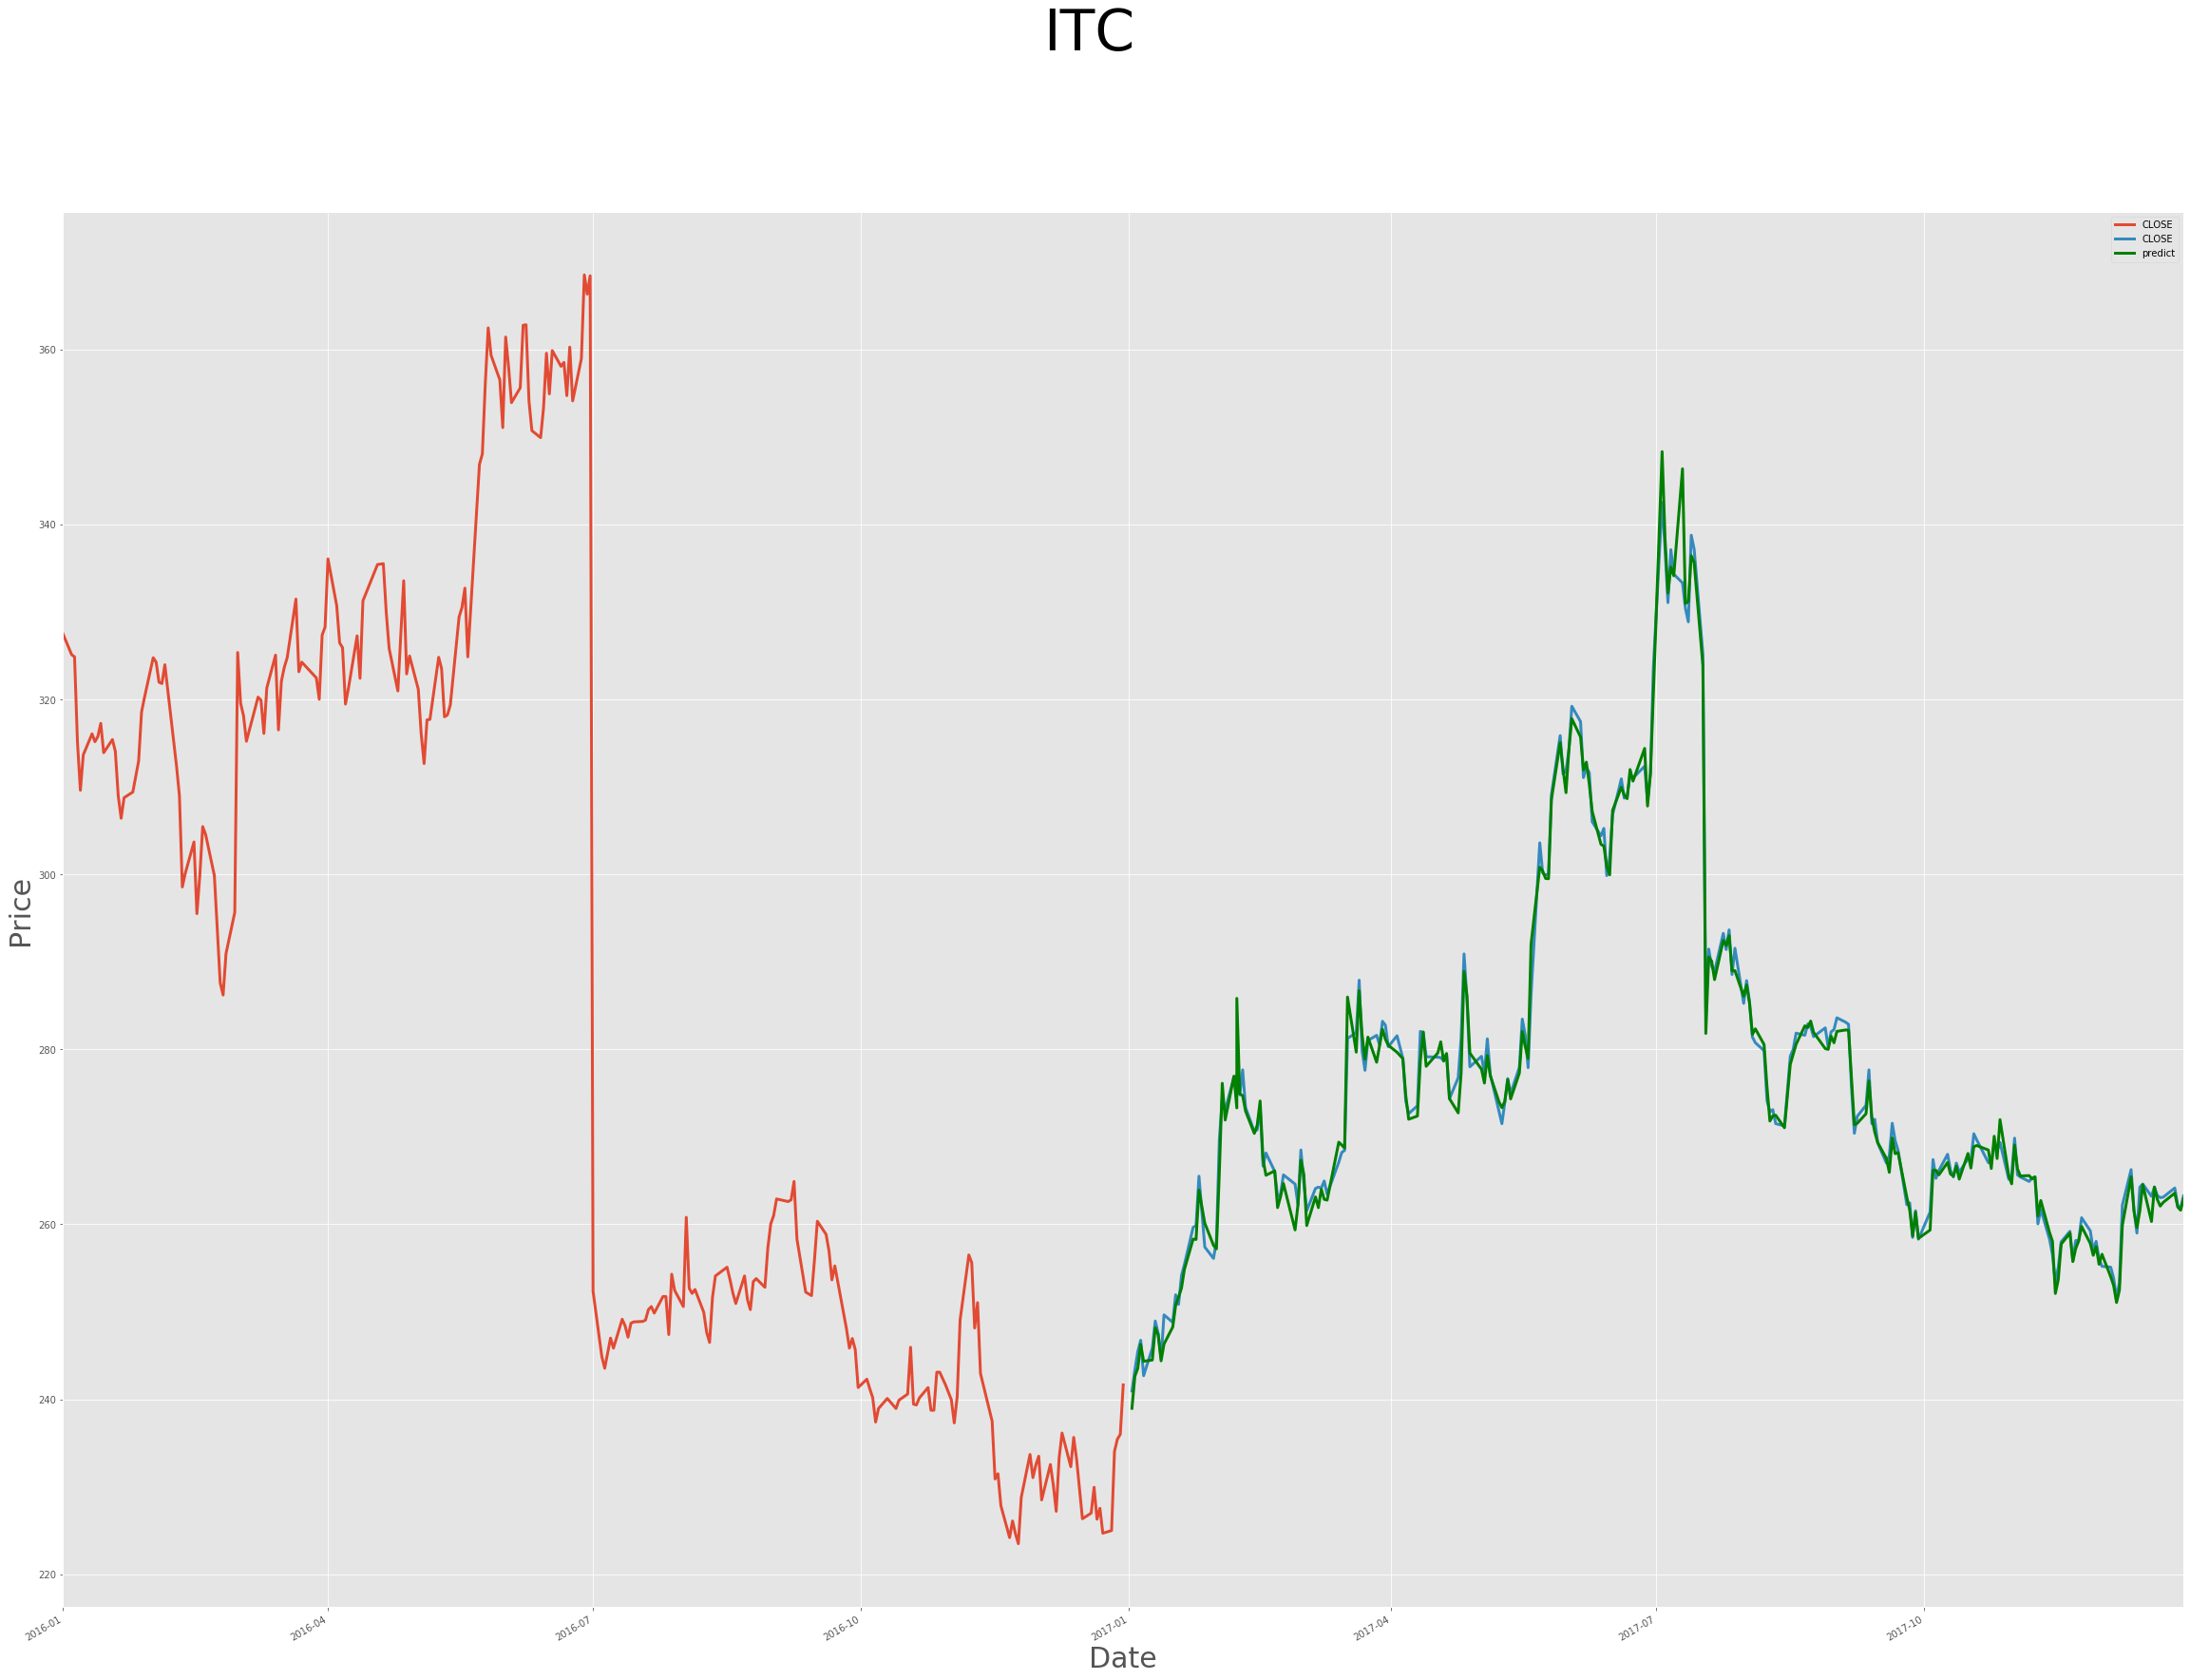

In [33]:
#Ploting
rcParams['figure.figsize'] = 40,30
fig = plt.figure()
fig.suptitle(user_input,fontsize=60)
train.index = train.Date
test.index = test.Date
train['CLOSE'].plot(linewidth=3.0)
test['CLOSE'].plot(linewidth=3.0)
test['predict'].plot(color="green",linewidth=3.0)
plt.legend(loc='best')
plt.xlabel('Date',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.show()